In [152]:
# Mai Xuan Bach
# Combine all dataset

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
import plotly.express as px

In [155]:
pd.set_option("display.max_colwidth", None)

In [156]:
pd.set_option('display.max_columns', None)  

In [157]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [158]:
application_train = pd.read_csv("./home-credit-default-risk/application_train.csv")
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [159]:
application_test = pd.read_csv("./home-credit-default-risk/application_test.csv")
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [160]:
bureau = pd.read_csv("./home-credit-default-risk/bureau.csv")
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [161]:
bureau_balance = pd.read_csv("./home-credit-default-risk/bureau_balance.csv")
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [162]:
credit_card_balance = pd.read_csv("./home-credit-default-risk/credit_card_balance.csv")
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [163]:
installments_payments = pd.read_csv("./home-credit-default-risk/installments_payments.csv")
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [164]:
POS_CASH_balance = pd.read_csv("./home-credit-default-risk/POS_CASH_balance.csv")
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [165]:
previous_application = pd.read_csv("./home-credit-default-risk/previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Drop columns in each dataframe

### Drop application train

In [166]:
to_drop_application = ['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'DAYS_EMPLOYED'] #Drop DAYS_EMPLOYED vì outlier

In [167]:
print(application_train.shape)
application_train.drop(columns = to_drop_application, inplace = True)
print(application_train.shape)
application_train.head(5)

(307511, 122)
(307511, 68)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461            -3648.0            -2120          NaN   
1      -16765            -1186.0             -291          NaN   
2      -19046            -4260.0            -2531         26.0   
3      -19005            -9833.0            -2437          NaN   
4      -19932            -4311.0            -3458          NaN   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           1           0        Laborers              1.0   
1                0           1           0      Core staff              2.0   
2                1           1           0        Laborers              1.0   
3                0           0           0        Laborers              2.0   
4                0           0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3         

### Drop application test

In [168]:
print(application_test.shape)
application_test.drop(columns = to_drop_application, inplace = True)
print(application_test.shape)
application_test.head(5)

(48744, 121)
(48744, 67)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY NAME_TYPE_SUITE  \
0             0          135000.0    568800.0      20560.5   Unaccompanied   
1             0           99000.0    222768.0      17370.0   Unaccompanied   
2             0          202500.0    663264.0      69777.0             NaN   
3             2          315000.0   1575000.0      49018.5   Unaccompanied   
4             1          180000.0    625500.0      32067.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          Working               Higher education            Married   
1          Working  Secondary / secondary special            Married   
2          Working               Higher education            Married   
3          Working  Secondary / secondary special            Married   
4          Working  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0  House / apartment                    0.018850      -19241   
1  House / apartment                    0.035792      -18064   
2  House / apartment                    0.019101      -20038   
3  House / apartment                    0.026392      -13976   
4  House / apartment                    0.010032      -13040   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  \
0            -5170.0             -812          NaN                0   
1            -9118.0            -1623          NaN                0   
2            -2175.0            -3503          5.0                0   
3            -2000.0            -4208          NaN                0   
4            -4000.0            -4262         16.0                1   

   FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0           0           1                 NaN              2.0   
1           0           0  Low-skill Laborers              2.0   
2           0           0             Drivers              2.0   
3           1           0         Sales staff              4.0   
4           0           0                 NaN              3.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0            Kindergarten   
1                       0                        0           Self-employed   
2                       0                        0       Transport: type 3   
3                       0                        0  

### Do not have to drop columns in bureau, bureau balance and installment_payments

### Drop credit_card_balance

In [169]:
to_drop_credit_card_balance = []

to_drop_credit_card_balance.append('AMT_PAYMENT_CURRENT')
to_drop_credit_card_balance.append('AMT_RECEIVABLE_PRINCIPAL')
to_drop_credit_card_balance.append('AMT_RECIVABLE')
to_drop_credit_card_balance.append('AMT_BALANCE')
to_drop_credit_card_balance.append('CNT_DRAWINGS_POS_CURRENT')
to_drop_credit_card_balance.append('CNT_DRAWINGS_OTHER_CURRENT')
to_drop_credit_card_balance.append('CNT_DRAWINGS_ATM_CURRENT')
to_drop_credit_card_balance.append('AMT_DRAWINGS_POS_CURRENT')
to_drop_credit_card_balance.append('AMT_DRAWINGS_OTHER_CURRENT')
to_drop_credit_card_balance.append('AMT_DRAWINGS_ATM_CURRENT')

to_drop_credit_card_balance

['AMT_PAYMENT_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_BALANCE',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_ATM_CURRENT']

In [170]:
print("old shape: ", credit_card_balance.shape)
credit_card_balance.drop(columns = to_drop_credit_card_balance, inplace = True)
print("new shape: ", credit_card_balance.shape)
credit_card_balance.head(5)

old shape:  (3840312, 23)
new shape:  (3840312, 13)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0     2562384      378907              -6                   135000   
1     2582071      363914              -1                    45000   
2     1740877      371185              -7                   450000   
3     1389973      337855              -4                   225000   
4     1891521      126868              -1                   450000   

   AMT_DRAWINGS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_TOTAL_CURRENT  \
0                 877.5                 1700.325                     1800.0   
1                2250.0                 2250.000                     2250.0   
2                   0.0                 2250.000                     2250.0   
3                2250.0                11795.760                    11925.0   
4               11547.0                22924.890                    27000.0   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_CURRENT  CNT_INSTALMENT_MATURE_CUM  \
0                 0.000                     1                       35.0   
1             64875.555                     1                       69.0   
2             31460.085                     0                       30.0   
3            233048.970                     1                       10.0   
4            453919.455                     1                      101.0   

  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0               Active       0           0  
1               Active       0           0  
2               Active       0           0  
3               Active       0           0  
4               Active       0           0

### Drop POS_CASH_balance

In [171]:
print("old shape: ", POS_CASH_balance.shape)
POS_CASH_balance.drop(['SK_DPD_DEF','SK_DPD'], inplace=True, axis = 1)
print("new shape: ", POS_CASH_balance.shape)
POS_CASH_balance.head(5)

old shape:  (10001358, 8)
new shape:  (10001358, 6)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  
0                   45.0               Active  
1                   35.0               Active  
2                    9.0               Active  
3                   42.0               Active  
4                   35.0               Active

### Drop previous_application

In [172]:
null_percent = (previous_application.isnull().sum()/previous_application.shape[0])*100

In [173]:
null_percent[null_percent > 90]

RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [174]:
previous_application.shape

(1670214, 37)

In [175]:
to_drop_previous_application = ["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED", 'DAYS_TERMINATION', 'AMT_GOODS_PRICE',
                                'AMT_APPLICATION','FLAG_LAST_APPL_PER_CONTRACT', 'CODE_REJECT_REASON', 'NAME_CASH_LOAN_PURPOSE',
                                'DAYS_FIRST_DRAWING',
                               'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 
                                'DAYS_LAST_DUE']  
#Drop 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' vì outlier  

In [176]:
print("old shape: ", previous_application.shape)
previous_application.drop(to_drop_previous_application, inplace=True, axis = 1)
print("new shape: ", previous_application.shape)
previous_application.head(5)

old shape:  (1670214, 37)
new shape:  (1670214, 25)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_CREDIT  \
0     2030495      271877     Consumer loans     1730.430     17145.0   
1     2802425      108129         Cash loans    25188.615    679671.0   
2     2523466      122040         Cash loans    15060.735    136444.5   
3     2819243      176158         Cash loans    47041.335    470790.0   
4     1784265      202054         Cash loans    31924.395    404055.0   

   AMT_DOWN_PAYMENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0               0.0                   SATURDAY                       15   
1               NaN                   THURSDAY                       11   
2               NaN                    TUESDAY                       11   
3               NaN                     MONDAY                        7   
4               NaN                   THURSDAY                        9   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CONTRACT_STATUS  \
0                       1                0.0             Approved   
1                       1                NaN             Approved   
2                       1                NaN             Approved   
3                       1                NaN             Approved   
4                       1                NaN              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0            -73  Cash through the bank              NaN         Repeater   
1           -164                    XNA    Unaccompanied         Repeater   
2           -301  Cash through the bank  Spouse, partner         Repeater   
3           -512  Cash through the bank              NaN         Repeater   
4           -781  Cash through the bank              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0           middle  POS mobile with interest   
1         36.0       low_action          Cash X-Sell: low   
2         12.0             high         Cash X-Sell: high   
3         12.0           middle       Cash X-Sell: middle   
4         24.0             high         Cash Street: high   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

# UNITE ALL DATASETS
This is kinda tricky as data has different format and is represented differently

Our head dataset will be called 'data' which is just a merge of train and test

Other pieces we will add after some processing

## data = train + test

this one is easy: both datasets have exactly the same format with only TARGET column being present in train set as the only difference

In [177]:
application_train.shape

(307511, 68)

In [178]:
application_test.shape

(48744, 67)

In [179]:
data = application_train.append(application_test)
data.shape

(356255, 68)

In [180]:
data.iloc[356200 : 356210, :]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
48689      455787     NaN         Cash loans           M            Y   
48690      455798     NaN         Cash loans           F            N   
48691      455802     NaN         Cash loans           M            Y   
48692      455803     NaN         Cash loans           F            N   
48693      455804     NaN         Cash loans           F            Y   
48694      455805     NaN         Cash loans           F            Y   
48695      455829     NaN         Cash loans           F            N   
48696      455840     NaN         Cash loans           M            Y   
48697      455849     NaN         Cash loans           F            N   
48698      455850     NaN         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
48689               N             0          202500.0    312840.0   
48690               Y             1          162000.0    135000.0   
48691               N             2          360000.0    540000.0   
48692               Y             1          157500.0    260640.0   
48693               Y             1          315000.0    312840.0   
48694               Y             0          337500.0    517500.0   
48695               Y             0          135000.0    450000.0   
48696               Y             0          135000.0    257391.0   
48697               N             0          225000.0    360000.0   
48698               Y             0          297000.0    225000.0   

       AMT_ANNUITY NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
48689      20124.0   Unaccompanied  Commercial associate   
48690       7452.0   Unaccompanied               Working   
48691      42664.5   Unaccompanied               Working   
48692      29605.5   Unaccompanied               Working   
48693      24844.5   Unaccompanied  Commercial associate   
48694      20907.0   Unaccompanied             Pensioner   
48695      25258.5   Unaccompanied             Pensioner   
48696      27157.5   Unaccompanied  Commercial associate   
48697      37800.0   Unaccompanied  Commercial associate   
48698      13896.0   Unaccompanied             Pensioner   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
48689  Secondary / secondary special               Married  House / apartment   
48690  Secondary / secondary special        Civil marriage  House / apartment   
48691  Secondary / secondary special               Married  House / apartment   
48692  Secondary / secondary special  Single / not married  House / apartment   
48693  Secondary / secondary special                 Widow  House / apartment   
48694  Secondary / secondary special               Married  House / apartment   
48695               Higher education               Married  House / apartment   
48696  Secondary / secondary special  Single / not married  House / apartment   
48697  Secondary / secondary special               Married  House / apartment   
48698  Secondary / secondary special                 Widow  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_REGISTRATION  \
48689                    0.010276      -14757            -8836.0   
48690                    0.022625      -19057              -54.0   
48691                    0.002506      -11344            -6102.0   
48692                    0.007305      -11887            -5121.0   
48693                    0.006629      -17312            -3598.0   
48694                    0.026392      -20633            -6767.0   
48695                    0.026392      -21833            -9301.0   
48696                    0.010276      -10376            -4270.0   
48697                    0.011657      -14664            -2856.0   
48698                    0.018209      -24168            -6959.0   

       DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
48689            -5069          8.0                0         

In [181]:
# now just in case, let's check if we've got it right
data.TARGET.isna().sum() # same as number of test rows

48744

In [182]:
sum(data.SK_ID_CURR[data.TARGET.isna()] == application_test.SK_ID_CURR) # all is good

48744

In [183]:
sum(data.SK_ID_CURR.isin(application_test.SK_ID_CURR)) == len(application_test) # nothing else to prove

True

## bureau balance -> bureau -> data

Before we merge data with bureau, we need to merge bureau dataframe with related information in bureau_balance file

What is the exact problem here:

1. bureau dataframe comes from the Credit Bureau authority and displays one row for each credit the client from train/test dataset has taken previously. It is matched by SK_ID_CURR with train/test and where in train/test the SK_ID_CURR do not duplicate (1 for 1 client whom we are trying to classify) in most cases bureau dataframe has multipe indicies of the same client as he/she had applied to multiple loans previously.

2. in turn bureau_balance even more extends the previous credit information on a greater scale. It contains a separate row for each month of history of every previous credit reported to Credit Bureau (bureau dataframe) and is related to bureau df via SK_ID_BUREAU.

So the approach we are going to use is to calculate mean of each statistical column out of these both dataframes to include these mean values as features of our clients whom we are trying to classify. For example: mean days overdue for all credits that the client had previously taken.

I have to say that this approach leaves out some information such as categorical columns in some cases. For example the client with SK_ID_CURR = 666 had 7 credits in bureau dataframe, and when we collapse all these credits (grouped by one ID) into one line to indicate mean values for these credits, we will not be able to show a CREDIT_ACTIVE column that has different categorical values as Closed or Active for different previous credits. So this leaves room for some interesting feature engineering here.

**Steps that we need to take:**

1. Collapse bureau_balance dataframe to mean values grouped by SK_ID_BUREAU
2. Merge this with bureau dataframe
3. Collapse bureau dataframe to mean values grouped by SK_ID_CURR
4. Merge what we've got with our data df 

Even though we've decided not to perform any feature engineering, one useful feature here is just asking for it. Let's calculate the total number of previous credits taken by each client and include this in our statistics. I believe that kind of information would be quite useful. So let's quickly do that before executing our program defined above

In [184]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

SK_ID_CURR  PREVIOUS_LOANS_COUNT
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

### Thêm 1 cột đếm PREVIOUS_LOANS_COUNT của từng khách hàng (SK_ID_CURR) bằng việc lấy thông tin từ việc groupby từ bảng bureau

In [185]:
data = data.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

In [186]:
data.head(25)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002     1.0         Cash loans           M            N   
1       100003     0.0         Cash loans           F            N   
2       100004     0.0    Revolving loans           M            Y   
3       100006     0.0         Cash loans           F            N   
4       100007     0.0         Cash loans           M            N   
5       100008     0.0         Cash loans           M            N   
6       100009     0.0         Cash loans           F            Y   
7       100010     0.0         Cash loans           M            Y   
8       100011     0.0         Cash loans           F            N   
9       100012     0.0    Revolving loans           M            N   
10      100014     0.0         Cash loans           F            N   
11      100015     0.0         Cash loans           F            N   
12      100016     0.0         Cash loans           F            N   
13      100017     0.0         Cash loans           M            Y   
14      100018     0.0         Cash loans           F            N   
15      100019     0.0         Cash loans           M            Y   
16      100020     0.0         Cash loans           M            N   
17      100021     0.0    Revolving loans           F            N   
18      100022     0.0    Revolving loans           F            N   
19      100023     0.0         Cash loans           F            N   
20      100024     0.0    Revolving loans           M            Y   
21      100025     0.0         Cash loans           F            Y   
22      100026     0.0         Cash loans           F            N   
23      100027     0.0         Cash loans           F            N   
24      100029     0.0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   
20               Y             0        135000.000    427500.0      21375.0   
21               Y             1        202500.000   1132573.5      37561.5   
22               N             1        450000.000    497520.0      32521.5   
23               Y             0         83250.000    239850.0      23850.0   
24               N             2        135000.000    247500.0      12703.5   

    NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied               Working  Secondary

Now back to merging with all the bureau and bureau_balance information

### STEP 1 - collapse bureau_balance

In [187]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [188]:
# first define the formula for grouping rows by ID and calculating mean values
def extract_mean(x):
    y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_') 
    return y

In [189]:
# apply formula to create bureau_balance dataframe grouped by SK_ID_BUREAU with mean values of all numerical columns
bureau_bal_mean = extract_mean(bureau_balance)
bureau_bal_mean.head()

BUR_BAL_MEAN_SK_ID_BUREAU  BUR_BAL_MEAN_MONTHS_BALANCE
0                    5001709                        -48.0
1                    5001710                        -41.0
2                    5001711                         -1.5
3                    5001712                         -9.0
4                    5001713                        -10.5

As you can see, this dataframe does not include the bureau_balance **categorical column STATUS.**

Also note that our formula has changed the name of the SK_ID_BUREAU, we need to **change it back in order to use it when merging with bureau df.**

One might argue that we didn't need to add this **.add_prefix(...)** to our formula above, but when working with larger datasets below it will prove itself useful

In [190]:
bureau_bal_mean = bureau_bal_mean.rename(columns = {'BUR_BAL_MEAN_SK_ID_BUREAU' : 'SK_ID_BUREAU'})

In [191]:
bureau_bal_mean.head()

SK_ID_BUREAU  BUR_BAL_MEAN_MONTHS_BALANCE
0       5001709                        -48.0
1       5001710                        -41.0
2       5001711                         -1.5
3       5001712                         -9.0
4       5001713                        -10.5

### STEP 2 - merge with bureau

In [192]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [193]:
bureau_bal_mean.head()

SK_ID_BUREAU  BUR_BAL_MEAN_MONTHS_BALANCE
0       5001709                        -48.0
1       5001710                        -41.0
2       5001711                         -1.5
3       5001712                         -9.0
4       5001713                        -10.5

In [194]:
bureau = bureau.merge(bureau_bal_mean, on = 'SK_ID_BUREAU', how = 'left')
bureau.drop('SK_ID_BUREAU', axis = 1, inplace = True) # we don't need this internal ID anymore

In [195]:
# kiểm tra xem có đúng là bureau đã được merge với bureau_bal_mean chưa? 
bureau.head()

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354        Closed      currency 1         -497                   0   
1      215354        Active      currency 1         -208                   0   
2      215354        Active      currency 1         -203                   0   
3      215354        Active      currency 1         -203                   0   
4      215354        Active      currency 1         -629                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0               -153.0             -153.0                     NaN   
1               1075.0                NaN                     NaN   
2                528.0                NaN                     NaN   
3                  NaN                NaN                     NaN   
4               1197.0                NaN                 77674.5   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  NaN   
3                   0         90000.0                  NaN   
4                   0       2700000.0                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   NaN                     0.0  Consumer credit   
1                   NaN                     0.0      Credit card   
2                   NaN                     0.0  Consumer credit   
3                   NaN                     0.0      Credit card   
4                   NaN                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  BUR_BAL_MEAN_MONTHS_BALANCE  
0                -131          NaN                          NaN  
1                 -20          NaN                          NaN  
2                 -16          NaN                          NaN  
3                 -16          NaN                          NaN  
4                 -21          NaN                          NaN

In [196]:
# kiểm tra xem có đúng là bureau đã được merge với bureau_bal_mean chưa? 
bureau[bureau["BUR_BAL_MEAN_MONTHS_BALANCE"] == -9.0]

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
818          298038        Closed      currency 1         -573   
1012         220033        Active      currency 1         -565   
2367         423638        Closed      currency 1         -558   
3383         397119        Active      currency 1         -551   
3400         212690        Closed      currency 1         -567   
...             ...           ...             ...          ...   
1713868      159648        Closed      currency 1         -575   
1714082      107665        Closed      currency 1         -557   
1715429      210779        Active      currency 1         -549   
1715640      260613        Active      currency 1         -503   
1716276      129052        Closed      currency 1         -568   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
818                       0                -24.0             -406.0   
1012                      0               1261.0                NaN   
2367                      0               -224.0             -314.0   
3383                      0                849.0                NaN   
3400                      0               -263.0             -263.0   
...                     ...                  ...                ...   
1713868                   0                  NaN             -296.0   
1714082                   0               1270.0             -484.0   
1715429                   0                866.0                NaN   
1715640                   0               1323.0                NaN   
1716276                   0               -428.0             -428.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
818                         NaN                   0       540000.00   
1012                    17977.5                   0       671850.00   
2367                        NaN                   0        52296.75   
3383                        NaN                   0       769680.00   
3400                        NaN                   0        73390.50   
...                         ...                 ...             ...   
1713868                     0.0                   0            0.00   
1714082                     NaN                   0      1890000.00   
1715429                     NaN                   0       157500.00   
1715640                     NaN                   0       693000.00   
1716276                     0.0                   0       100467.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
818                      0.0                   0.0                     0.0   
1012                     NaN                   NaN                     0.0   
2367                     0.0                   NaN                     0.0   
3383                349047.0                   0.0                     0.0   
3400                     0.0                   0.0                     0.0   
...                      ...                   ...                     ...   
1713868                  0.0                   0.0                     0.0   
1714082                  0.0                   0.0                     0.0   
1715429             110056.5                   0.0                     0.0   
1715640             211248.0                   0.0                     0.0   
1716276                  0.0                   0.0                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  \
818      Consumer credit                -404          NaN   
1012     Consumer credit                 -21    23790.015   
2367     Consumer credit                -310    16443.000   
3383     Consumer credit                 -33    14674.500   
3400     Consumer credit                -262        0.000   
...                  ...                 ...          ...   
1713868      Credit card                -289          NaN   
1714082  Consumer credit                -478        0.000   
1715429      Credit card

In [197]:
bureau.shape

(1716428, 17)

In [198]:
bureau["SK_ID_CURR"].nunique()

305811

In [199]:
# Chứng tỏ là SK_ID_CURR đang chưa unique, nên giờ sẽ groupby để về giá trị unique

### STEP 3 - collapse bureau

In [200]:
def extract_mean(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_') # note that we have changed the ID to group by and the prefix to add
    return y

In [201]:
bureau_mean_values = extract_mean(bureau)
bureau_mean_values = bureau_mean_values.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean_values.head(10)

SK_ID_CURR  PREV_BUR_MEAN_DAYS_CREDIT  PREV_BUR_MEAN_CREDIT_DAY_OVERDUE  \
0      100001                -735.000000                               0.0   
1      100002                -874.000000                               0.0   
2      100003               -1400.750000                               0.0   
3      100004                -867.000000                               0.0   
4      100005                -190.666667                               0.0   
5      100007               -1149.000000                               0.0   
6      100008                -757.333333                               0.0   
7      100009               -1271.500000                               0.0   
8      100010               -1939.500000                               0.0   
9      100011               -1773.000000                               0.0   

   PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE  PREV_BUR_MEAN_DAYS_ENDDATE_FACT  \
0                          82.428571                      -825.500000   
1                        -349.000000                      -697.500000   
2                        -544.500000                     -1097.333333   
3                        -488.500000                      -532.500000   
4                         439.333333                      -123.000000   
5                        -783.000000                      -783.000000   
6                        -391.333333                      -909.000000   
7                        -794.937500                     -1108.500000   
8                        -119.500000                     -1138.000000   
9                       -1293.250000                     -1463.250000   

   PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE  PREV_BUR_MEAN_CNT_CREDIT_PROLONG  \
0                                   NaN                               0.0   
1                              1681.029                               0.0   
2                                 0.000                               0.0   
3                                 0.000                               0.0   
4                                 0.000                               0.0   
5                                 0.000                               0.0   
6                                 0.000                               0.0   
7                                 0.000                               0.0   
8                                   NaN                               0.0   
9                              5073.615                               0.0   

   PREV_BUR_MEAN_AMT_CREDIT_SUM  PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT  \
0                 207623.571429                       85240.928571   
1                 108131.945625                       49156.200000   
2                 254350.125000                           0.000000   
3                  94518.900000                           0.000000   
4                 219042.000000                      189469.500000   
5                 146250.000000                           0.000000   
6                 156148.500000                       80019.000000   
7                 266711.750000                       76953.535714   
8                 495000.000000                      174003.750000   
9                 108807.075000                           0.000000   

   PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT  PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE  \
0                             0.00000                                   0.0   
1                          7997.14125                                   0.0   
2                        202500.00000                                   0.0   
3                             0.00000                                   0.0   
4                             0.00000                                   0.0   
5                             0.00000                                   0.0   
6                             0.00000                                   0.0   
7                             0.00000                                   0.0   
8         

In [202]:
bureau_mean_values.shape

(305811, 14)

In [203]:
bureau_mean_values["SK_ID_CURR"].nunique()

305811

Looks good. There are a few missing values although which we will deal with later

### STEP 4 - merge bureau with data

In [204]:
data.shape

(356255, 69)

In [205]:
data = data.merge(bureau_mean_values, on = 'SK_ID_CURR', how = 'left')

In [206]:
data.shape

(356255, 82)

So here we've created 13 new features and added them to our train/test dataset called 'data'

In [207]:
data.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002     1.0         Cash loans           M            N   
1       100003     0.0         Cash loans           F            N   
2       100004     0.0    Revolving loans           M            Y   
3       100006     0.0         Cash loans           F            N   
4       100007     0.0         Cash loans           M            N   
5       100008     0.0         Cash loans           M            N   
6       100009     0.0         Cash loans           F            Y   
7       100010     0.0         Cash loans           M            Y   
8       100011     0.0         Cash loans           F            N   
9       100012     0.0    Revolving loans           M            N   
10      100014     0.0         Cash loans           F            N   
11      100015     0.0         Cash loans           F            N   
12      100016     0.0         Cash loans           F            N   
13      100017     0.0         Cash loans           M            Y   
14      100018     0.0         Cash loans           F            N   
15      100019     0.0         Cash loans           M            Y   
16      100020     0.0         Cash loans           M            N   
17      100021     0.0    Revolving loans           F            N   
18      100022     0.0    Revolving loans           F            N   
19      100023     0.0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied               Working  Secondary / secondary special   
1            Family         State servant               Higher education   
2     Unaccompanied               Working  Secondary / secondary special   
3     Unaccompanied               Working  Secondary / secondary special   
4     Unaccompanied               Working  Secondary / secondary special   
5   Spouse, partner         State servant  Secondary / secondary special   
6     Unaccompanied  Commercial associate               Higher education   
7     Unaccompanied         State servant               Higher education   
8          Children             Pensioner  Secondary / secondary special   
9     Unaccompanied               Working  Secondary / secondary special   
10    Unaccompanied               Wor

## instalments_payments, credit_card_balance, POS_CASH_balance => previous_application

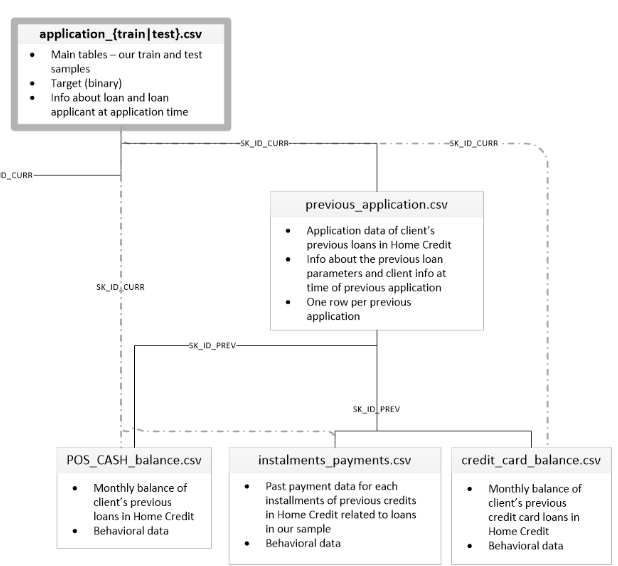

Quick information on this block of data: surprisingly... previous_application reflects clients' previous applications for loans to Home Credit. As before, previous_application unfolds in a load of statistics with three other dataframes:

- POS_CASH_balance - monthly balance snapshots of previous Point Of Sale s and cash loans that the applicant had with Home Credit (one row for each month of history)
- installments_payments - repayment history for previous credits with Home Credit (one row for each payment)
- credit_card_balance - monthly balance snapshots of applicant's credit cards (one row for each month of history)
These 4 datasets have their own key to for internal mapping - SK_ID_PREV

**So the plan here would be the following:**

1. Collapse credit_card_balance dataframe to mean values grouped by SK_ID_PREV
2. Merge with previous_application (our 'leading' dataset in this case)


3. Collapse POS_CASH_balance to mean values grouped by SK_ID_PREV
4. Merge with previous_application


5. Collapse installments_payments ...
6. Merge with previous_application


7. Collapse the resulting previous_application dataset to mean values grouped by SK_ID_CURR
8. Merge our unfolded previous_application statistics with our data


But before we start, let's check if there are any records in previous_application that are not in our data?

In [208]:
len(previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(previous_application)

True

looks good

One more thing! We will **delete the SK_ID_CURR from the credit_card_balance / POS_CASH_balance / installment_payments as we do not need this column to be shown as mean**, this information has no impact on statistics and will just clutter the space as noise. We will group them with our 'leading' dataset previous_application using SK_ID_PREV and our 'leading' dataset has this SK_ID_CURR key to be further mapped with our data.

In [209]:
credit_card_balance.drop('SK_ID_CURR', axis = 1, inplace = True)
installments_payments.drop('SK_ID_CURR', axis = 1, inplace = True)
POS_CASH_balance.drop('SK_ID_CURR', axis = 1, inplace = True)

As previously, before tearing apart the previous_applications to Home Credit statistics, let's extract the **number of previous applications of the clients** to Home Credit and add this feature to our data

In [210]:
previous_application_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

SK_ID_CURR  PREVIOUS_APPLICATION_COUNT
0      100001                           1
1      100002                           1
2      100003                           3
3      100004                           1
4      100005                           2

In [211]:
# and throw that column in our data
data = data.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')
data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461            -3648.0            -2120          NaN   
1      -16765            -1186.0             -291          NaN   
2      -19046            -4260.0            -2531         26.0   
3      -19005            -9833.0            -2437          NaN   
4      -19932            -4311.0            -3458          NaN   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           1           0        Laborers              1.0   
1                0           1           0      Core staff              2.0   
2                1           1           0        Laborers              1.0   
3                0           0           0        Laborers              2.0   
4                0           0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3         

Now back to our process


## credit_card_balance -> previous_application

### STEP 1 - collapse credit_card_balance

In [212]:
def extract_mean(x):
    y = x.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
    return y

credit_card_balance_mean = extract_mean(credit_card_balance)
credit_card_balance_mean = credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'})
credit_card_balance_mean.head(10)

SK_ID_PREV  CARD_MEAN_MONTHS_BALANCE  CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL  \
0     1000018                      -4.0                       81000.000000   
1     1000030                      -4.5                       81562.500000   
2     1000031                      -8.5                      149625.000000   
3     1000035                      -4.0                      225000.000000   
4     1000077                      -7.0                       94090.909091   
5     1000083                      -7.0                      183461.538462   
6     1000087                     -16.5                       71718.750000   
7     1000089                      -3.0                      135000.000000   
8     1000094                     -45.5                       51392.045455   
9     1000096                     -48.5                      180000.000000   

   CARD_MEAN_AMT_DRAWINGS_CURRENT  CARD_MEAN_AMT_INST_MIN_REGULARITY  \
0                    29478.996000                        2594.088000   
1                    17257.438125                        2078.223750   
2                    28959.615000                        2675.300625   
3                        0.000000                           0.000000   
4                        0.000000                           0.000000   
5                        0.000000                           0.000000   
6                     4278.474844                        2242.807500   
7                        0.000000                           0.000000   
8                     1575.011761                        1993.890176   
9                     4334.961094                        2743.612031   

   CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT  CARD_MEAN_AMT_TOTAL_RECEIVABLE  \
0                          5541.750000                    73602.585000   
1                          2657.947500                    55935.376875   
2                         22157.443125                    52099.970625   
3                             0.000000                        0.000000   
4                             0.000000                        0.000000   
5                             0.000000                        0.000000   
6                          6165.232031                    39085.408125   
7                             0.000000                        0.000000   
8                          2915.807216                    29386.505455   
9                          7619.022656                    38567.323594   

   CARD_MEAN_CNT_DRAWINGS_CURRENT  CARD_MEAN_CNT_INSTALMENT_MATURE_CUM  \
0                        8.800000                             2.000000   
1                        5.125000                             1.875000   
2                        1.312500                             3.687500   
3                        0.000000                             0.000000   
4                        0.000000                             0.000000   
5                        0.000000                             0.000000   
6                        0.406250                             9.166667   
7                        0.000000                             0.000000   
8                        0.090909                            33.670588   
9                        0.260417                            34.562500   

   CARD_MEAN_SK_DPD  CARD_MEAN_SK_DPD_DEF  
0          0.000000              0.000000  
1          0.000000              0.000000  
2          0.000000              0.000000  
3          0.000000              0.000000  
4          0.000000              0.000000  
5          0.000000              0.000000  
6          0.000000              0.000000  
7          0.000000              0.000000  
8          0.011364              0.011364  
9          0.354167              0.000000

### STEP 2 - merge with previous_application

In [213]:
previous_application = previous_application.merge(credit_card_balance_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_CREDIT  \
0     2030495      271877     Consumer loans     1730.430     17145.0   
1     2802425      108129         Cash loans    25188.615    679671.0   
2     2523466      122040         Cash loans    15060.735    136444.5   
3     2819243      176158         Cash loans    47041.335    470790.0   
4     1784265      202054         Cash loans    31924.395    404055.0   

   AMT_DOWN_PAYMENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0               0.0                   SATURDAY                       15   
1               NaN                   THURSDAY                       11   
2               NaN                    TUESDAY                       11   
3               NaN                     MONDAY                        7   
4               NaN                   THURSDAY                        9   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CONTRACT_STATUS  \
0                       1                0.0             Approved   
1                       1                NaN             Approved   
2                       1                NaN             Approved   
3                       1                NaN             Approved   
4                       1                NaN              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0            -73  Cash through the bank              NaN         Repeater   
1           -164                    XNA    Unaccompanied         Repeater   
2           -301  Cash through the bank  Spouse, partner         Repeater   
3           -512  Cash through the bank              NaN         Repeater   
4           -781  Cash through the bank              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0           middle  POS mobile with interest   
1         36.0       low_action          Cash X-Sell: low   
2         12.0             high         Cash X-Sell: high   
3         12.0           middle       Cash X-Sell: middle   
4         24.0             high         Cash Street: high   

   NFLAG_INSURED_ON_APPROVAL  CARD_MEAN_MONTHS_BALANCE  \
0                        0.0                       NaN   
1                        1.0                       NaN   
2                        1.0                       NaN   
3                        1.0                       NaN   
4                        NaN                       NaN   

   CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL  CARD_MEAN_AMT_DRAWINGS_CURRENT  \
0                                NaN                             NaN   
1                                NaN                             NaN   
2                                NaN                             NaN   
3                                NaN                             NaN   
4                                NaN                             NaN   

   CARD_MEAN_AMT_INST_MIN_REGULARITY  CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3             

In [214]:
previous_application[previous_application["SK_ID_PREV"] == 1000018]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_CREDIT  \
1519242     1000018      394447    Revolving loans       2250.0     45000.0   

         AMT_DOWN_PAYMENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1519242               NaN                     SUNDAY                       10   

         NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CONTRACT_STATUS  \
1519242                       1                NaN             Approved   

         DAYS_DECISION NAME_PAYMENT_TYPE NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
1519242           -176               XNA   Unaccompanied              New   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  CHANNEL_TYPE  \
1519242                 XNA          Cards           walk-in  Country-wide   

         SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1519242               595  Consumer electronics          0.0              XNA   

        PRODUCT_COMBINATION  NFLAG_INSURED_ON_APPROVAL  \
1519242         Card Street                        0.0   

         CARD_MEAN_MONTHS_BALANCE  CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL  \
1519242                      -4.0                            81000.0   

         CARD_MEAN_AMT_DRAWINGS_CURRENT  CARD_MEAN_AMT_INST_MIN_REGULARITY  \
1519242                       29478.996                           2594.088   

         CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT  CARD_MEAN_AMT_TOTAL_RECEIVABLE  \
1519242                              5541.75                       73602.585   

         CARD_MEAN_CNT_DRAWINGS_CURRENT  CARD_MEAN_CNT_INSTALMENT_MATURE_CUM  \
1519242                             8.8                                  2.0   

         CARD_MEAN_SK_DPD  CARD_MEAN_SK_DPD_DEF  
1519242               0.0                   0.0

## installments_payments -> previous_application

### STEP 3 - collapse installments_payments

In [215]:
def extract_mean(x):
    y = x.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
    return y

install_pay_mean = extract_mean(installments_payments)

install_pay_mean = install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'})

In [216]:
install_pay_mean.head()

SK_ID_PREV  INSTALL_MEAN_NUM_INSTALMENT_VERSION  \
0     1000001                             1.500000   
1     1000002                             1.250000   
2     1000003                             1.000000   
3     1000004                             1.142857   
4     1000005                             1.000000   

   INSTALL_MEAN_NUM_INSTALMENT_NUMBER  INSTALL_MEAN_DAYS_INSTALMENT  \
0                            1.500000                   -253.000000   
1                            2.500000                  -1555.000000   
2                            2.000000                    -64.000000   
3                            4.000000                   -772.000000   
4                            5.818182                  -1543.454545   

   INSTALL_MEAN_DAYS_ENTRY_PAYMENT  INSTALL_MEAN_AMT_INSTALMENT  \
0                      -269.000000                 34221.712500   
1                     -1574.750000                  9308.891250   
2                       -79.333333                  4951.350000   
3                      -798.714286                  4789.022143   
4                     -1551.909091                 14703.210000   

   INSTALL_MEAN_AMT_PAYMENT  
0              34221.712500  
1               9308.891250  
2               4951.350000  
3               4789.022143  
4              13365.609545

### STEP 4 - merge with previous application

In [217]:
previous_application = previous_application.merge(install_pay_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_CREDIT  \
0     2030495      271877     Consumer loans     1730.430     17145.0   
1     2802425      108129         Cash loans    25188.615    679671.0   
2     2523466      122040         Cash loans    15060.735    136444.5   
3     2819243      176158         Cash loans    47041.335    470790.0   
4     1784265      202054         Cash loans    31924.395    404055.0   
5     1383531      199383         Cash loans    23703.930    340573.5   
6     2315218      175704         Cash loans          NaN         0.0   
7     1656711      296299         Cash loans          NaN         0.0   
8     2367563      342292         Cash loans          NaN         0.0   
9     2579447      334349         Cash loans          NaN         0.0   

   AMT_DOWN_PAYMENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0               0.0                   SATURDAY                       15   
1               NaN                   THURSDAY                       11   
2               NaN                    TUESDAY                       11   
3               NaN                     MONDAY                        7   
4               NaN                   THURSDAY                        9   
5               NaN                   SATURDAY                        8   
6               NaN                    TUESDAY                       11   
7               NaN                     MONDAY                        7   
8               NaN                     MONDAY                       15   
9               NaN                   SATURDAY                       15   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CONTRACT_STATUS  \
0                       1                0.0             Approved   
1                       1                NaN             Approved   
2                       1                NaN             Approved   
3                       1                NaN             Approved   
4                       1                NaN              Refused   
5                       1                NaN             Approved   
6                       1                NaN             Canceled   
7                       1                NaN             Canceled   
8                       1                NaN             Canceled   
9                       1                NaN             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0            -73  Cash through the bank              NaN         Repeater   
1           -164                    XNA    Unaccompanied         Repeater   
2           -301  Cash through the bank  Spouse, partner         Repeater   
3           -512  Cash through the bank              NaN         Repeater   
4           -781  Cash through the bank              NaN         Repeater   
5           -684  Cash through the bank           Family         Repeater   
6            -14                    XNA              NaN         Repeater   
7            -21                    XNA              NaN         Repeater   
8           -386                    XNA              NaN         Repeater   
9            -57                    XNA              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   
5                 XNA           Cash            x-sell   
6                 XNA            XNA               XNA   
7                 XNA            XNA               XNA   
8                 XNA            XNA               XNA   
9                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Conn

## POS_CASH_balance -> previous_application

### STEP 5 - collapse POS_CASH_balance

In [218]:
def extract_mean(x):
    y = x.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
    return y

POS_mean = extract_mean(POS_CASH_balance)

POS_mean = POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'})
POS_mean.head()

SK_ID_PREV  POS_MEAN_MONTHS_BALANCE  POS_MEAN_CNT_INSTALMENT  \
0     1000001                     -9.0                 8.666667   
1     1000002                    -52.0                 5.200000   
2     1000003                     -2.5                12.000000   
3     1000004                    -25.5                 9.625000   
4     1000005                    -51.0                10.000000   

   POS_MEAN_CNT_INSTALMENT_FUTURE  
0                        7.666667  
1                        2.000000  
2                       10.500000  
3                        6.125000  
4                        5.000000

### STEP 6 - merge with previous_application

In [219]:
previous_application = previous_application.merge(POS_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_CREDIT  \
0     2030495      271877     Consumer loans     1730.430     17145.0   
1     2802425      108129         Cash loans    25188.615    679671.0   
2     2523466      122040         Cash loans    15060.735    136444.5   
3     2819243      176158         Cash loans    47041.335    470790.0   
4     1784265      202054         Cash loans    31924.395    404055.0   

   AMT_DOWN_PAYMENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0               0.0                   SATURDAY                       15   
1               NaN                   THURSDAY                       11   
2               NaN                    TUESDAY                       11   
3               NaN                     MONDAY                        7   
4               NaN                   THURSDAY                        9   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CONTRACT_STATUS  \
0                       1                0.0             Approved   
1                       1                NaN             Approved   
2                       1                NaN             Approved   
3                       1                NaN             Approved   
4                       1                NaN              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0            -73  Cash through the bank              NaN         Repeater   
1           -164                    XNA    Unaccompanied         Repeater   
2           -301  Cash through the bank  Spouse, partner         Repeater   
3           -512  Cash through the bank              NaN         Repeater   
4           -781  Cash through the bank              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0           middle  POS mobile with interest   
1         36.0       low_action          Cash X-Sell: low   
2         12.0             high         Cash X-Sell: high   
3         12.0           middle       Cash X-Sell: middle   
4         24.0             high         Cash Street: high   

   NFLAG_INSURED_ON_APPROVAL  CARD_MEAN_MONTHS_BALANCE  \
0                        0.0                       NaN   
1                        1.0                       NaN   
2                        1.0                       NaN   
3                        1.0                       NaN   
4                        NaN                       NaN   

   CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL  CARD_MEAN_AMT_DRAWINGS_CURRENT  \
0                                NaN                             NaN   
1                                NaN                             NaN   
2                                NaN                             NaN   
3                                NaN                             NaN   
4                                NaN                             NaN   

   CARD_MEAN_AMT_INST_MIN_REGULARITY  CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3             

## previous_application -> data

### STEP 7 - collapse the resulting previous_application dataset to show mean values grouped by SK_ID_CURR

In [220]:
def extract_mean(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
    return y

prev_appl_mean = extract_mean(previous_application)
prev_appl_mean = prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
prev_appl_mean.head()

SK_ID_CURR  PREV_APPL_MEAN_SK_ID_PREV  PREV_APPL_MEAN_AMT_ANNUITY  \
0      100001               1.369693e+06                    3951.000   
1      100002               1.038818e+06                    9251.775   
2      100003               2.281150e+06                   56553.990   
3      100004               1.564014e+06                    5357.250   
4      100005               2.176837e+06                    4813.200   

   PREV_APPL_MEAN_AMT_CREDIT  PREV_APPL_MEAN_AMT_DOWN_PAYMENT  \
0                   23787.00                           2520.0   
1                  179055.00                              0.0   
2                  484191.00                           3442.5   
3                   20106.00                           4860.0   
4                   20076.75                           4464.0   

   PREV_APPL_MEAN_HOUR_APPR_PROCESS_START  \
0                               13.000000   
1                                9.000000   
2                               14.666667   
3                                5.000000   
4                               10.500000   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT  \
0                                    1.0                          0.104326   
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_DAYS_DECISION  PREV_APPL_MEAN_SELLERPLACE_AREA  \
0                       -1740.0                             23.0   
1                        -606.0                            500.0   
2                       -1305.0                            533.0   
3                        -815.0                             30.0   
4                        -536.0                             18.0   

   PREV_APPL_MEAN_CNT_PAYMENT  PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL  \
0                         8.0                                  0.000000   
1                        24.0                                  0.000000   
2                        10.0                                  0.666667   
3                         4.0                                  0.000000   
4                        12.0                                  0.000000   

   PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                         

In [221]:
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis = 1) # we don't need this intermediate column any more
prev_appl_mean.head()

SK_ID_CURR  PREV_APPL_MEAN_AMT_ANNUITY  PREV_APPL_MEAN_AMT_CREDIT  \
0      100001                    3951.000                   23787.00   
1      100002                    9251.775                  179055.00   
2      100003                   56553.990                  484191.00   
3      100004                    5357.250                   20106.00   
4      100005                    4813.200                   20076.75   

   PREV_APPL_MEAN_AMT_DOWN_PAYMENT  PREV_APPL_MEAN_HOUR_APPR_PROCESS_START  \
0                           2520.0                               13.000000   
1                              0.0                                9.000000   
2                           3442.5                               14.666667   
3                           4860.0                                5.000000   
4                           4464.0                               10.500000   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT  \
0                                    1.0                          0.104326   
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_DAYS_DECISION  PREV_APPL_MEAN_SELLERPLACE_AREA  \
0                       -1740.0                             23.0   
1                        -606.0                            500.0   
2                       -1305.0                            533.0   
3                        -815.0                             30.0   
4                        -536.0                             18.0   

   PREV_APPL_MEAN_CNT_PAYMENT  PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL  \
0                         8.0                                  0.000000   
1                        24.0                                  0.000000   
2                        10.0                                  0.666667   
3                         4.0                                  0.000000   
4                        12.0                                  0.000000   

   PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

   PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE  \
0                                            NaN   
1                                            NaN   
2                    

### STEP 8 - merge what we've got with our data

In [222]:
print('data shape', data.shape)
print('previous applications statistics shape', prev_appl_mean.shape)

data shape (356255, 83)
previous applications statistics shape (338857, 30)


In [223]:
data = data.merge(prev_appl_mean, on = 'SK_ID_CURR', how = 'left')

In [224]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461            -3648.0            -2120          NaN   
1      -16765            -1186.0             -291          NaN   
2      -19046            -4260.0            -2531         26.0   
3      -19005            -9833.0            -2437          NaN   
4      -19932            -4311.0            -3458          NaN   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           1           0        Laborers              1.0   
1                0           1           0      Core staff              2.0   
2                1           1           0        Laborers              1.0   
3                0           0           0        Laborers              2.0   
4                0           0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3         

In [225]:
print('data shape', data.shape)

data shape (356255, 112)


As we can see, this last sprint over previous applications added 32 new features to our statistics and completed the unification of all data

## Summary so far:
Việc combine toàn bộ dataset được thực hiện như sau:

Trước tiên là ghép application_train và application_test lại ta được dataframe tổng tên là: data

Tiếp theo, việc combine dataset được chia thành 2 nhánh: Nhánh trái và Nhánh phải

Dù ở nhánh nào thì ý tưởng chung đều được tóm gọn trong câu sau: **'Muốn cắm bảng B vào bảng A bằng key K (được gợi ý sẵn trên graph) thì phải tạo ra key K tồn tại unique ở bảng B.'**

**Nhánh trái**: 
- Groupby bảng bureau_balance theo SK_ID_BUREAU, lấy mean,  sau đó combine kết quả groupby đó vào bureau
- Groupby bảng bureau theo SK_ID_CURR, lấy mean, sau đó combine kết quả groupby đó vào data

**Nhánh phải**:
- Groupby bảng credit_card_balance theo SK_ID_PREV, lấy mean, sau đó combine kết quả groupby đó vào previous_application
- Groupby bảng instalments_payments theo SK_ID_PREV, lấy mean, sau đó combine kết quả groupby đó vào previous_application
- Groupby bảng POS_CASH_balance theo SK_ID_PREV, lấy mean, sau đó combine kết quả groupby đó vào previous_application
- Groupby bảng previous_application theo SK_ID_CURR, lấy mean, sau đó combine kết quả groupby đó vào data

**Lưu ý 1**:
- Cách combine dataset như này sẽ làm mất các cột categorical ở các bảng phụ (khác bảng application_train/test).

**Lưu ý 2**: Tiền tố có trong các cột sẽ giúp ta nhận biết cột đó đến từ bảng nào:
+ PREV_BUR_MEAN_: đến từ bureau
+ PREV_BUR_MEAN_BUR_BAL_MEAN_: đến từ bureau_balance
+ PREV_APPL_MEAN_: đến từ previous_application
+ PREV_APPL_MEAN_CARD_MEAN_: đến từ credit_card_balance
+ PREV_APPL_MEAN_INSTALL_MEAN_: đến từ instalments_payments
+ PREV_APPL_MEAN_POS_MEAN_: đến từ POS_CASH_balance

# PREPROCESS DATA 
## 1. Split into train and test set

Perform split according to IDs in **initial train and test datasets**

In [226]:
train = data[data['SK_ID_CURR'].isin(application_train.SK_ID_CURR)]
test = data[data.SK_ID_CURR.isin(application_test.SK_ID_CURR)]
test.drop('TARGET', axis = 1, inplace = True)

In [227]:
print("Initial train set", application_train.shape)
print("Initial test set", application_test.shape)

print('Training Features shape with categorical columns: ', train.shape)
print('Testing Features shape with categorical columns: ', test.shape)

Initial train set (307511, 68)
Initial test set (48744, 67)
Training Features shape with categorical columns:  (307511, 112)
Testing Features shape with categorical columns:  (48744, 111)


Thấy số dòng bằng nhau chắc đúng rồi đó, nhưng kiểm tra thêm cho chắc: **10001 với 10005 ở tập test, 
và giờ train set sẽ ko có giá trị TARGET nào bị null**

In [228]:
test[test["SK_ID_CURR"] == 100001]

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307511      100001         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307511               Y             0          135000.0    568800.0   

        AMT_ANNUITY NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
307511      20560.5   Unaccompanied          Working    Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
307511            Married  House / apartment                     0.01885   

        DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307511      -19241            -5170.0             -812          NaN   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
307511                0           0           1             NaN   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
307511              2.0                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
307511                    TUESDAY                       18   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
307511                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
307511                       0                       0   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
307511                        0      Kindergarten      0.752614      0.789654   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
307511       0.15952           0.066             0.059   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
307511                       0.9732              NaN             NaN   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
307511            NaN         0.1379          0.125            NaN   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
307511           NaN                   NaN          0.0505   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG FONDKAPREMONT_MODE  \
307511                      NaN                NaN                NaN   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
307511  block of flats       Stone, brick                  No   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
307511                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
307511                       0.0                 -1740.0                1   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_8  AMT_REQ_CREDIT_BUREAU_HOUR  \
307511                0                0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
307511                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
307511                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  PREVIOUS_LOANS_COUNT  \
307511                         0.0                   7.0   

        PREV_BUR_MEAN_DAYS_CREDIT  PREV_BUR_MEAN_CREDIT_DAY_OVERDUE  \
307511                     -735.0                               0.0   

        PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE  PREV_BUR_MEAN_DAYS_ENDDATE_FACT  \
307511                          82.428571                           -825.5   

        PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE  \
307511                                   NaN   

        PREV_BUR_MEAN_CNT_CREDIT_PROLONG  PREV_BUR_MEAN_AMT_CREDIT_SUM  \
307511                               0.0                 207623.571429   

        PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT  PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT  \
307511                       85240.928571                                 0.0   

        PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE  \
307511                                   0.0   

        PREV_BUR_MEAN_DAYS_CREDIT_UPDATE  PREV_BUR_MEAN_AMT_ANNUITY  \
307511  

In [229]:
test[test["SK_ID_CURR"] == 100005]

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307512      100005         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307512               Y             0           99000.0    222768.0   

        AMT_ANNUITY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
307512      17370.0   Unaccompanied          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307512  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_REGISTRATION  \
307512                    0.035792      -18064            -9118.0   

        DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
307512            -1623          NaN                0           0           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
307512  Low-skill Laborers              2.0                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
307512                     FRIDAY                        9   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
307512                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
307512                       0                       0   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
307512                        0     Self-employed       0.56499      0.291656   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
307512      0.432962             NaN               NaN   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
307512                          NaN              NaN             NaN   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
307512            NaN            NaN            NaN            NaN   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
307512           NaN                   NaN             NaN   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG FONDKAPREMONT_MODE  \
307512                      NaN                NaN                NaN   

       HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
307512            NaN                NaN                 NaN   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
307512                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
307512                       0.0                     0.0                1   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_8  AMT_REQ_CREDIT_BUREAU_HOUR  \
307512                0                0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
307512                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
307512                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  PREVIOUS_LOANS_COUNT  \
307512                         3.0                   3.0   

        PREV_BUR_MEAN_DAYS_CREDIT  PREV_BUR_MEAN_CREDIT_DAY_OVERDUE  \
307512                -190.666667                               0.0   

        PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE  PREV_BUR_MEAN_DAYS_ENDDATE_FACT  \
307512                         439.333333                           -123.0   

        PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE  \
307512                                   0.0   

        PREV_BUR_MEAN_CNT_CREDIT_PROLONG  PREV_BUR_MEAN_AMT_CREDIT_SUM  \
307512                               0.0                      219042.0   

        PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT  PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT  \
307512                           189469.5                                 0.0   

        PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE  \
307512                                   0.0   

        PREV_BUR_MEAN_DAYS_CREDIT_UPDATE  PREV_BUR_

In [230]:
train[train["SK_ID_CURR"] == 100001]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_3, FLAG_DOCUMENT_6, FLAG_DOCUMENT_8, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, PREVIOUS_LOANS_COUNT, PREV_BUR_MEAN_DAYS_CREDIT, PREV_BUR_MEAN_CREDIT_DAY_OVERDUE, PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE, PREV_BUR_MEAN_DAYS_ENDDATE_FACT, PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE, PREV_BUR_MEAN_CNT_CREDIT_PROLONG, PREV_BUR_MEAN_AMT_CREDIT_SUM, PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT, PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT, PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE, PREV_BUR_MEAN_DAYS_CREDIT_UPDATE, PREV_BUR_MEAN_AMT_ANNUITY, PREV_BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE, PREVIOUS_APPLICATION_COUNT, PREV_APPL_MEAN_AMT_ANNUITY, PREV_APPL_MEAN_AMT_CREDIT, PREV_APPL_MEAN_AMT_DOWN_PAYMENT, PREV_APPL_MEAN_HOUR_APPR_PROCESS_START, PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY, PREV_APPL_MEAN_RATE_DOWN_PAYMENT, PREV_APPL_MEAN_DAYS_DECISION, PREV_APPL_MEAN_SELLERPLACE_AREA, PREV_APPL_MEAN_CNT_PAYMENT, PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL, PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE, PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL, PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT, PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY, PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT, PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE, PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT, ...]
Index: []

In [231]:
train[train["SK_ID_CURR"] == 100005]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_3, FLAG_DOCUMENT_6, FLAG_DOCUMENT_8, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, PREVIOUS_LOANS_COUNT, PREV_BUR_MEAN_DAYS_CREDIT, PREV_BUR_MEAN_CREDIT_DAY_OVERDUE, PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE, PREV_BUR_MEAN_DAYS_ENDDATE_FACT, PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE, PREV_BUR_MEAN_CNT_CREDIT_PROLONG, PREV_BUR_MEAN_AMT_CREDIT_SUM, PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT, PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT, PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE, PREV_BUR_MEAN_DAYS_CREDIT_UPDATE, PREV_BUR_MEAN_AMT_ANNUITY, PREV_BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE, PREVIOUS_APPLICATION_COUNT, PREV_APPL_MEAN_AMT_ANNUITY, PREV_APPL_MEAN_AMT_CREDIT, PREV_APPL_MEAN_AMT_DOWN_PAYMENT, PREV_APPL_MEAN_HOUR_APPR_PROCESS_START, PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY, PREV_APPL_MEAN_RATE_DOWN_PAYMENT, PREV_APPL_MEAN_DAYS_DECISION, PREV_APPL_MEAN_SELLERPLACE_AREA, PREV_APPL_MEAN_CNT_PAYMENT, PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL, PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE, PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL, PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT, PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY, PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT, PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE, PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT, ...]
Index: []

In [232]:
train.shape

(307511, 112)

In [233]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 112 columns):
 #    Column                                              Non-Null Count   Dtype  
---   ------                                              --------------   -----  
 0    SK_ID_CURR                                          307511 non-null  int64  
 1    TARGET                                              307511 non-null  float64
 2    NAME_CONTRACT_TYPE                                  307511 non-null  object 
 3    CODE_GENDER                                         307511 non-null  object 
 4    FLAG_OWN_CAR                                        307511 non-null  object 
 5    FLAG_OWN_REALTY                                     307511 non-null  object 
 6    CNT_CHILDREN                                        307511 non-null  int64  
 7    AMT_INCOME_TOTAL                                    307511 non-null  float64
 8    AMT_CREDIT                                          

In [234]:
# Number of Null values of each column:
for col in train:
    print(col, train[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_WORK_PHONE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELEVATORS_AVG 163891
ENTRANCES_AVG 154828
FLOORSMAX_AVG 153020
FLOORSMIN_AVG 208642
LANDAREA_AVG 182590
LIVINGAPARTMENTS_AVG 210199
LIVINGAR

In [235]:
train.select_dtypes(include=['category', "object"])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government                NaN   
3                       WEDNESDAY  Business Entity Type 3                NaN   
4                        THURSDAY                Religion                NaN   
...                           ...                     ...                ...   
307506                   THURSDAY                Services   reg oper account   
307507                     MONDAY                     XNA   reg oper account   
307508                   THURSDAY                  School   reg oper account   
307509                  WEDNESDAY  Business Entity Type 1                NaN   
307510                   THURSDAY  Business Entity Type 3                NaN   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2                  NaN                NaN                 NaN  
3                  NaN                NaN                 NaN  
4                  NaN                NaN                 NaN  
...                ...                ...                 ...  
307

### Everything is trộm vía good now!

**Từ đây trở đi, ta sẽ phân tích, visualize tìm important features trên "train" nhé! Song, cẩn thận vẫn hơn thì phần của Long cứ thực hiện trên cả "train" lẫn "test", tương tự thôi không tốn thời gian thêm đâu nha.**

# 2. Filling missing values

In [236]:
print('Missing values in initially train data: ', sum(train.isnull().sum()))
print('Missing values in initially test data: ', sum(test.isnull().sum()))

Missing values in initially train data:  7769136
Missing values in initially test data:  1092343


**Fill missing values in train dataset**

In [237]:
#Fill missing values in train data with 2 types 'int64', "float64" by mean of each column
train_type_int_float = train.select_dtypes(include=['int64', "float64"])
train.fillna(train_type_int_float.mean(), inplace=True)

In [238]:
#Check whether there is a 'category' column or not
train.select_dtypes(include=['category'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[307511 rows x 0 columns]

So, there is no column has **'category'** type in **"train"** dataset

In [239]:
#Fill missing values in train data with "object" type by value 'Unknown'
list_obj = train.select_dtypes(include=['object']).columns.to_list()
temp = train[list_obj].fillna('Unknown')
train[list_obj] = temp

In [240]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461            -3648.0            -2120    12.061091   
1      -16765            -1186.0             -291    12.061091   
2      -19046            -4260.0            -2531    26.000000   
3      -19005            -9833.0            -2437    12.061091   
4      -19932            -4311.0            -3458    12.061091   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           1           0        Laborers              1.0   
1                0           1           0      Core staff              2.0   
2                1           1           0        Laborers              1.0   
3                0           0           0        Laborers              2.0   
4                0           0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3         

In [241]:
train.shape

(307511, 112)

**Fill missing values in 'test' dataset**

In [242]:
#Fill missing values in test data with 2 types 'int64', "float64" by 'Unknown' value
test_type_int_float = train.select_dtypes(include=['int64', "float64"])
test.fillna(test_type_int_float.mean(), inplace=True)

In [243]:
#Check whether there is a 'category' column or not
test.select_dtypes(include=['category'])

Empty DataFrame
Columns: []
Index: [307511, 307512, 307513, 307514, 307515, 307516, 307517, 307518, 307519, 307520, 307521, 307522, 307523, 307524, 307525, 307526, 307527, 307528, 307529, 307530, 307531, 307532, 307533, 307534, 307535, 307536, 307537, 307538, 307539, 307540, 307541, 307542, 307543, 307544, 307545, 307546, 307547, 307548, 307549, 307550, 307551, 307552, 307553, 307554, 307555, 307556, 307557, 307558, 307559, 307560, 307561, 307562, 307563, 307564, 307565, 307566, 307567, 307568, 307569, 307570, 307571, 307572, 307573, 307574, 307575, 307576, 307577, 307578, 307579, 307580, 307581, 307582, 307583, 307584, 307585, 307586, 307587, 307588, 307589, 307590, 307591, 307592, 307593, 307594, 307595, 307596, 307597, 307598, 307599, 307600, 307601, 307602, 307603, 307604, 307605, 307606, 307607, 307608, 307609, 307610, ...]

[48744 rows x 0 columns]

So, there is no column has **'category'** type in **"test"** dataset

In [244]:
#Fill missing values in test data with "object" type by value 'Unknown'
list_obj = test.select_dtypes(include=['object']).columns.to_list()
temp = test[list_obj].fillna('Unknown')
test[list_obj] = temp

In [245]:
test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307511      100001         Cash loans           F            N   
307512      100005         Cash loans           M            N   
307513      100013         Cash loans           M            Y   
307514      100028         Cash loans           F            N   
307515      100038         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307511               Y             0          135000.0    568800.0   
307512               Y             0           99000.0    222768.0   
307513               Y             0          202500.0    663264.0   
307514               Y             2          315000.0   1575000.0   
307515               N             1          180000.0    625500.0   

        AMT_ANNUITY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
307511      20560.5   Unaccompanied          Working   
307512      17370.0   Unaccompanied          Working   
307513      69777.0         Unknown          Working   
307514      49018.5   Unaccompanied          Working   
307515      32067.0   Unaccompanied          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307511               Higher education            Married  House / apartment   
307512  Secondary / secondary special            Married  House / apartment   
307513               Higher education            Married  House / apartment   
307514  Secondary / secondary special            Married  House / apartment   
307515  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_REGISTRATION  \
307511                    0.018850      -19241            -5170.0   
307512                    0.035792      -18064            -9118.0   
307513                    0.019101      -20038            -2175.0   
307514                    0.026392      -13976            -2000.0   
307515                    0.010032      -13040            -4000.0   

        DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
307511             -812    12.061091                0           0           1   
307512            -1623    12.061091                0           0           0   
307513            -3503     5.000000                0           0           0   
307514            -4208    12.061091                0           1           0   
307515            -4262    16.000000                1           0           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
307511             Unknown              2.0                            2   
307512  Low-skill Laborers              2.0                            2   
307513             Drivers              2.0                            2   
307514         Sales staff              4.0                            2   
307515             Unknown              3.0                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
307511                    TUESDAY                       18   
307512                     FRIDAY                        9   
307513                     MONDAY                       14   
307514                  WEDNESDAY                       11   
307515                     FRIDAY                        5   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
307511                           0                            0   
307512                           0                            0   
307513                           0                            0   
307514                           0                            0   
307515                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
307511                       0                       0   
307512                       0                       0   
307513                       0                       0   
307514     

In [246]:
print('Missing values in train data after filling: ', sum(train.isnull().sum()))
print('Missing values in test data after filling: ', sum(test.isnull().sum()))

Missing values in train data after filling:  0
Missing values in test data after filling:  0


**So, no more missing values in both "train" and "test" dataset**

# 3. Outlier Identification and Removal

In [247]:
numeric_col_train = train.select_dtypes(include=['int64', "float64"]).columns.to_list()

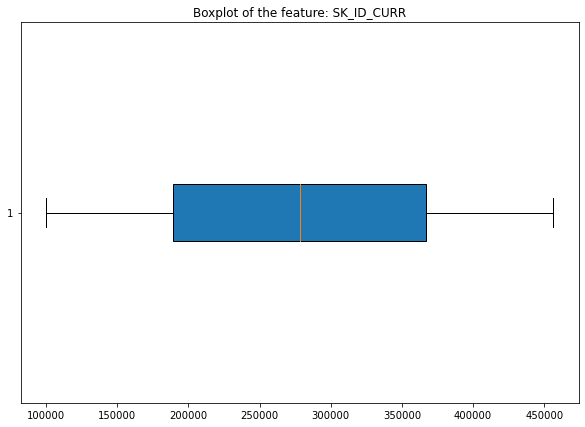

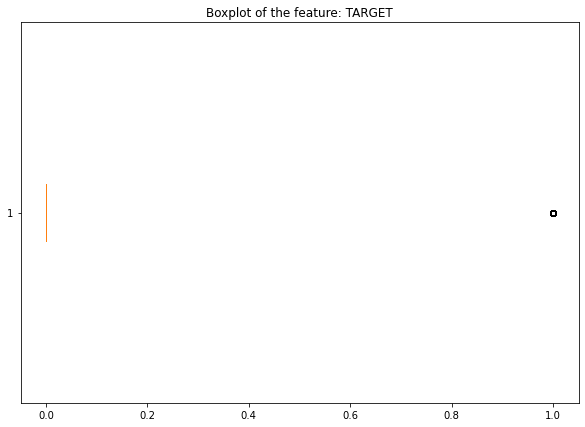

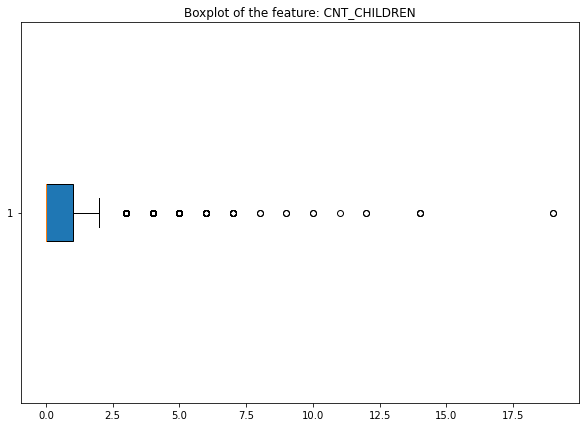

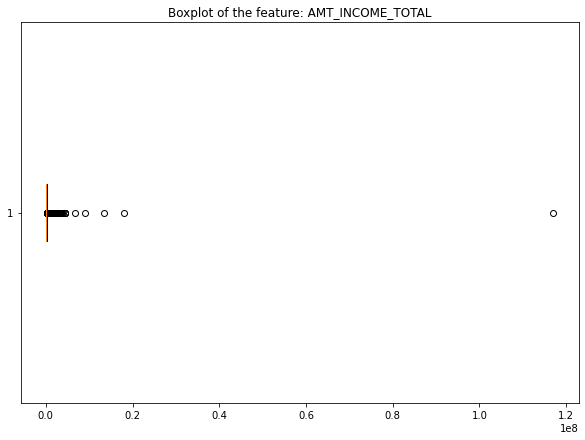

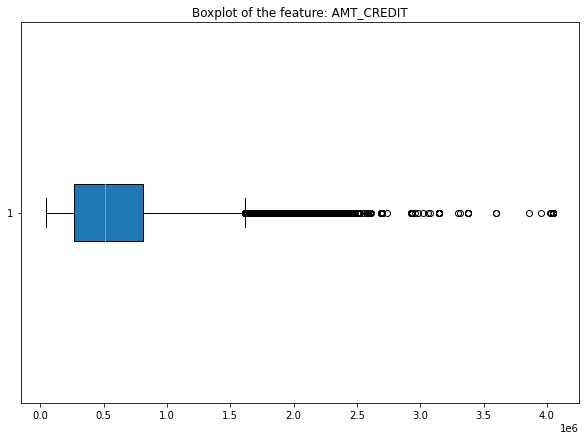

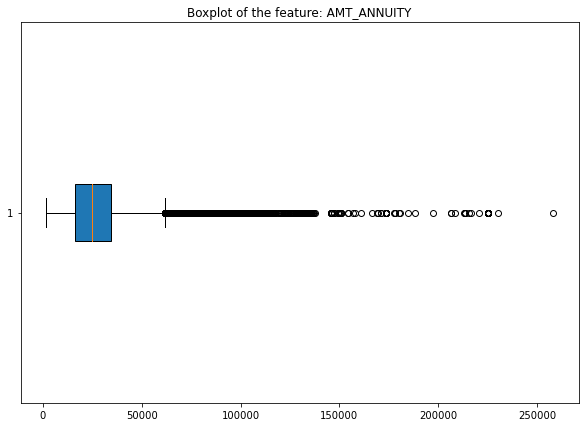

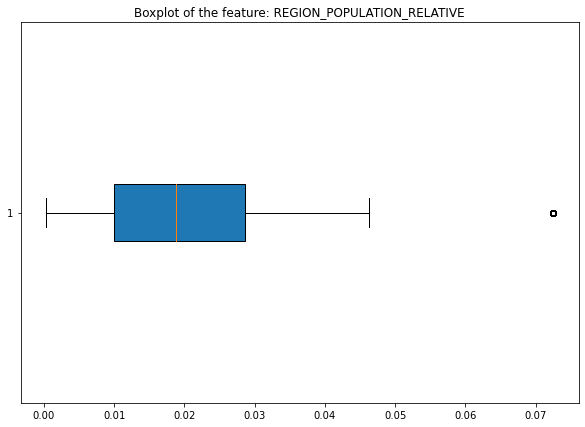

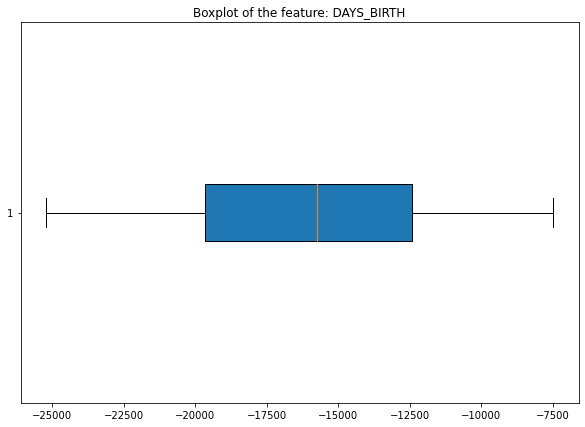

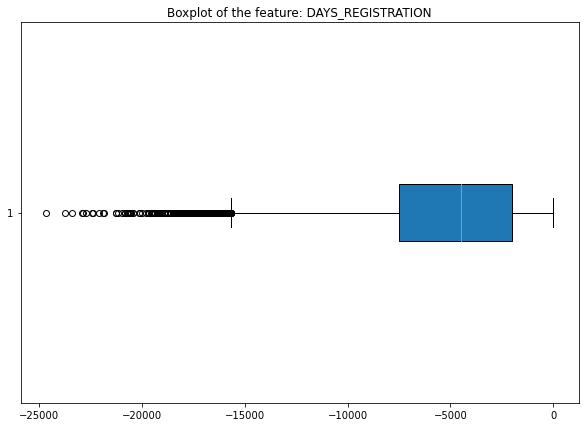

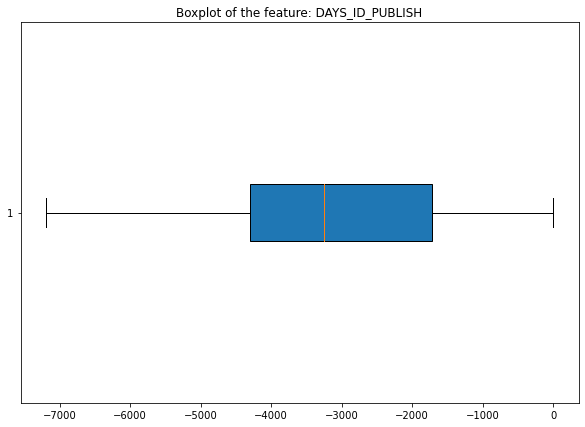

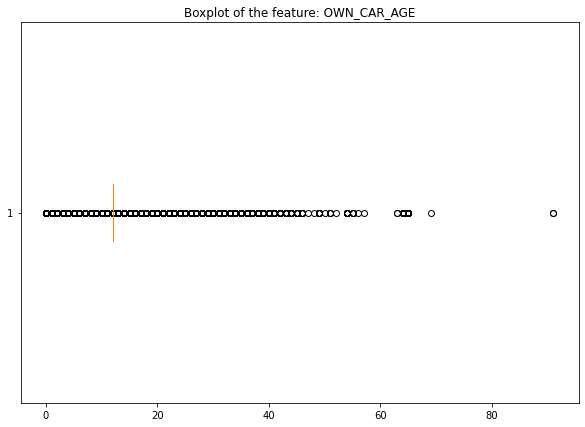

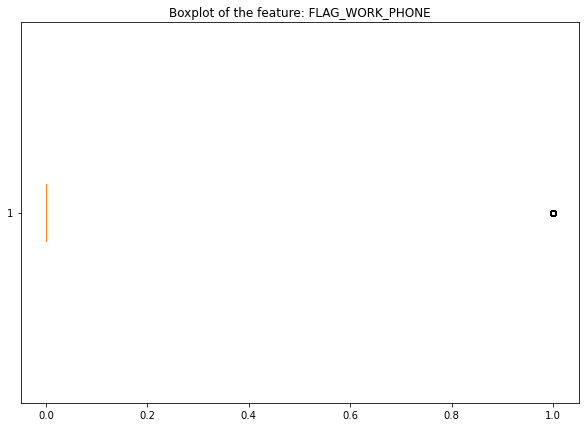

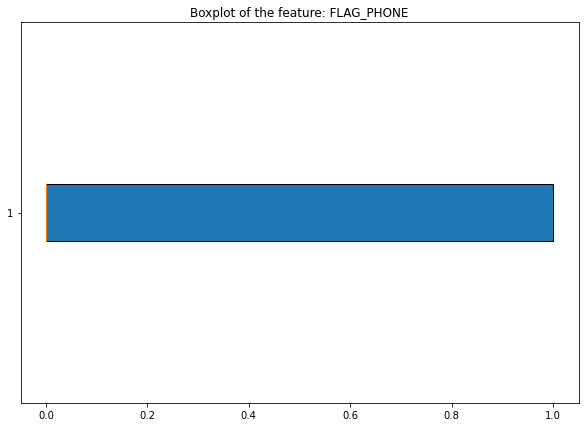

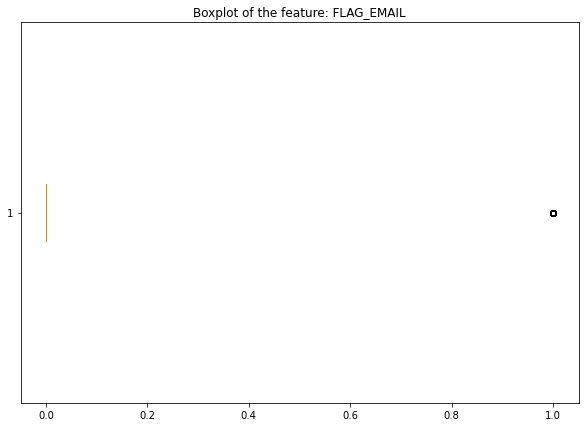

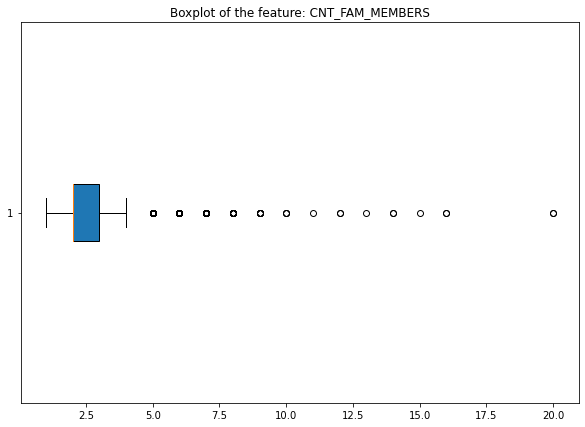

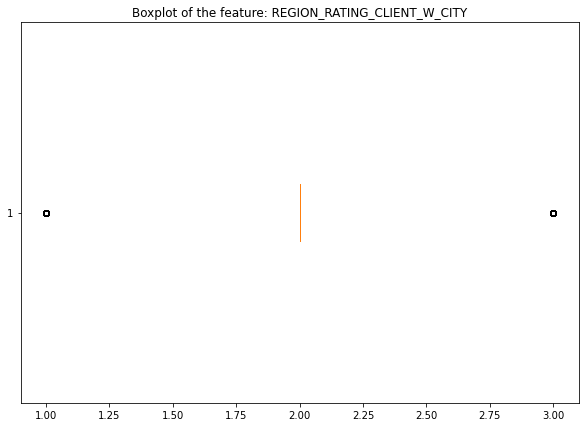

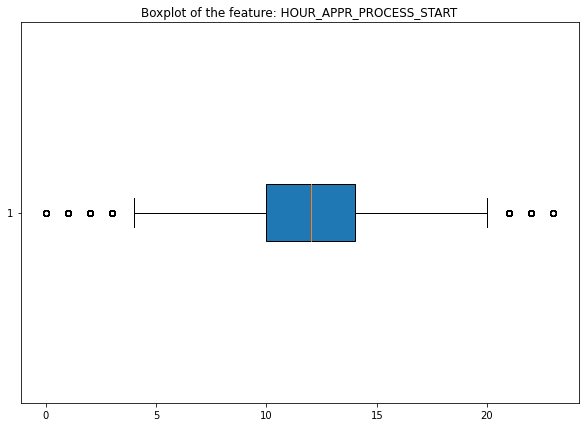

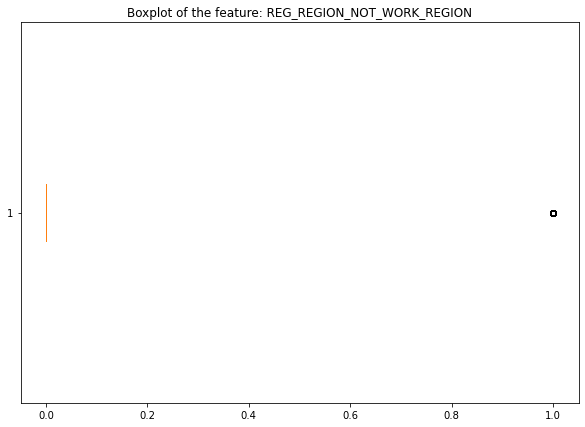

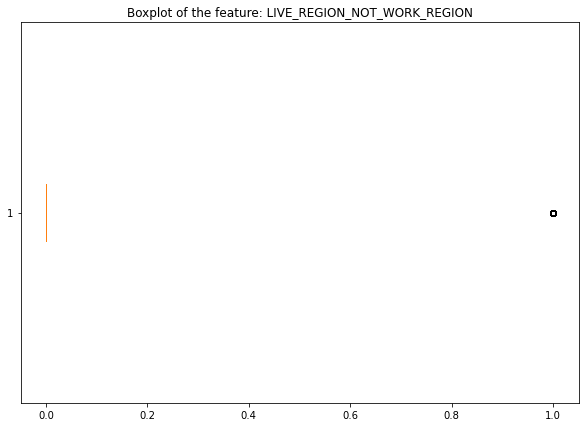

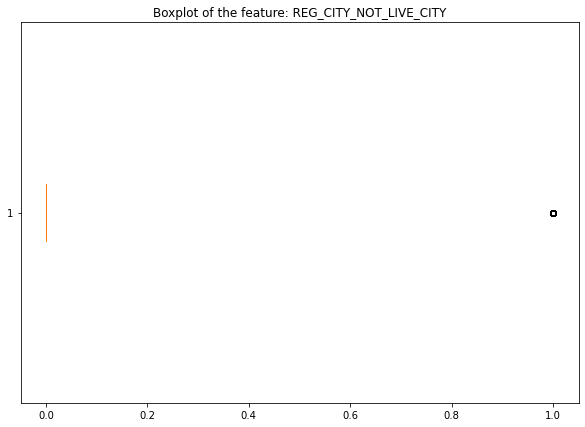

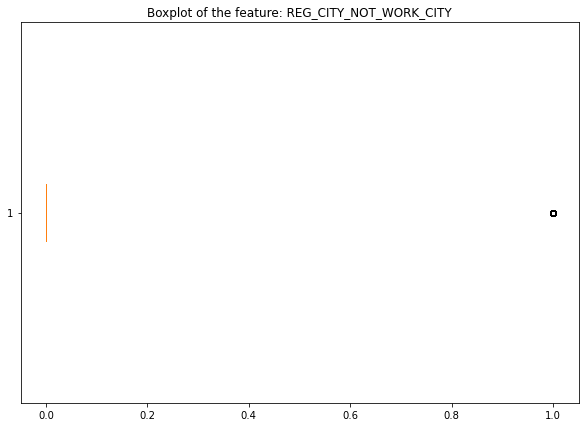

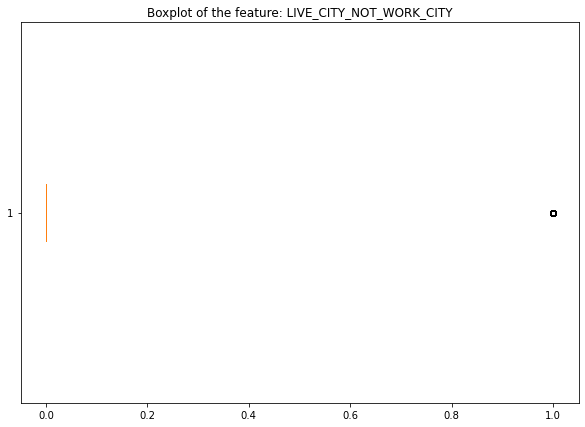

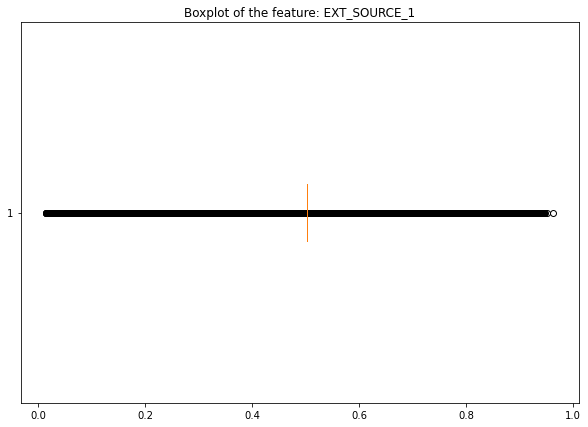

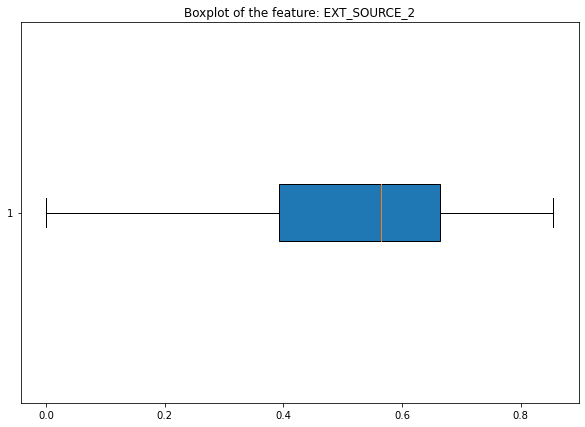

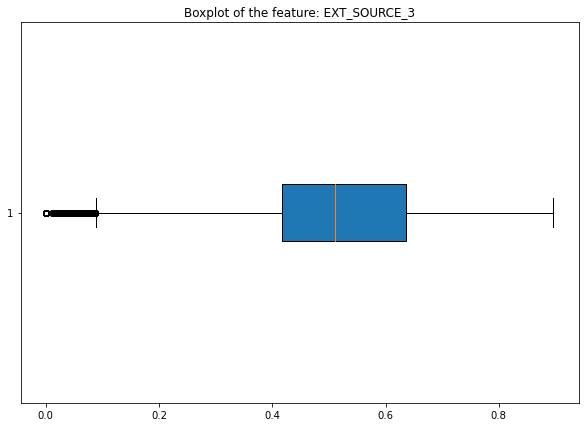

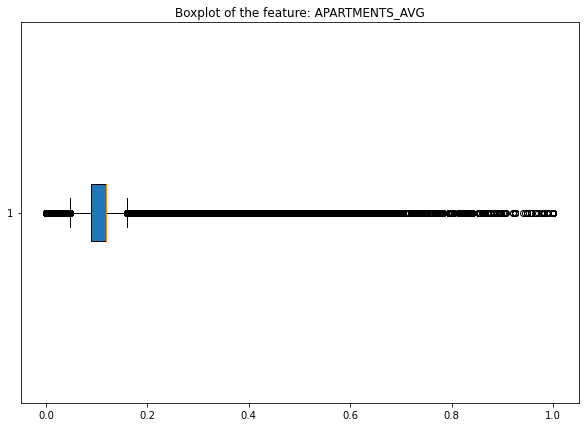

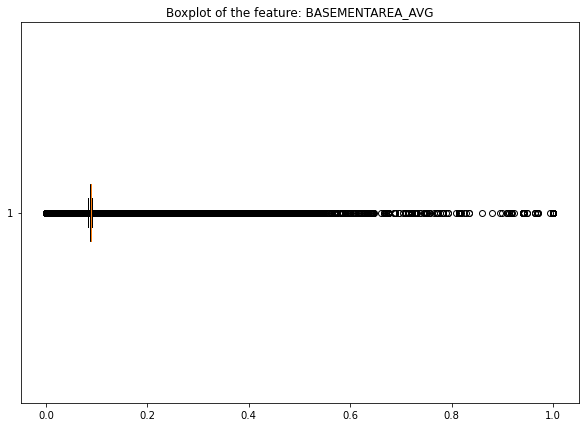

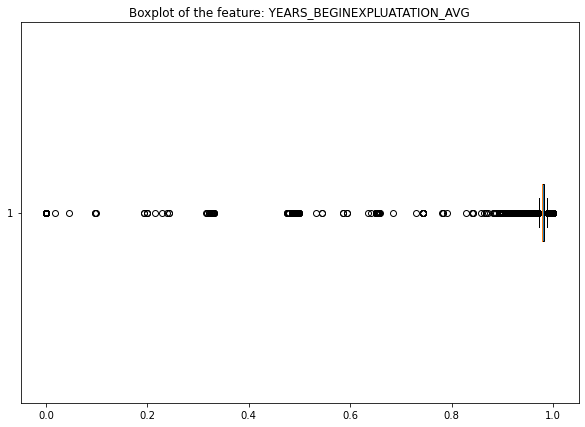

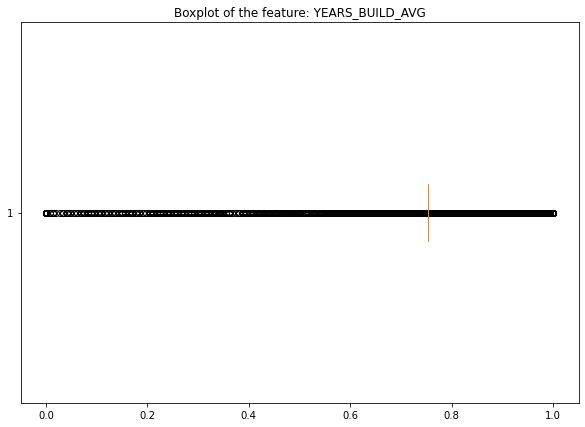

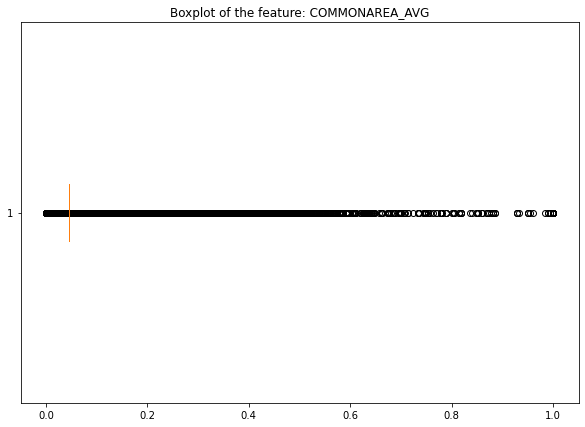

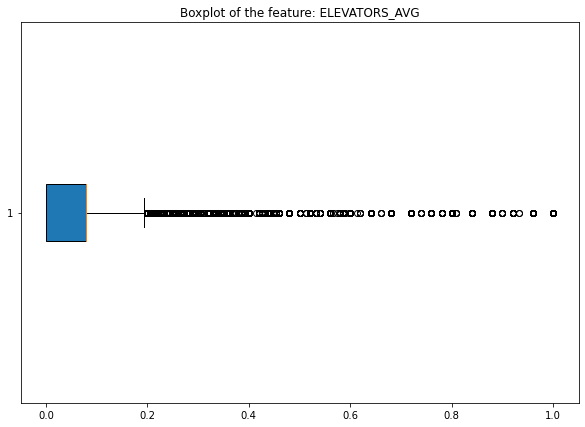

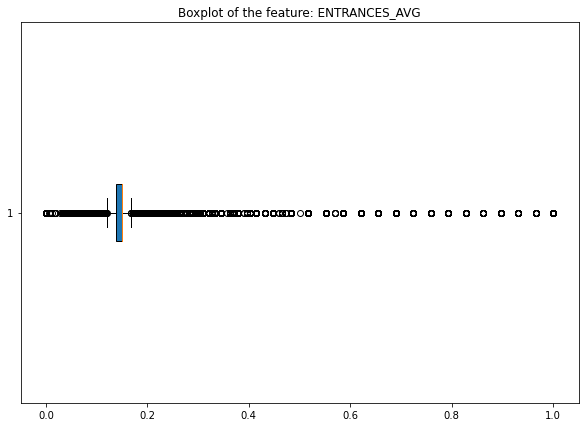

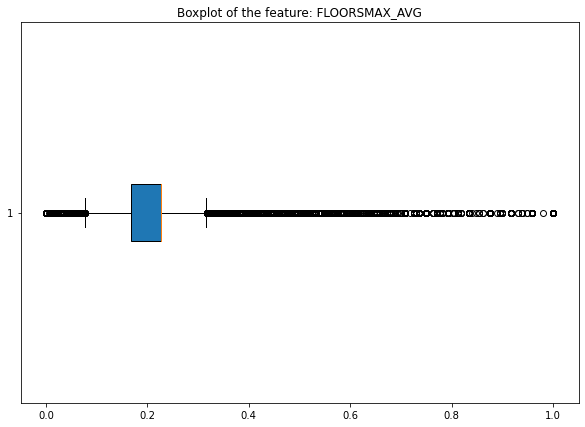

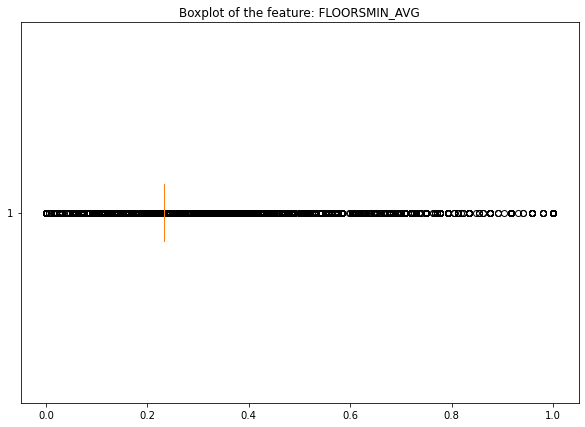

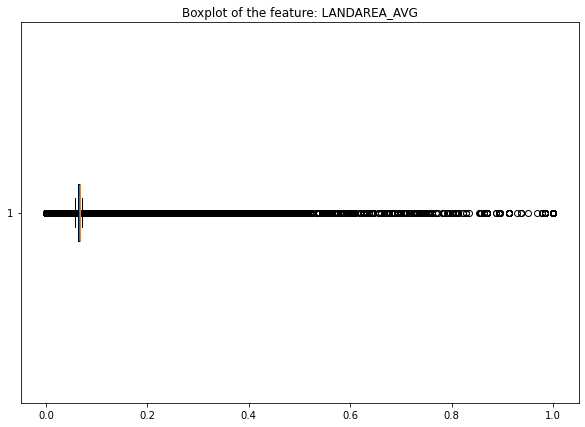

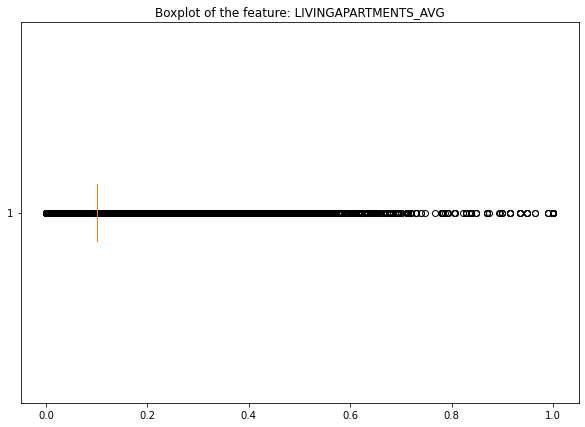

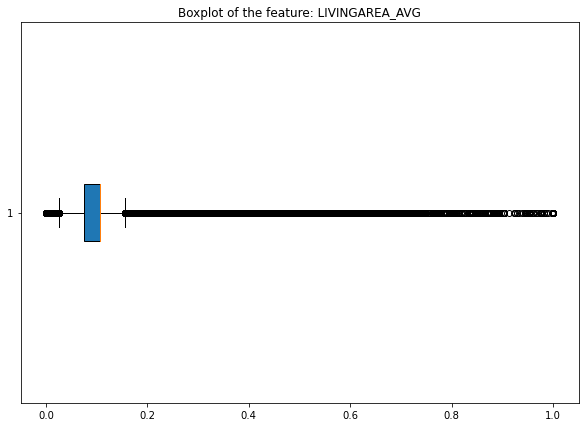

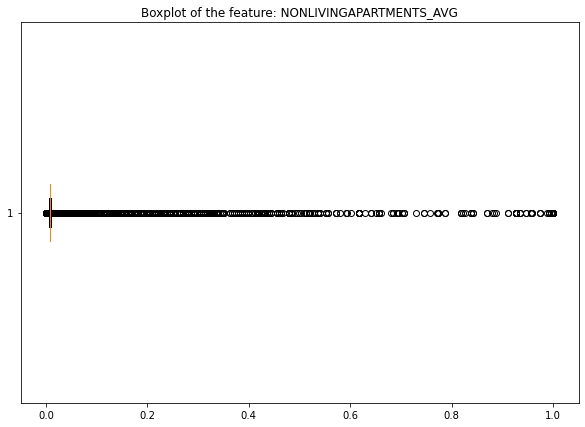

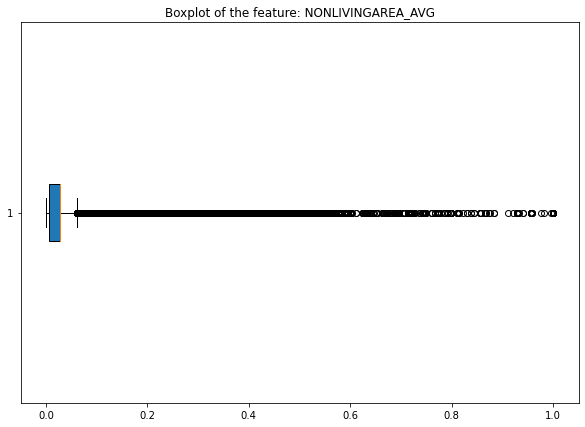

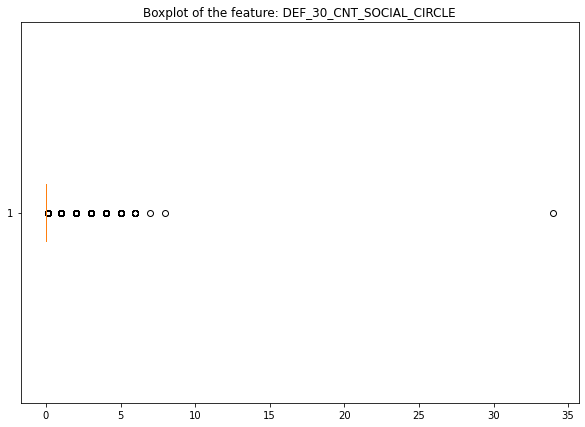

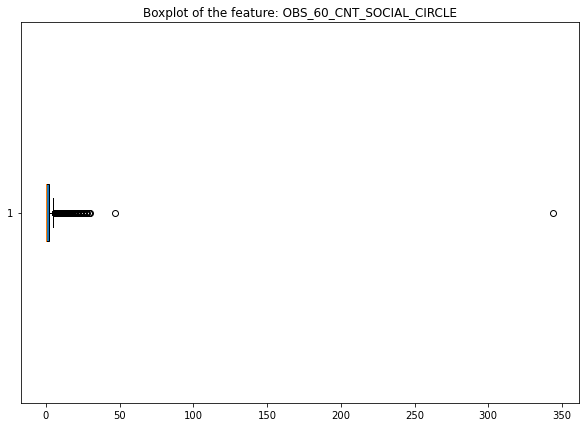

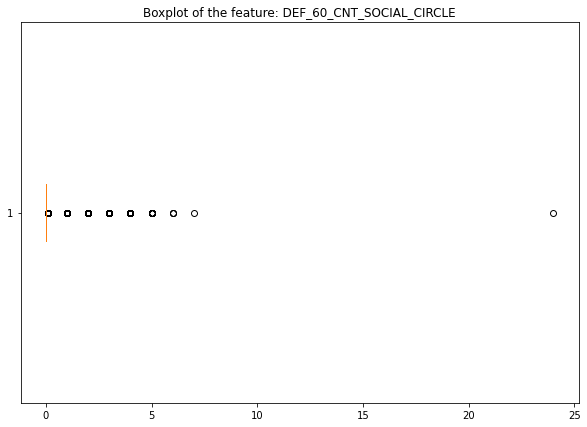

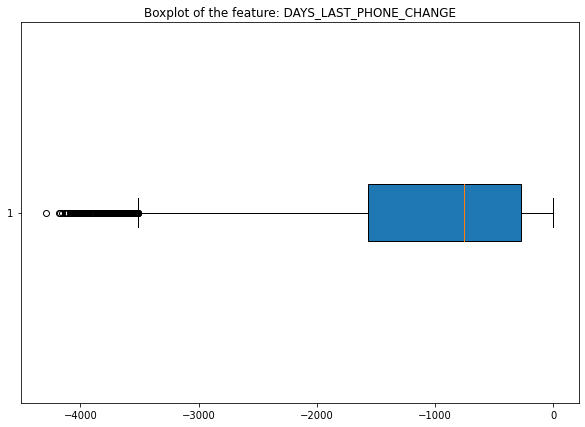

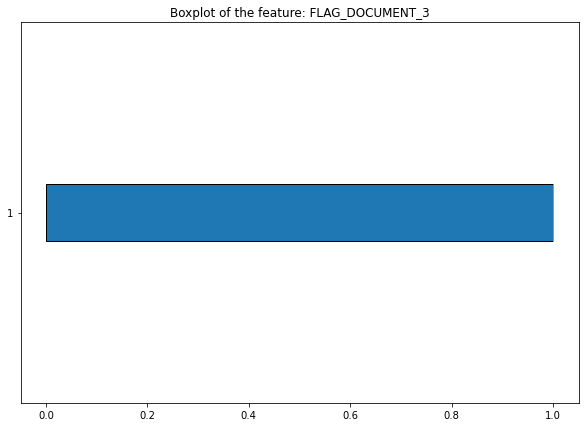

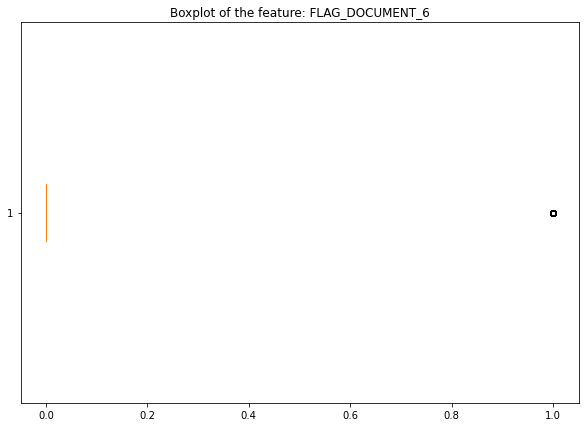

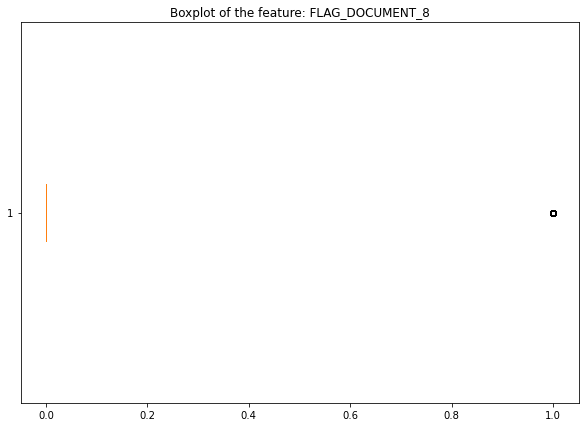

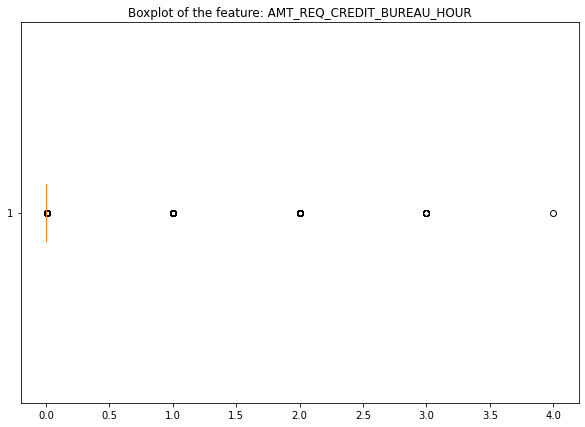

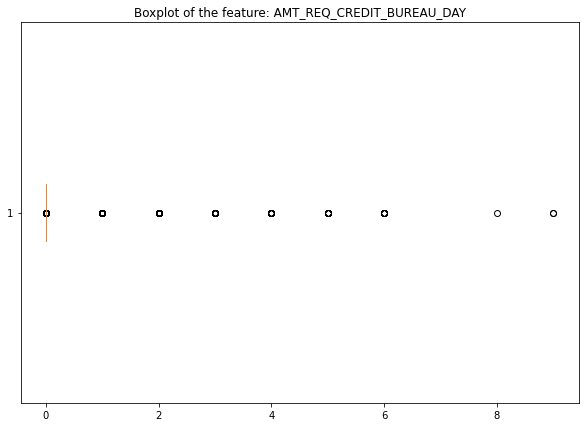

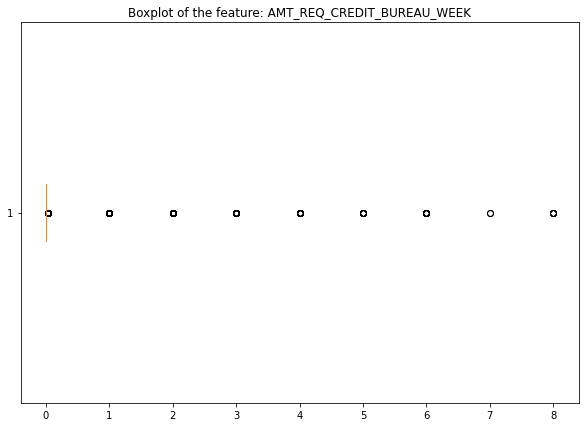

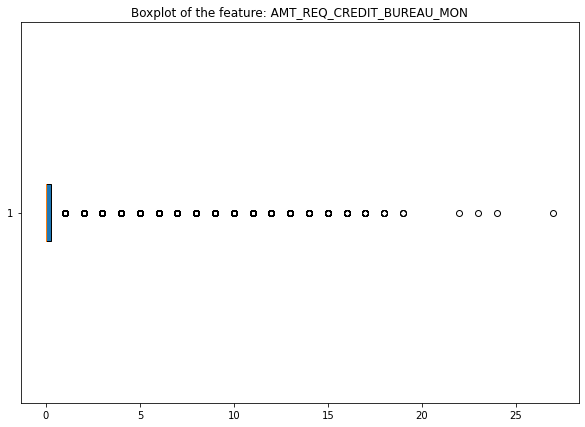

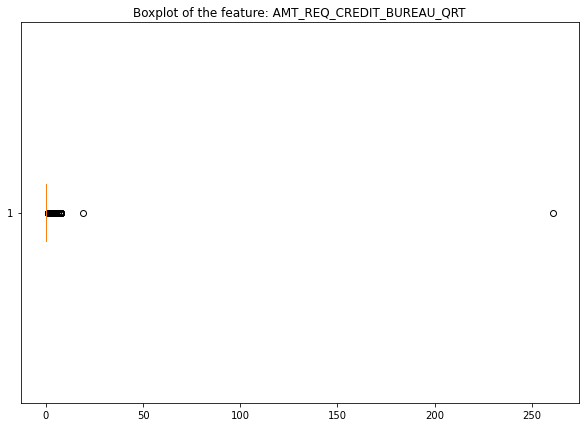

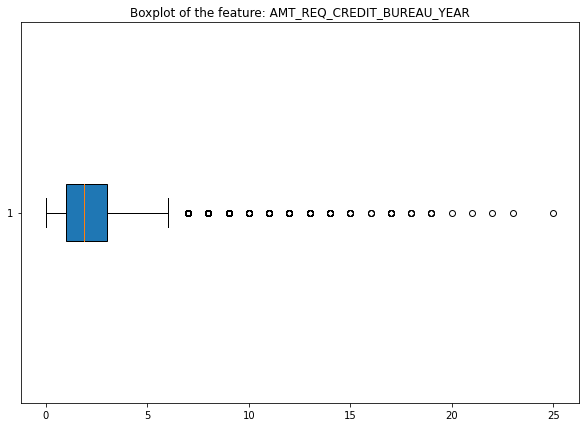

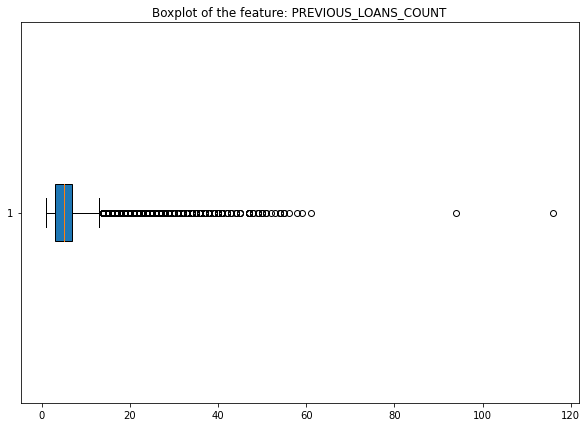

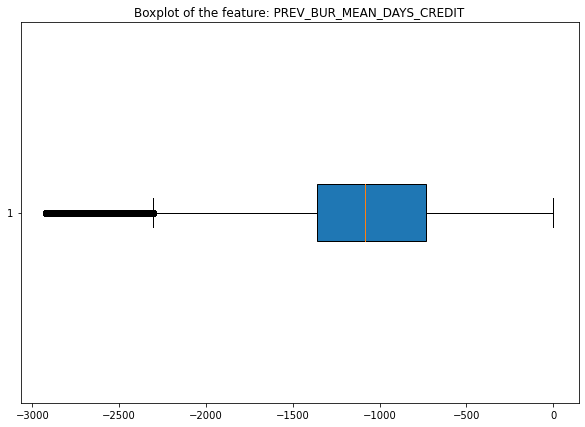

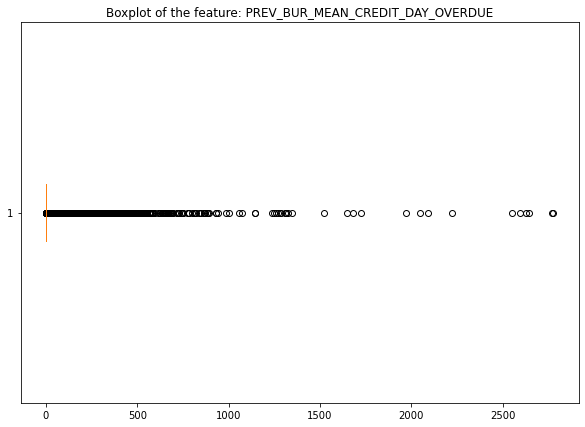

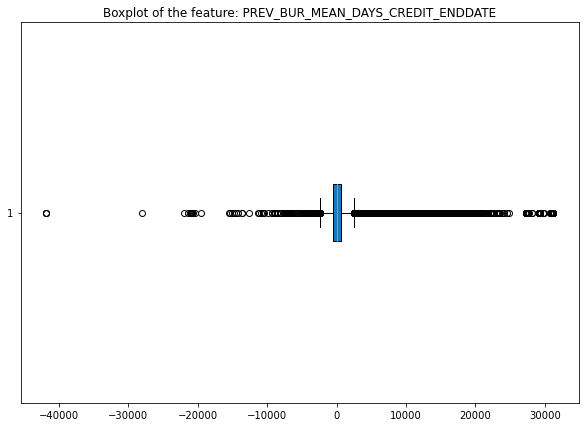

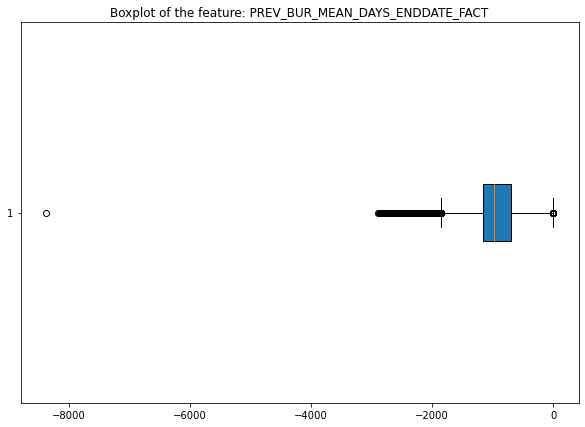

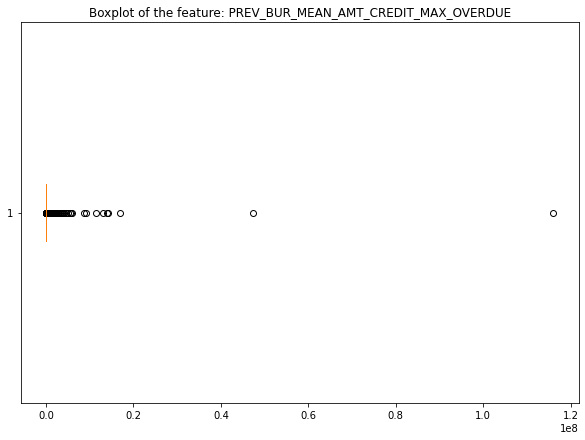

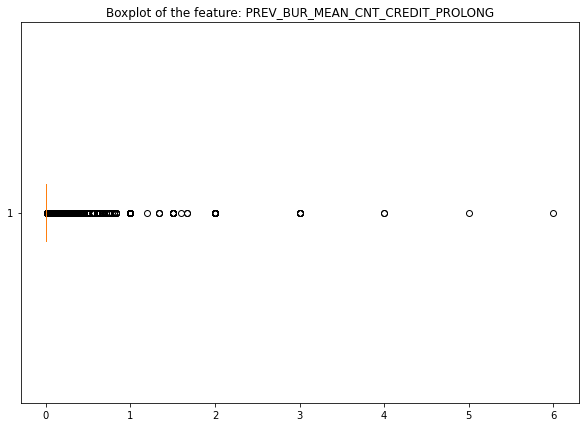

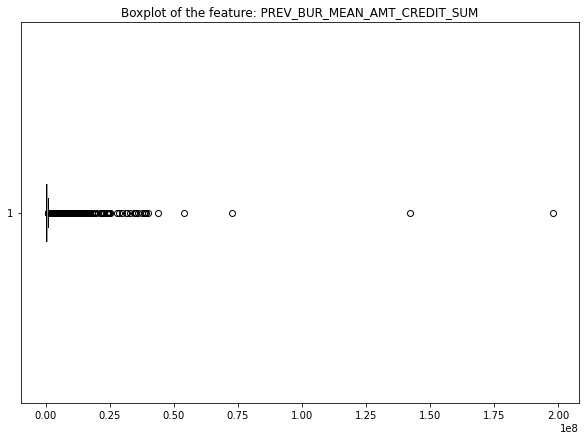

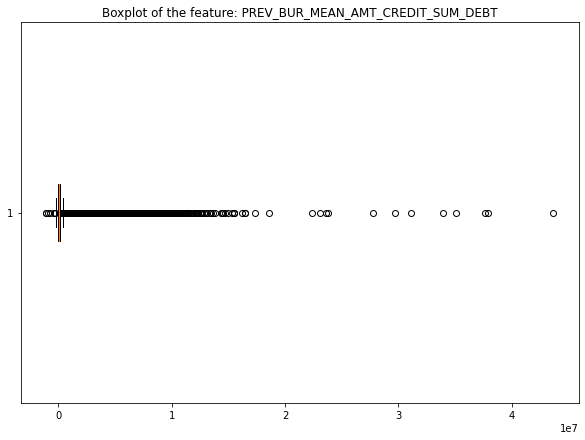

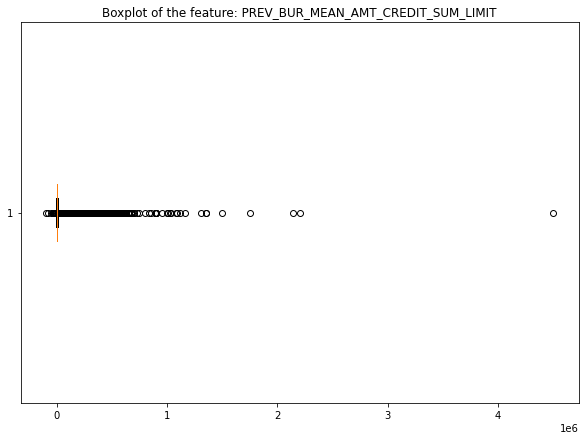

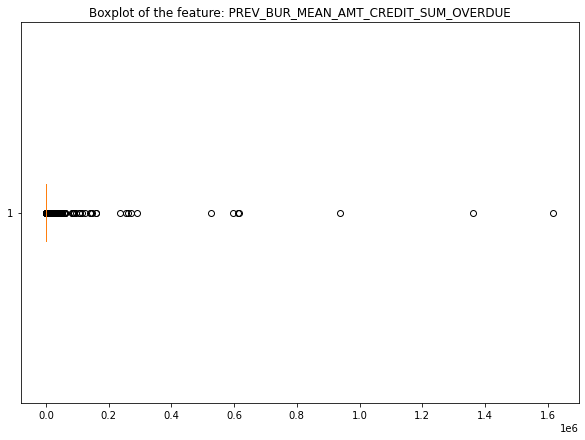

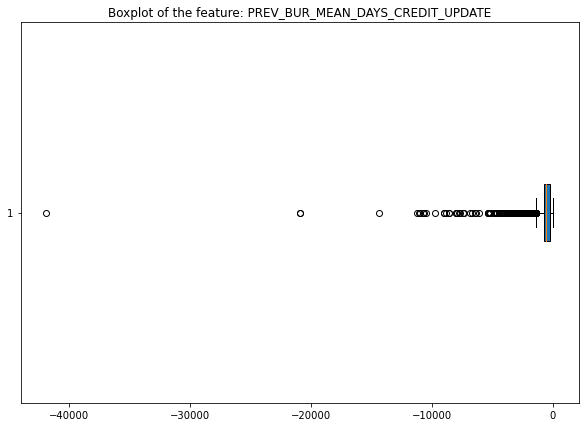

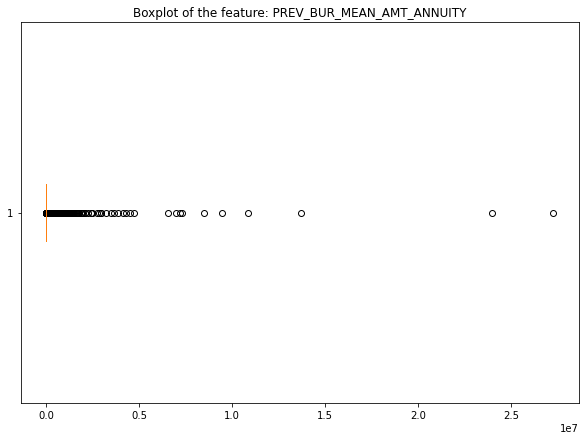

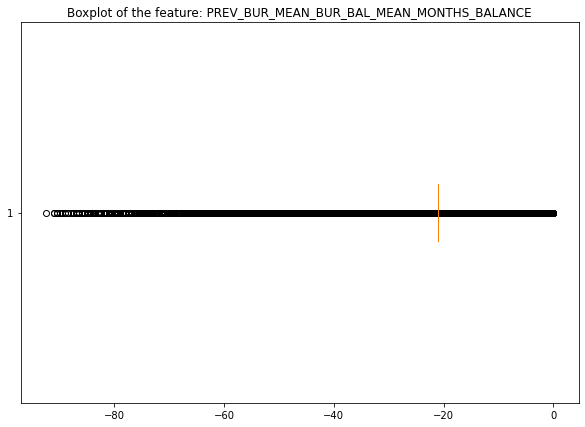

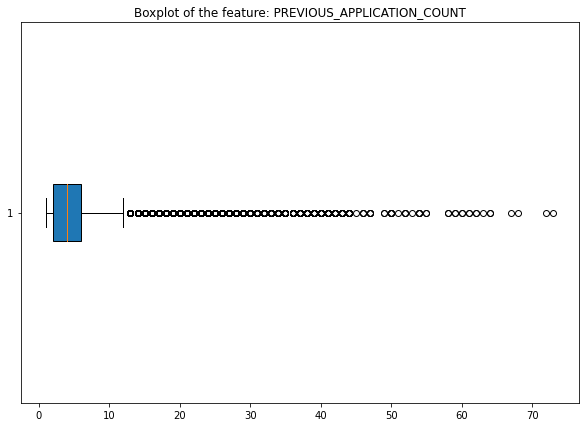

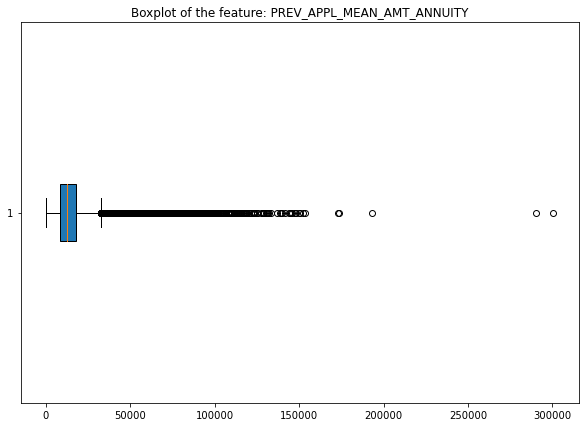

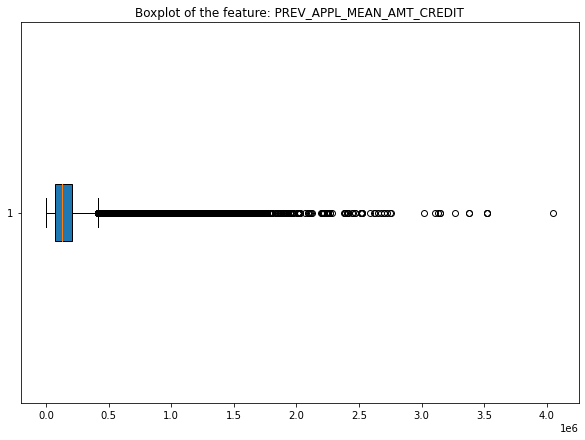

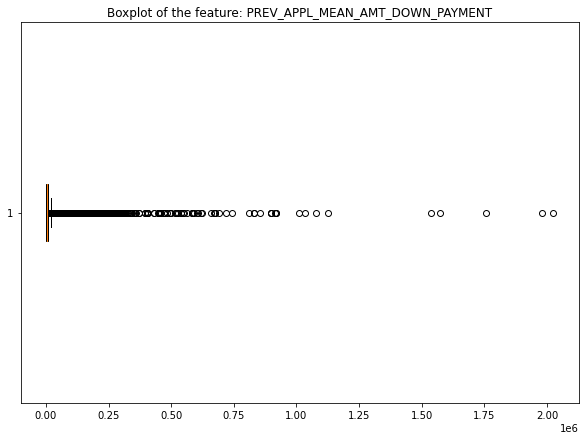

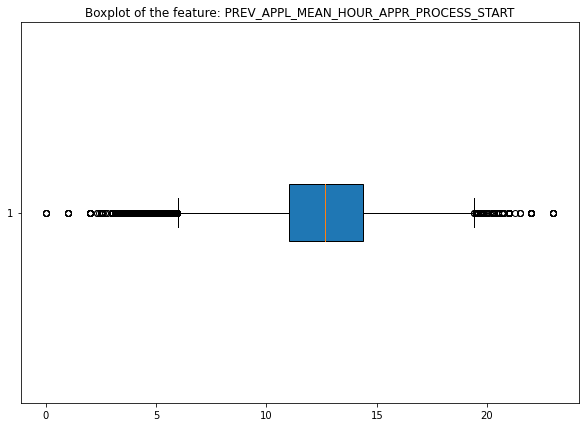

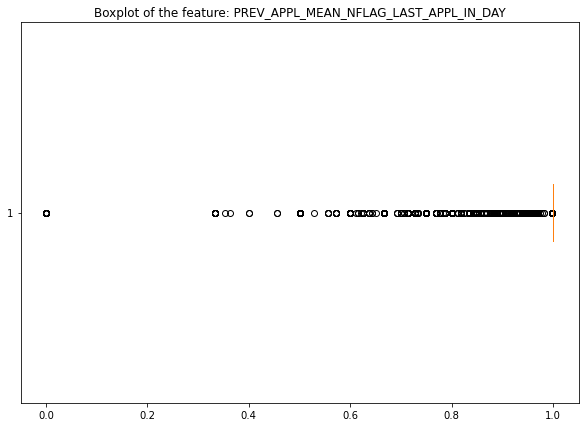

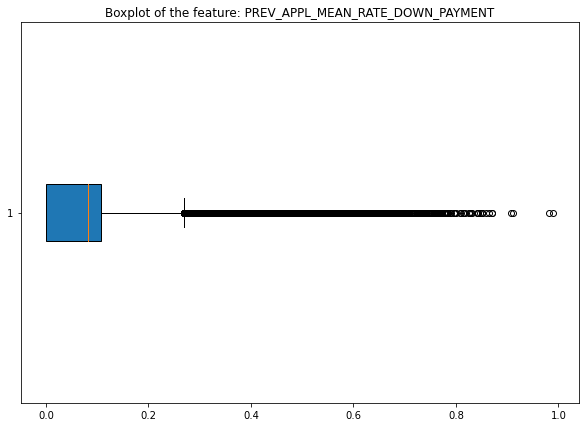

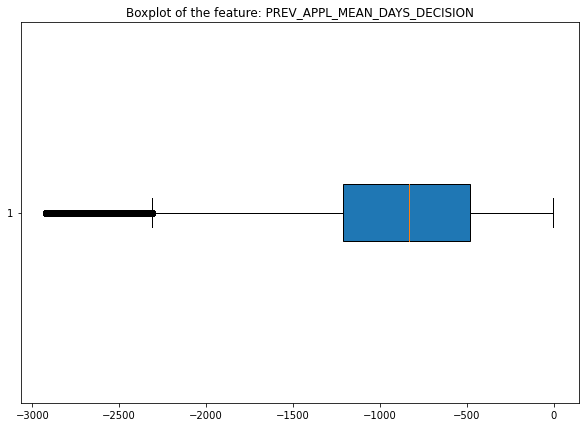

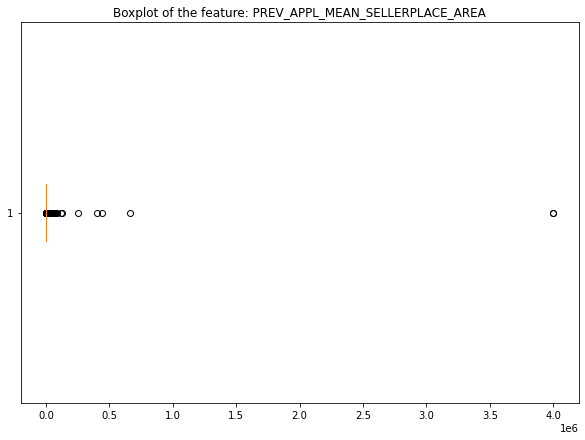

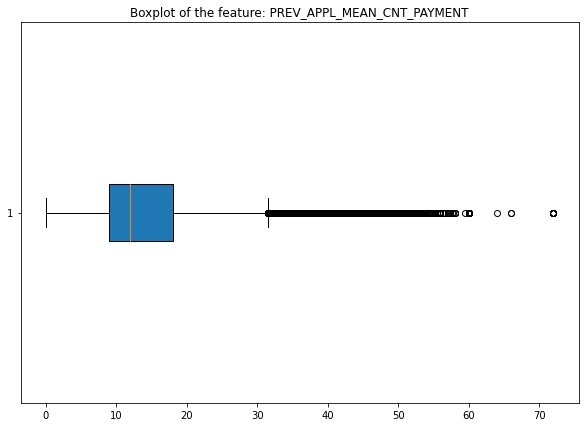

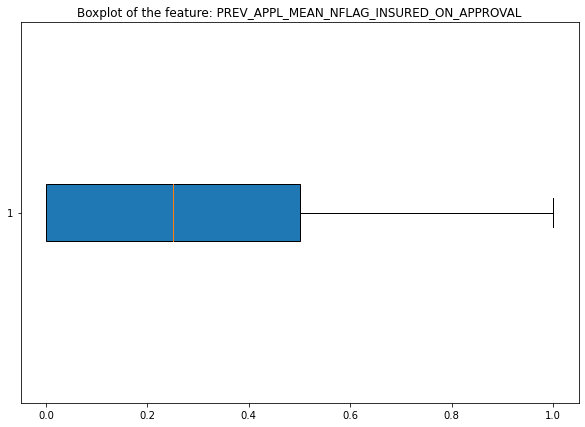

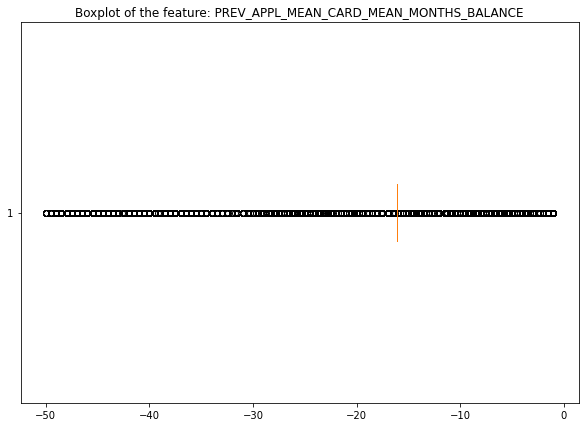

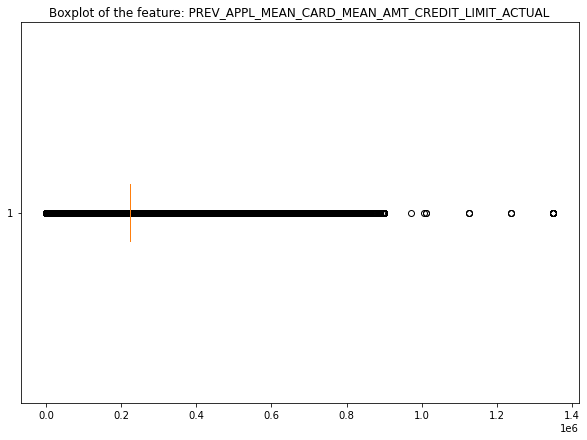

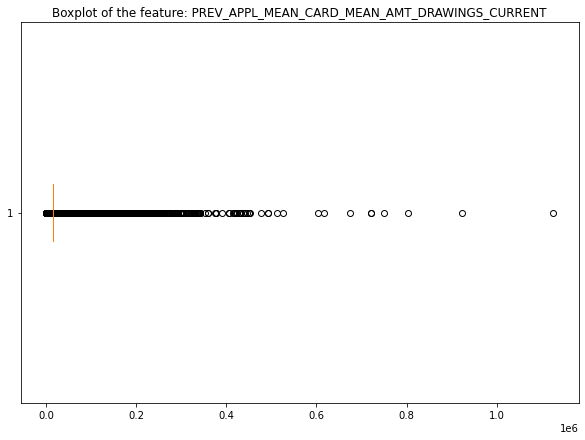

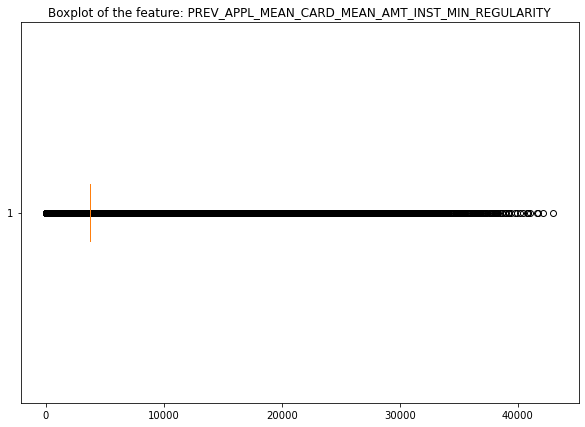

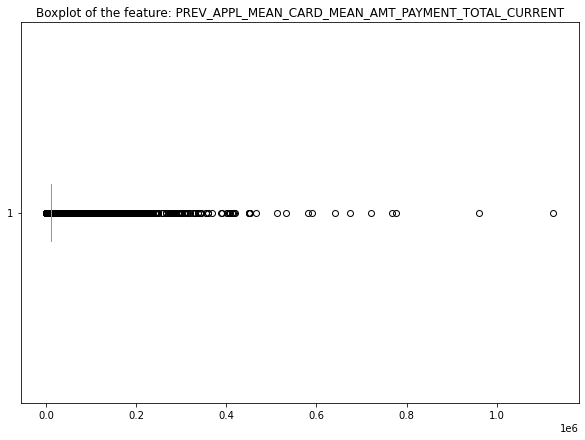

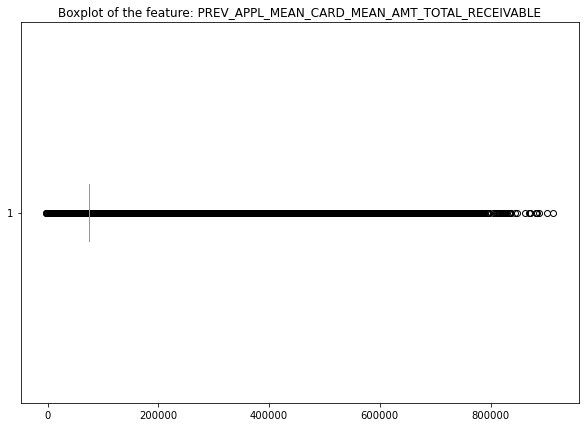

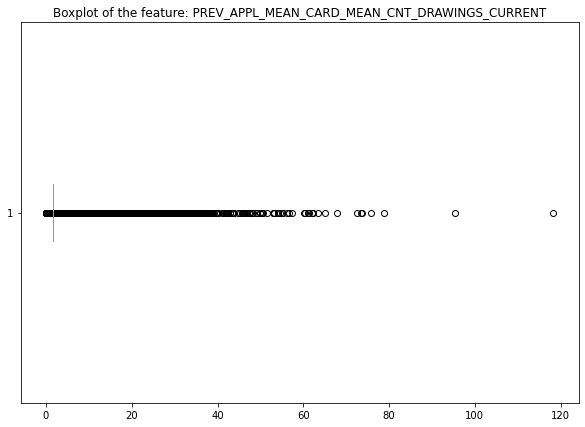

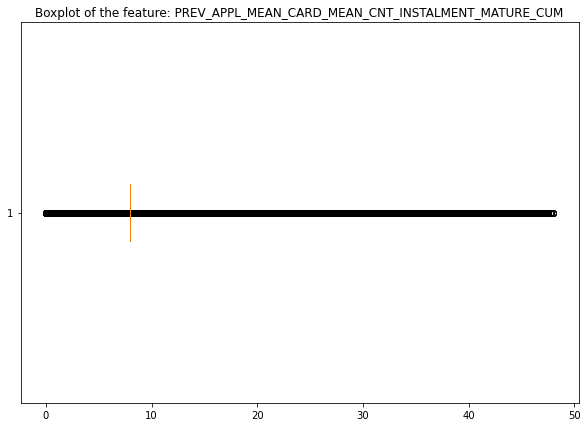

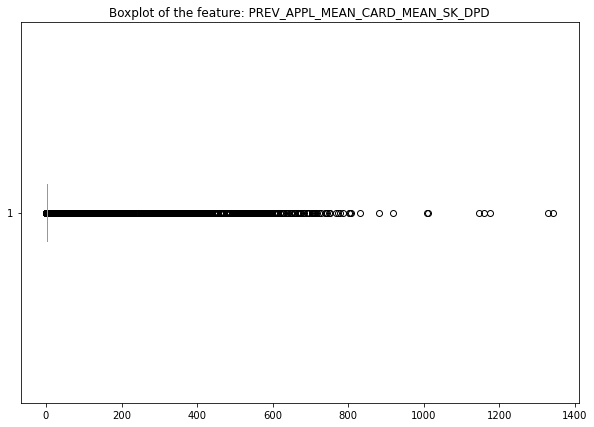

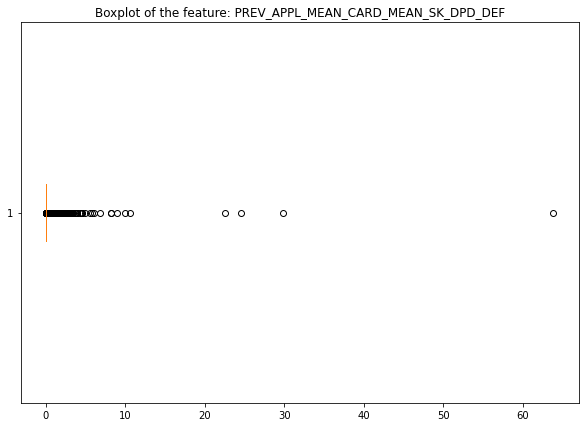

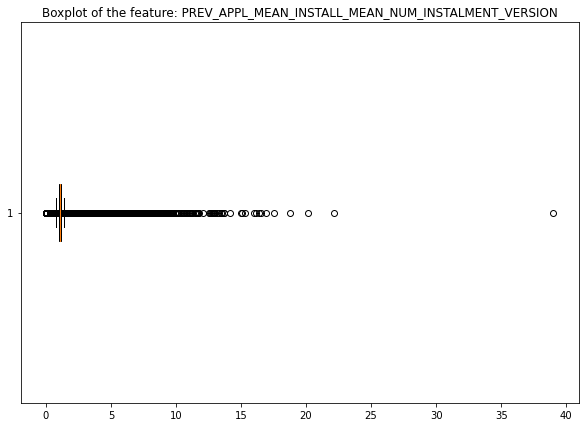

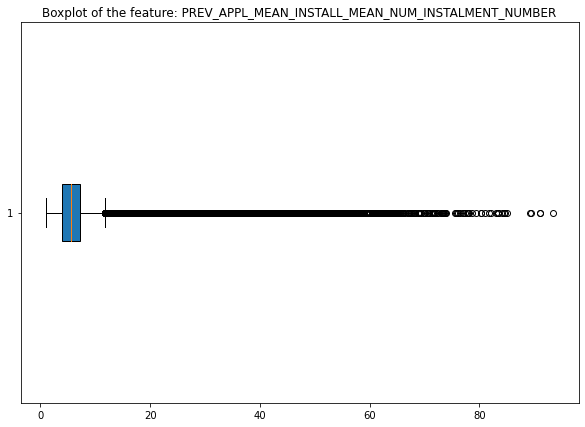

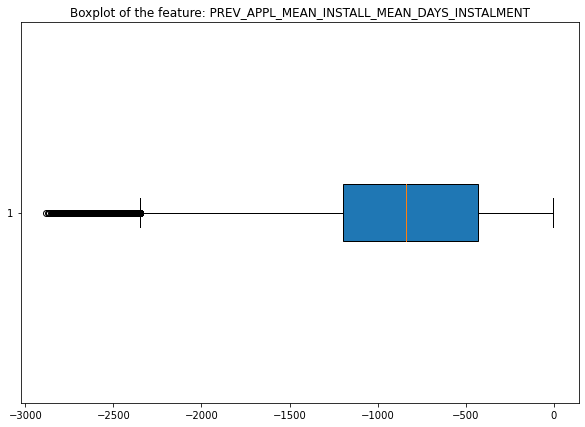

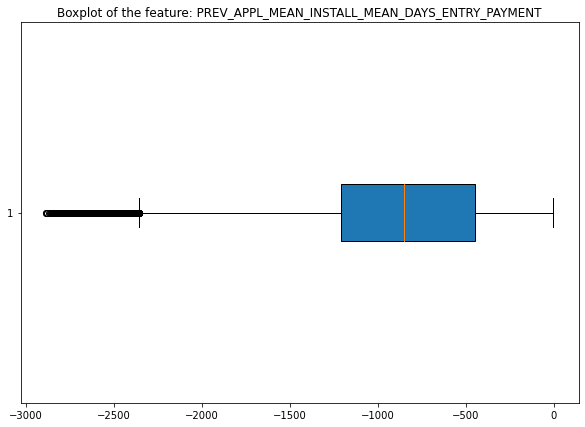

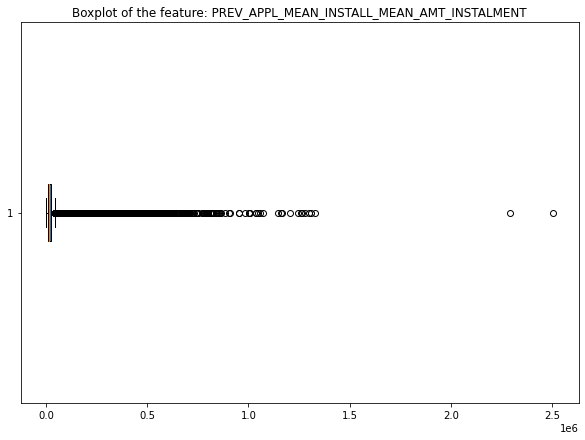

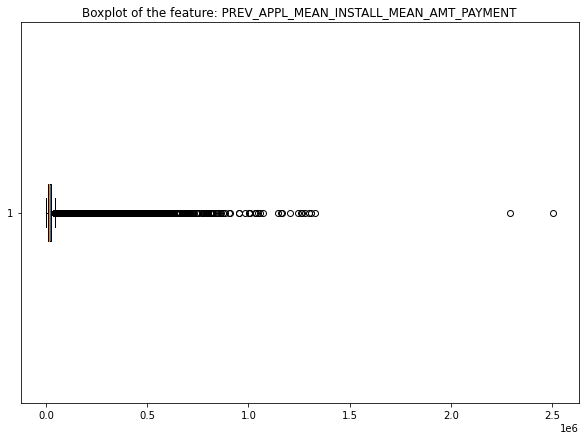

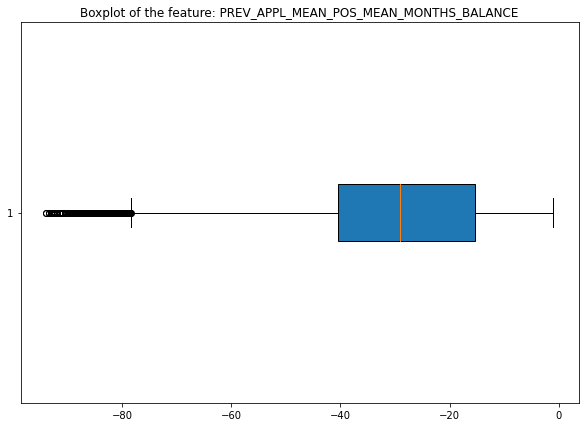

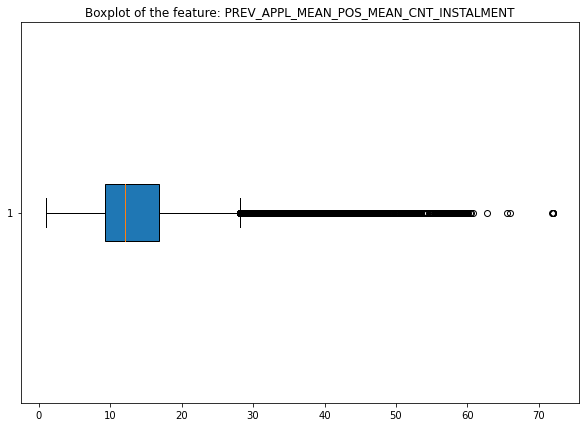

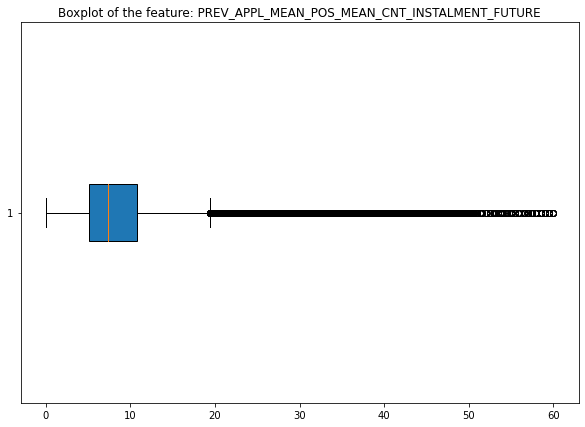

In [248]:
#Using boxplot to see outliers of all features
for feature in numeric_col_train:
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    plt.boxplot(train[feature].dropna(), patch_artist =True, vert = False)
    ax.set_title("Boxplot of the feature: " + feature)

**We can see some insights:**

*There are a lot of columns which have a lot of duplicated values.*
- For example, 'TARGET', 'CNT_CHILDREN' or 'FLAG_WORK_PHONE', etc. just have values '0, 1', so we will remove these columns from variable 'numeric_col_train'. 
- 'AMT_REQ_CREDIT_BUREAU_HOUR' have 5 kinds of duplicated values, so we will remove these columns from variable 'numeric_col_train'
- 'SK_ID_CURR' column doesn't need to drop outlier, so we will remove these columns from variable 'numeric_col_train'

In [249]:
#Remove these columns from variable 'numeric_col_train'
list_to_remove = ["SK_ID_CURR", 'TARGET', 'CNT_CHILDREN', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT_W_CITY',
                                            'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                                            'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
                                            'AMT_REQ_CREDIT_BUREAU_HOUR']

final_list = list(set(numeric_col_train) - set(list_to_remove))

In [250]:
#We drop outliers with Q1-5%, Q3-95%
for x in final_list:
    q95,q5 = np.percentile(train.loc[:,x],[95,5])
    intr_qr = q95-q5
 
    max = q95+(1.5*intr_qr)
    min = q5-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [251]:
train.dropna(axis = 0, inplace = True)

In [252]:
#Size of train dataset after removing outliers
train.shape

(218646, 112)

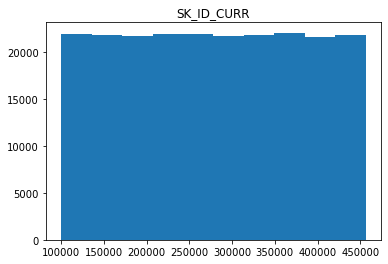

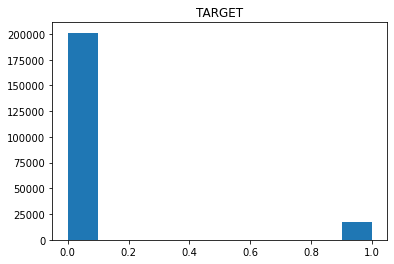

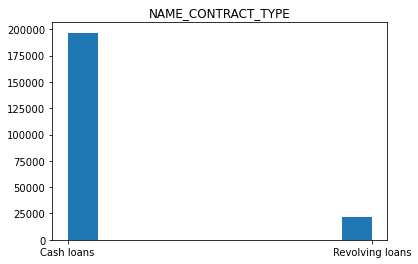

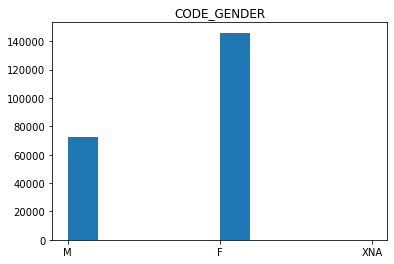

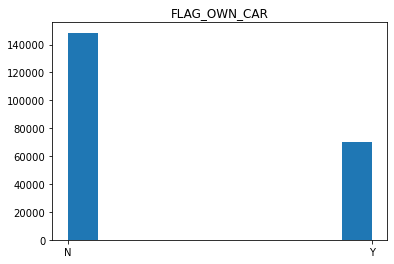

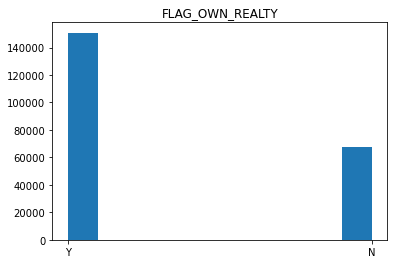

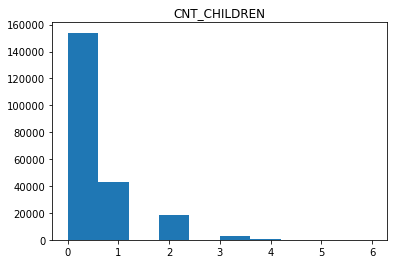

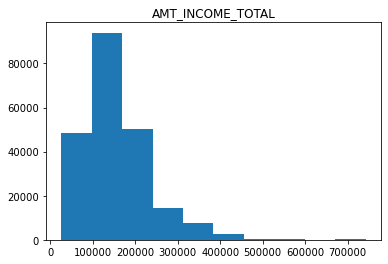

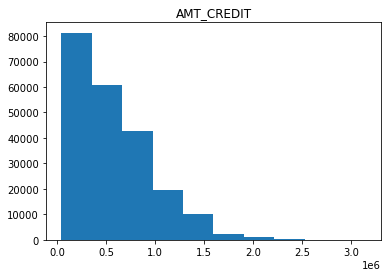

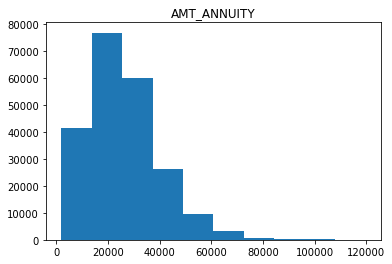

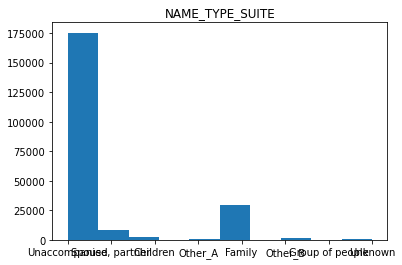

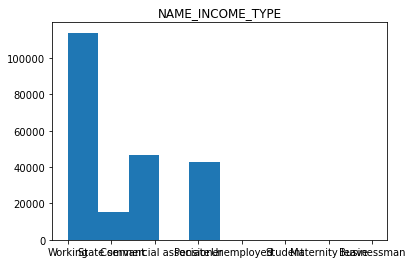

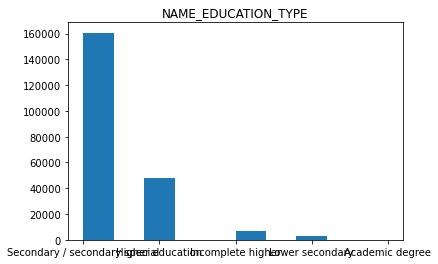

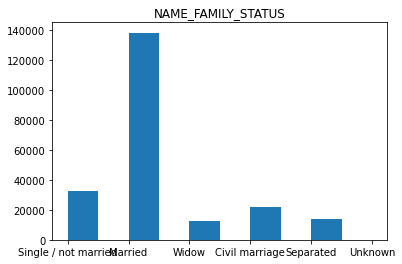

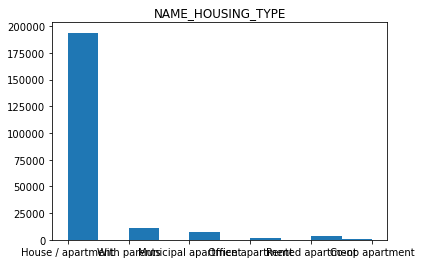

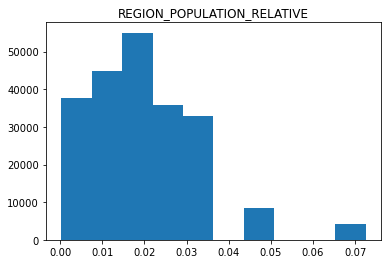

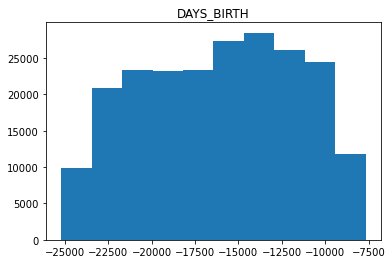

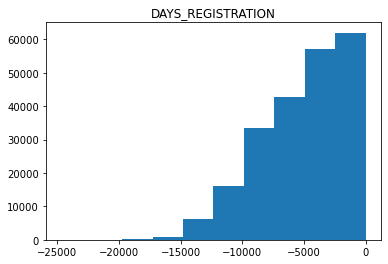

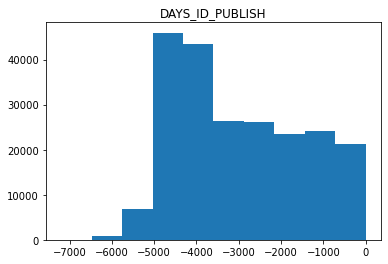

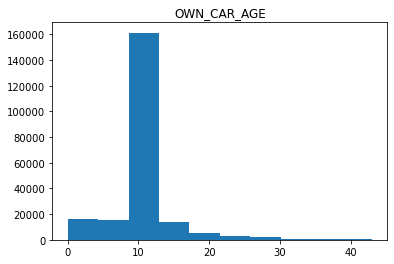

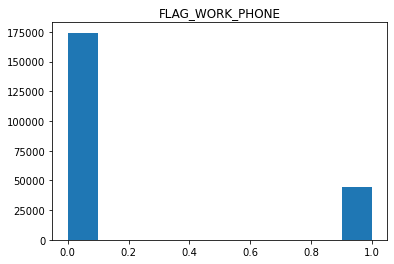

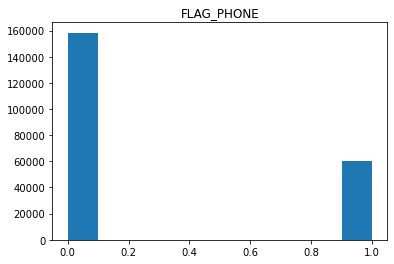

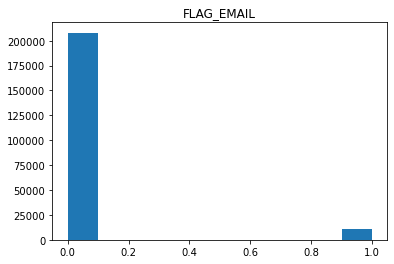

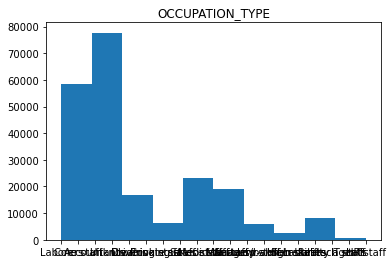

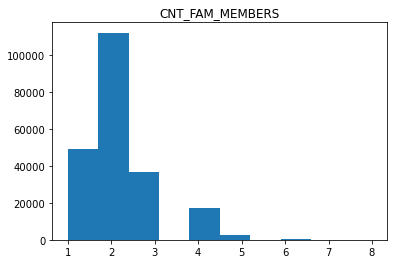

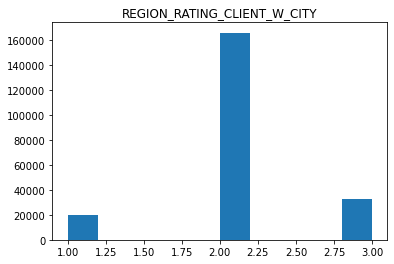

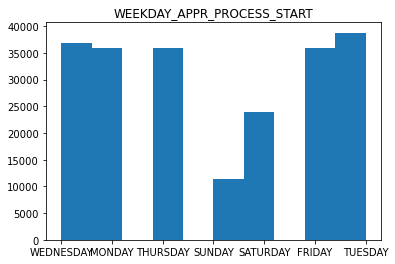

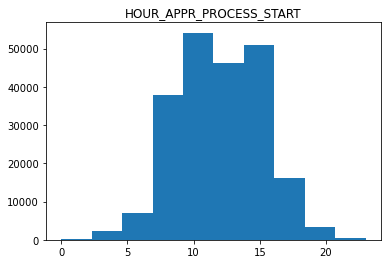

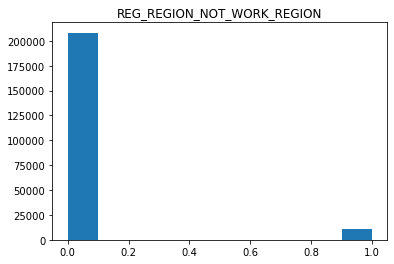

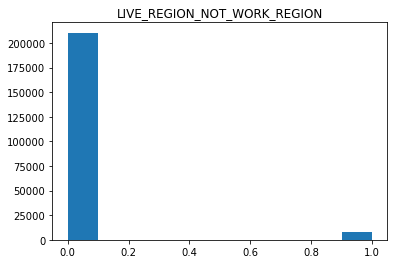

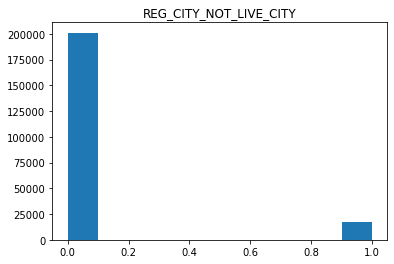

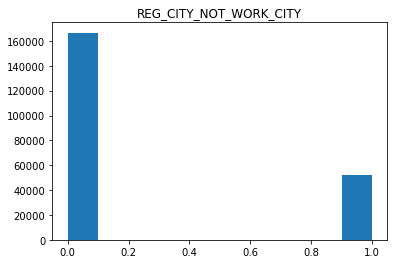

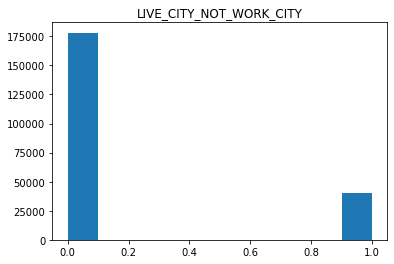

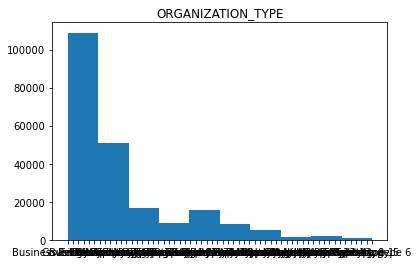

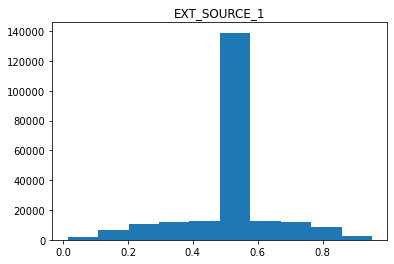

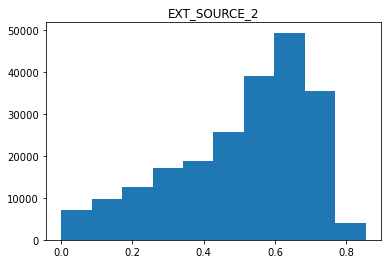

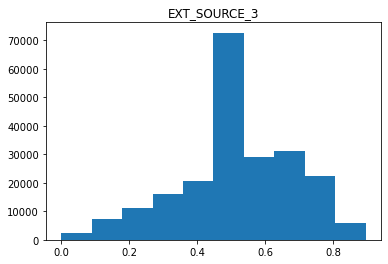

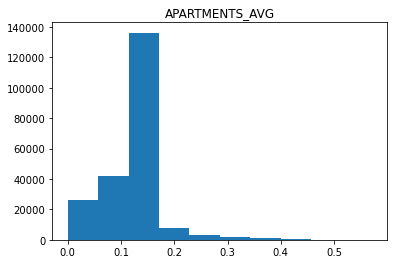

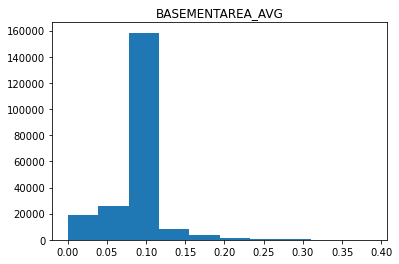

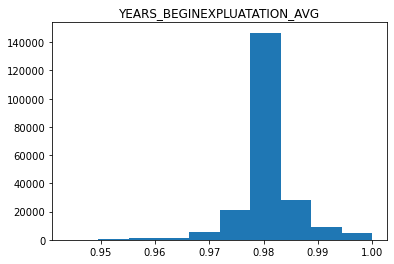

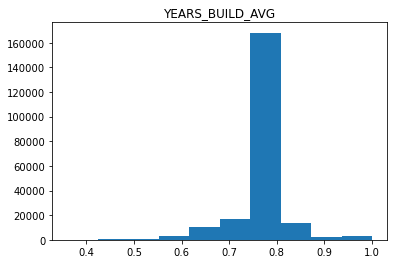

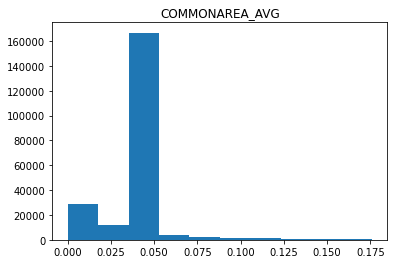

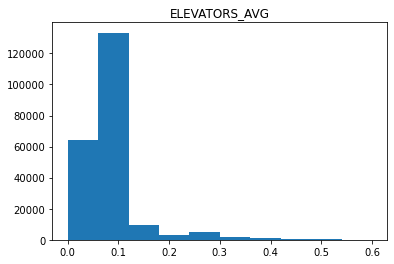

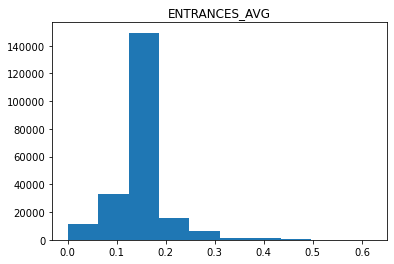

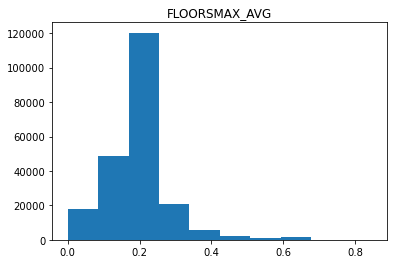

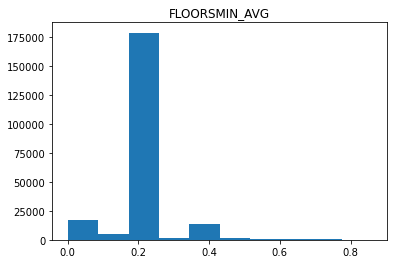

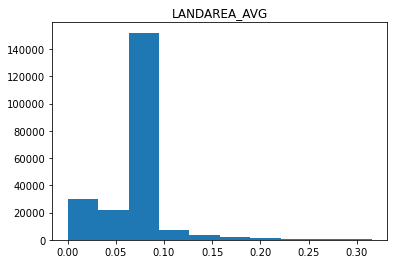

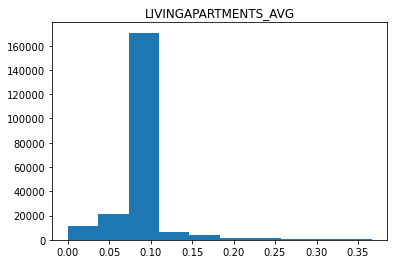

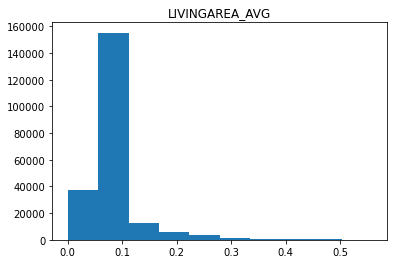

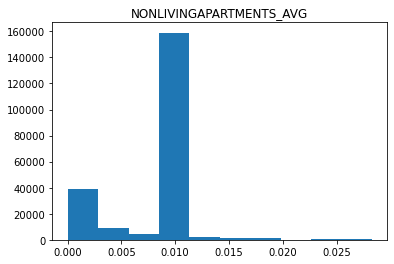

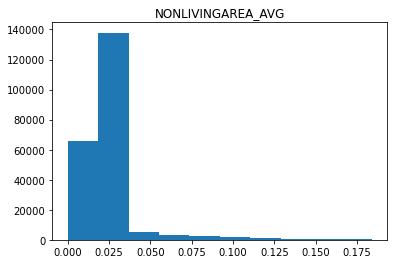

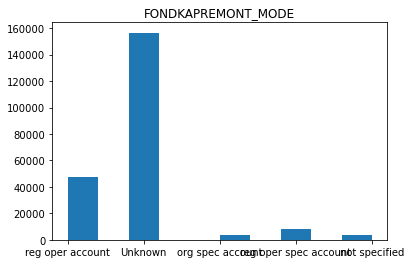

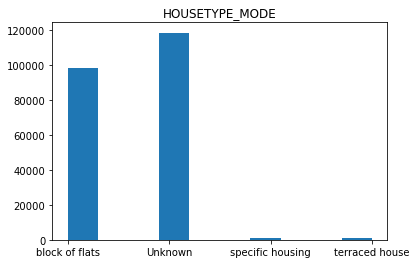

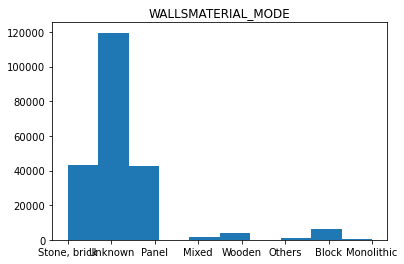

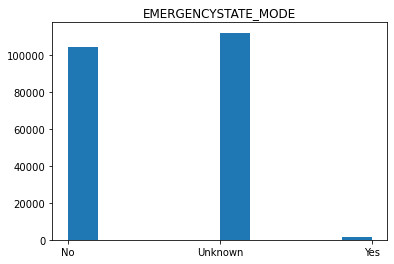

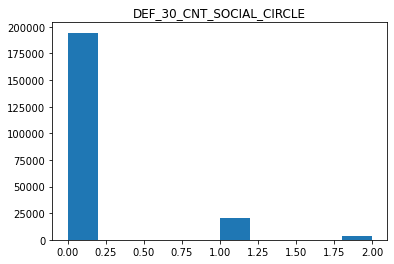

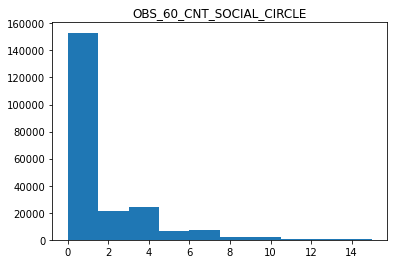

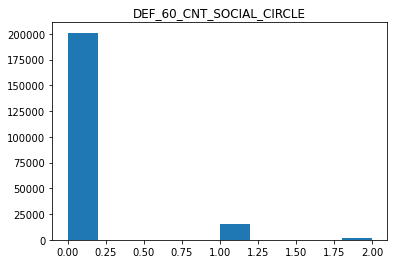

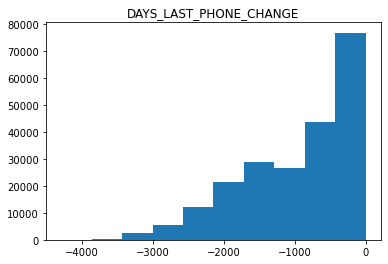

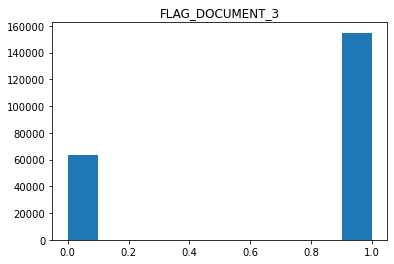

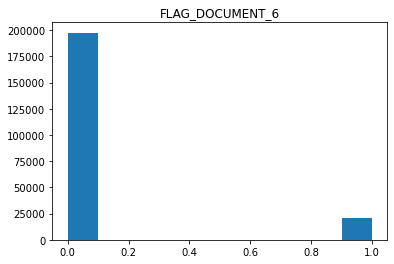

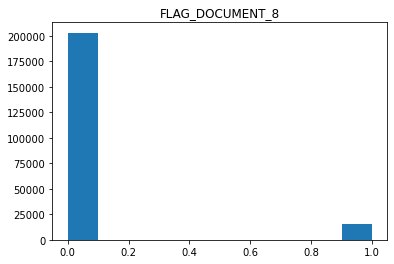

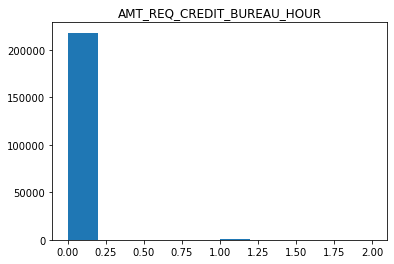

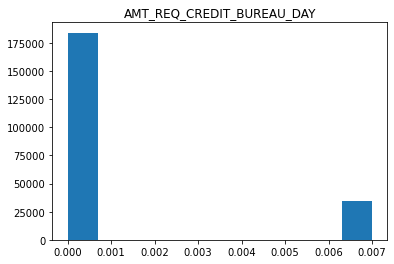

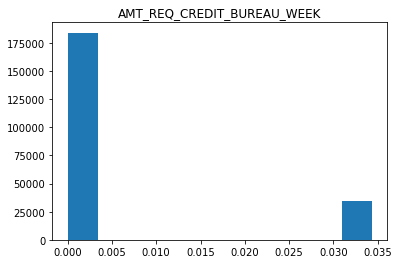

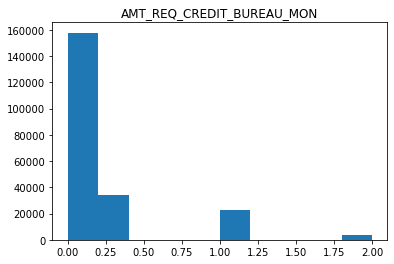

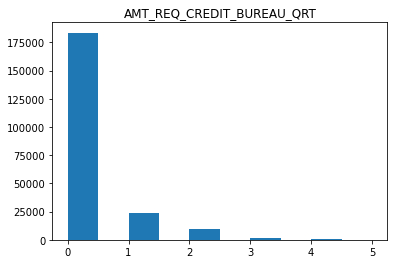

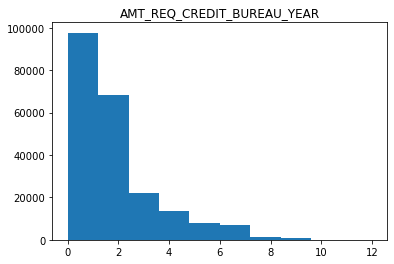

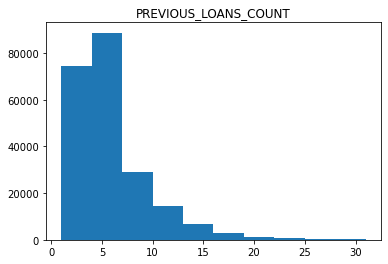

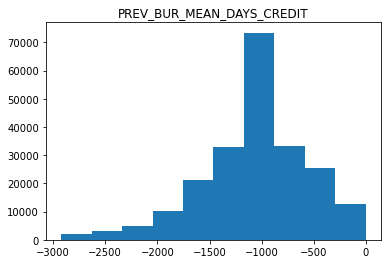

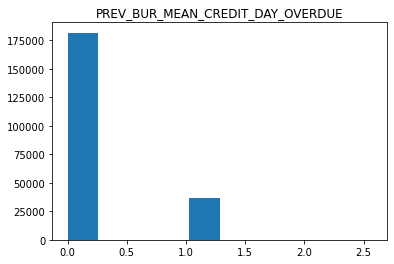

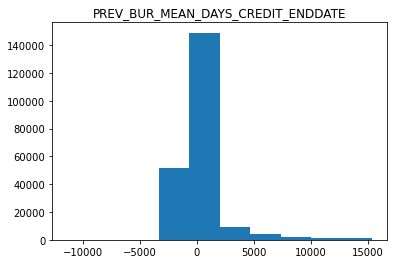

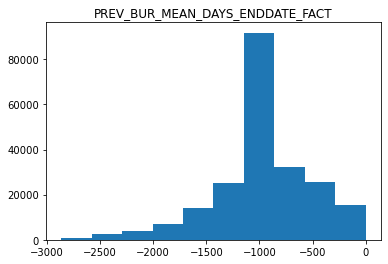

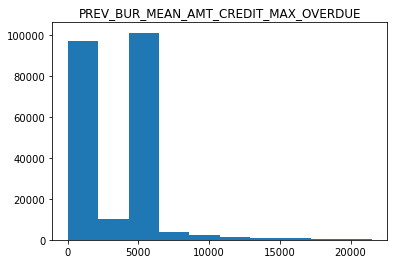

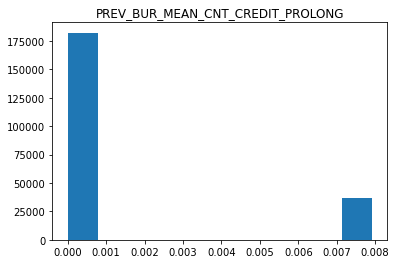

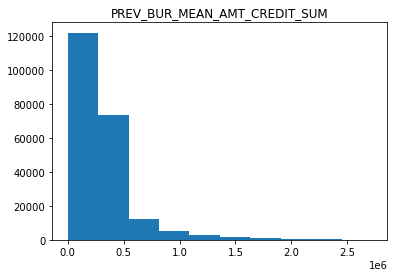

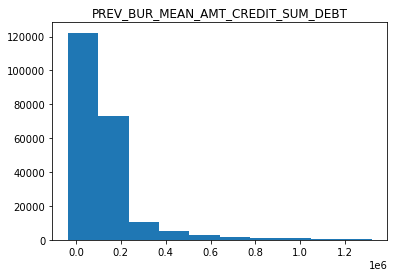

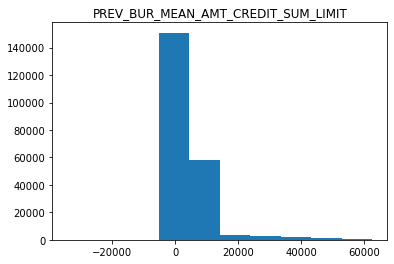

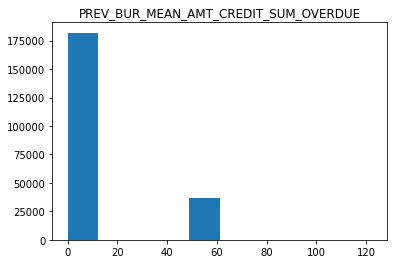

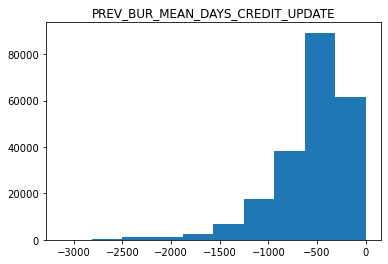

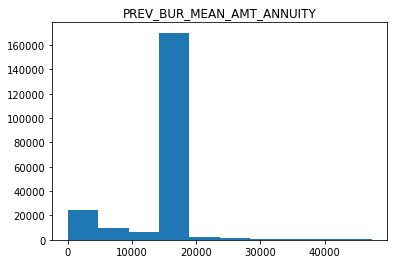

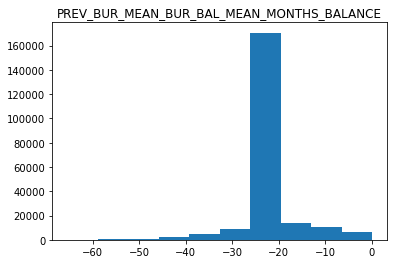

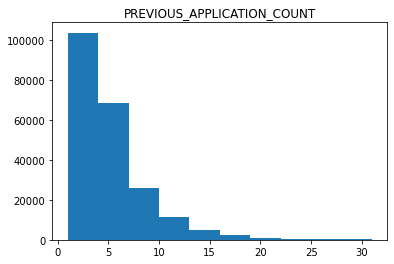

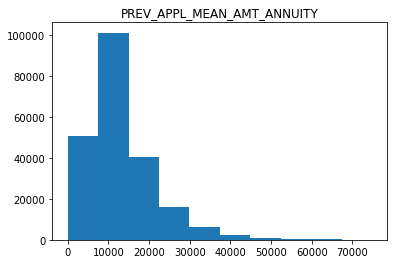

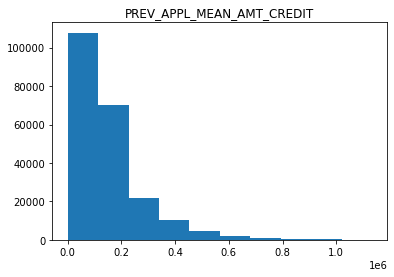

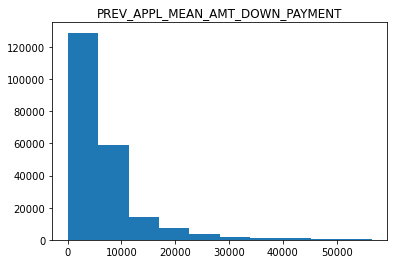

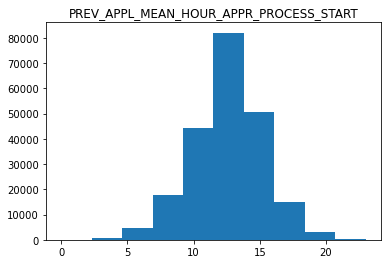

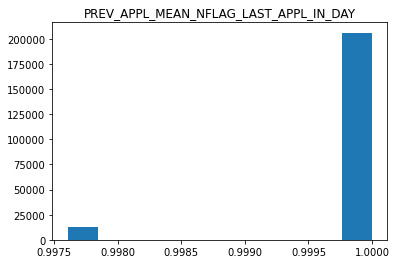

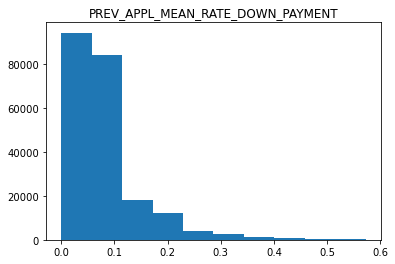

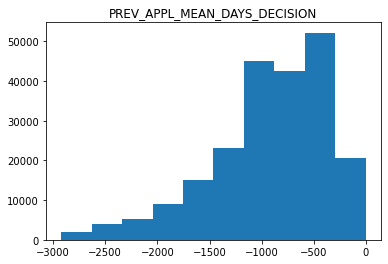

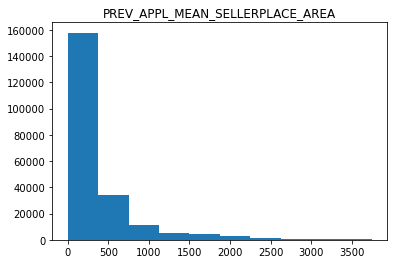

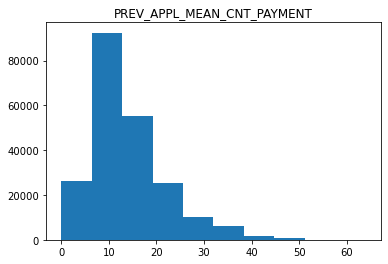

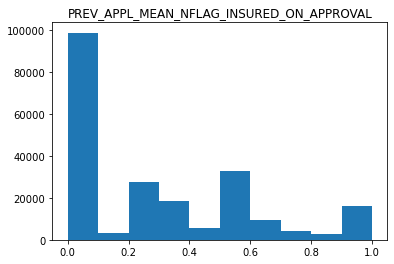

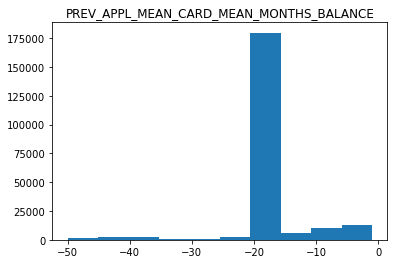

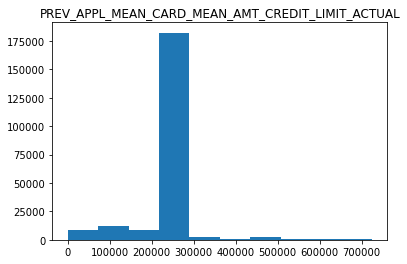

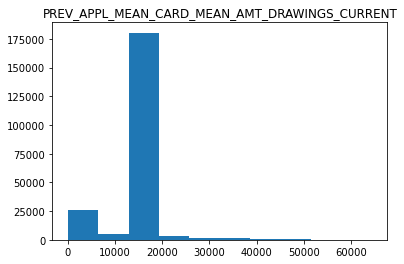

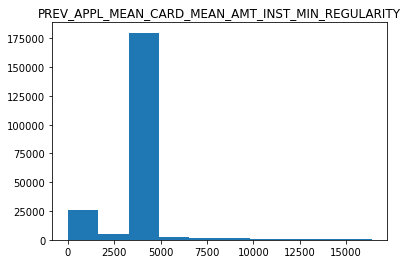

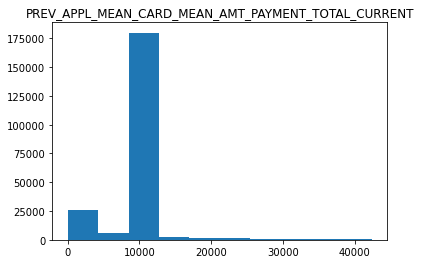

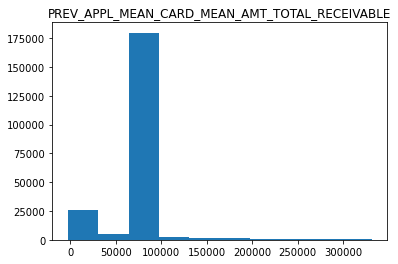

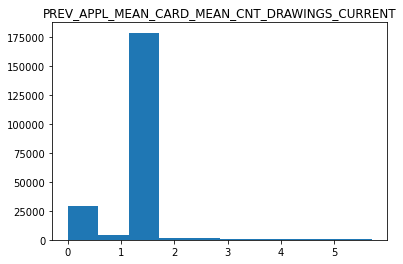

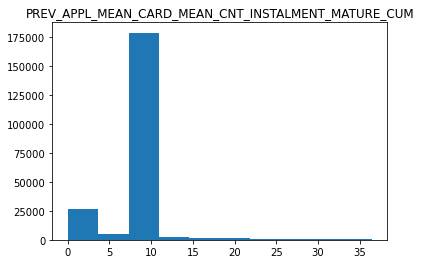

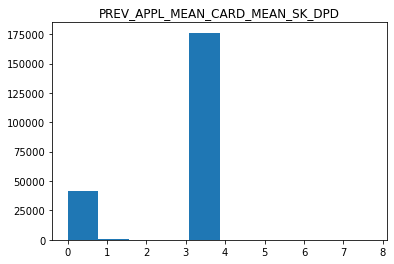

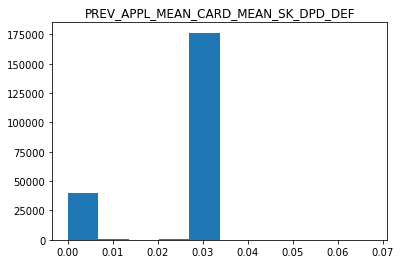

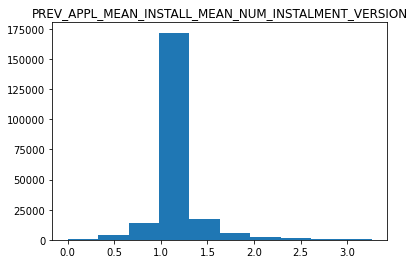

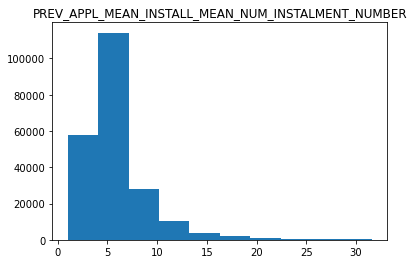

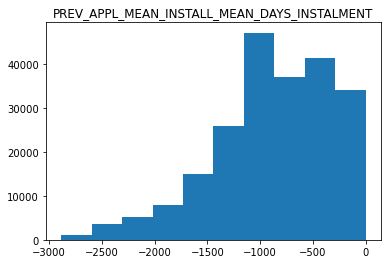

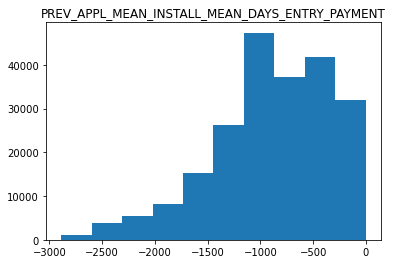

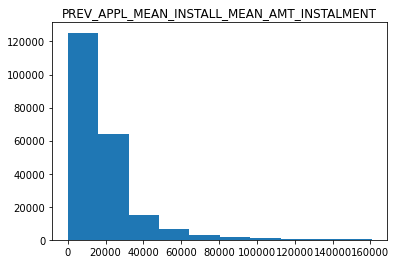

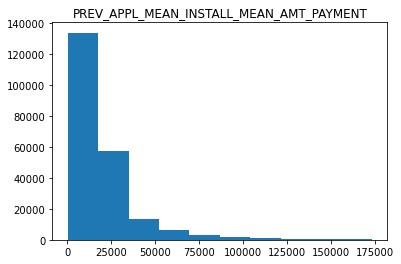

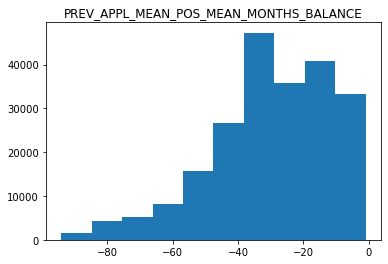

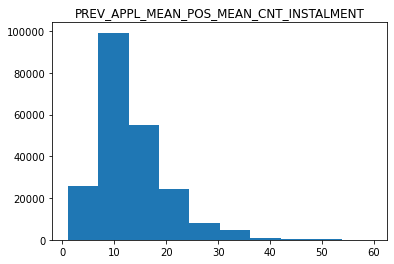

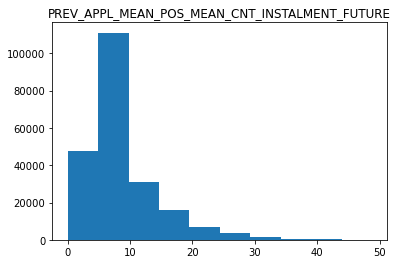

In [253]:
for i in range(112):
    plt.hist(train.iloc[:,i])
    plt.title("{}".format(train.columns[i]))
    plt.show()

In [254]:
#PREV_APPL_MEAN_DAYS_FIRST_DUE BỎ
#PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION  BỎ
#PREV_APPL_MEAN_DAYS_LAST_DUE BỎ
#DAYS_EMPLOYED BỎ

# Train dataset after preprocessing data 

In [255]:
train.head(25)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002     1.0         Cash loans           M            N   
2       100004     0.0    Revolving loans           M            Y   
4       100007     0.0         Cash loans           M            N   
5       100008     0.0         Cash loans           M            N   
6       100009     0.0         Cash loans           F            Y   
8       100011     0.0         Cash loans           F            N   
9       100012     0.0    Revolving loans           M            N   
10      100014     0.0         Cash loans           F            N   
11      100015     0.0         Cash loans           F            N   
12      100016     0.0         Cash loans           F            N   
13      100017     0.0         Cash loans           M            Y   
14      100018     0.0         Cash loans           F            N   
16      100020     0.0         Cash loans           M            N   
17      100021     0.0    Revolving loans           F            N   
18      100022     0.0    Revolving loans           F            N   
19      100023     0.0         Cash loans           F            N   
20      100024     0.0    Revolving loans           M            Y   
23      100027     0.0         Cash loans           F            N   
24      100029     0.0         Cash loans           M            Y   
25      100030     0.0         Cash loans           F            N   
26      100031     1.0         Cash loans           F            N   
27      100032     0.0         Cash loans           M            N   
29      100034     0.0    Revolving loans           M            N   
30      100035     0.0         Cash loans           F            N   
31      100036     0.0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
2                Y             0         67500.000    135000.0       6750.0   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   
20               Y             0        135000.000    427500.0      21375.0   
23               Y             0         83250.000    239850.0      23850.0   
24               N             2        135000.000    247500.0      12703.5   
25               Y             0         90000.000    225000.0      11074.5   
26               Y             0        112500.000    979992.0      27076.5   
27               Y             1        112500.000    327024.0      23827.5   
29               Y             0         90000.000    180000.0       9000.0   
30               Y             0        292500.000    665892.0      24592.5   
31               Y             0        112500.000    512064.0      25033.5   

    NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied               Working  Secondary

# Test dataset after preprocessing data 

In [256]:
test.head(25)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307511      100001         Cash loans           F            N   
307512      100005         Cash loans           M            N   
307513      100013         Cash loans           M            Y   
307514      100028         Cash loans           F            N   
307515      100038         Cash loans           M            Y   
307516      100042         Cash loans           F            Y   
307517      100057         Cash loans           M            Y   
307518      100065         Cash loans           M            N   
307519      100066         Cash loans           F            N   
307520      100067         Cash loans           F            Y   
307521      100074         Cash loans           F            N   
307522      100090         Cash loans           F            N   
307523      100091         Cash loans           F            N   
307524      100092         Cash loans           F            Y   
307525      100106    Revolving loans           M            N   
307526      100107         Cash loans           M            Y   
307527      100109         Cash loans           F            Y   
307528      100117         Cash loans           M            Y   
307529      100128         Cash loans           F            Y   
307530      100141         Cash loans           F            Y   
307531      100150         Cash loans           F            N   
307532      100168         Cash loans           F            N   
307533      100169         Cash loans           F            N   
307534      100170         Cash loans           M            N   
307535      100171         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307511               Y             0          135000.0    568800.0   
307512               Y             0           99000.0    222768.0   
307513               Y             0          202500.0    663264.0   
307514               Y             2          315000.0   1575000.0   
307515               N             1          180000.0    625500.0   
307516               Y             0          270000.0    959688.0   
307517               Y             2          180000.0    499221.0   
307518               Y             0          166500.0    180000.0   
307519               Y             0          315000.0    364896.0   
307520               Y             1          162000.0     45000.0   
307521               Y             0           67500.0    675000.0   
307522               Y             0          135000.0    261621.0   
307523               Y             0          247500.0    296280.0   
307524               Y             0           90000.0    360000.0   
307525               Y             0          180000.0    157500.0   
307526               Y             0          180000.0    296280.0   
307527               Y             0          202500.0    407520.0   
307528               Y             0           90000.0    499221.0   
307529               Y             1          225000.0    431280.0   
307530               Y             0          175500.0    478498.5   
307531               Y             0           99000.0    225000.0   
307532               Y             0          157500.0    266652.0   
307533               Y             0          135000.0    540000.0   
307534               Y             1          337500.0   1313212.5   
307535               Y             0          157500.0    539100.0   

        AMT_ANNUITY  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307511      20560.5    Unaccompanied               Working   
307512      17370.0    Unaccompanied               Working   
307513      69777.0          Unknown               Working   
307514      49018.5    Unaccompanied               Working   
307515      32067.0    Unaccompanied               Working   
307516      34600.5    Unaccompanied         State servant   
307517      22117.5    Unaccompanied

In [257]:
train_cols_bach = train.columns[:30]
train_cols_bach = list(train_cols_bach)
train_cols_bach

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION']

In [258]:
descrip = pd.read_csv("./home-credit-default-risk/HomeCredit_columns_description.csv", encoding="ISO-8859-1")
descrip[descrip["Row"].isin(train_cols_bach)].loc[:37, :]

Unnamed: 0                         Table                          Row  \
0            1  application_{train|test}.csv                   SK_ID_CURR   
1            2  application_{train|test}.csv                       TARGET   
2            5  application_{train|test}.csv           NAME_CONTRACT_TYPE   
3            6  application_{train|test}.csv                  CODE_GENDER   
4            7  application_{train|test}.csv                 FLAG_OWN_CAR   
5            8  application_{train|test}.csv              FLAG_OWN_REALTY   
6            9  application_{train|test}.csv                 CNT_CHILDREN   
7           10  application_{train|test}.csv             AMT_INCOME_TOTAL   
8           11  application_{train|test}.csv                   AMT_CREDIT   
9           12  application_{train|test}.csv                  AMT_ANNUITY   
11          14  application_{train|test}.csv              NAME_TYPE_SUITE   
12          15  application_{train|test}.csv             NAME_INCOME_TYPE   
13          16  application_{train|test}.csv          NAME_EDUCATION_TYPE   
14          17  application_{train|test}.csv           NAME_FAMILY_STATUS   
15          18  application_{train|test}.csv            NAME_HOUSING_TYPE   
16          19  application_{train|test}.csv   REGION_POPULATION_RELATIVE   
17          20  application_{train|test}.csv                   DAYS_BIRTH   
19          22  application_{train|test}.csv            DAYS_REGISTRATION   
20          23  application_{train|test}.csv              DAYS_ID_PUBLISH   
21          24  application_{train|test}.csv                  OWN_CAR_AGE   
24          27  application_{train|test}.csv              FLAG_WORK_PHONE   
26          29  application_{train|test}.csv                   FLAG_PHONE   
27          30  application_{train|test}.csv                   FLAG_EMAIL   
28          31  application_{train|test}.csv              OCCUPATION_TYPE   
29          32  application_{train|test}.csv              CNT_FAM_MEMBERS   
31          34  application_{train|test}.csv  REGION_RATING_CLIENT_W_CITY   
32          35  application_{train|test}.csv   WEEKDAY_APPR_PROCESS_START   
33          36  application_{train|test}.csv      HOUR_APPR_PROCESS_START   
35          38  application_{train|test}.csv   REG_REGION_NOT_WORK_REGION   
36          39  application_{train|test}.csv  LIVE_REGION_NOT_WORK_REGION   

                                                                                                                                                                                    Description  \
0                                                                                                                                                                      ID of loan in our sample   
1   Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                   Identification if loan is cash or revolving   
3                                                                                                                                                                          Gender of the client   
4                                                                                                                                                                 Flag if the client owns a car   
5                                                                                                                                                           Flag if client owns a house or flat   
6                                                                                                                                                             Number of children the client has   
7                                                       

## Feature creation

In [259]:
train_domain = train.copy()

In [260]:
# INCOME_CREDIT_PERCENT: the percentage of the income relative to a client's credit amount
train_domain['INCOME_CREDIT_PERCENT'] = train_domain['AMT_INCOME_TOTAL']  / train_domain['AMT_CREDIT']

# ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL'] 

# CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT'] 


# INCOME_PER_PERSON: Income per person in a family
train_domain['INCOME_PER_PERSON'] = train_domain['AMT_INCOME_TOTAL'] / train_domain['CNT_FAM_MEMBERS']

# CNT_ADULT_FAM_MEMBER: number of adult members in a family
train_domain['CNT_ADULT_FAM_MEMBER'] = train_domain['CNT_FAM_MEMBERS'] - train_domain['CNT_CHILDREN']

# RATIO_CHILDREN_TO_ADULTS: ratio of the children - adult
train_domain['RATIO_CHILDREN_TO_ADULTS'] = train_domain['CNT_CHILDREN'] / train_domain['CNT_ADULT_FAM_MEMBER']

# RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS: the credit loan per person in a family
train_domain['RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS'] = train_domain['AMT_CREDIT'] / train_domain['CNT_FAM_MEMBERS']

# RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER: the credit loan per adult people in a family
train_domain['RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER'] = train_domain['AMT_CREDIT'] / train_domain['CNT_ADULT_FAM_MEMBER']

# AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER: the income per adult people in a family
train_domain['AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER'] = train_domain['AMT_INCOME_TOTAL'] / train_domain['CNT_ADULT_FAM_MEMBER']

In [261]:
domain_features = ['INCOME_CREDIT_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
       'INCOME_PER_PERSON', 'CNT_ADULT_FAM_MEMBER', 'RATIO_CHILDREN_TO_ADULTS',
       'RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS',
       'RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER',
       'AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER']

In [262]:
def distribution_domain(x):
    plot = sns.distplot(train_domain[x])
    plt.title(x)
    plt.show()

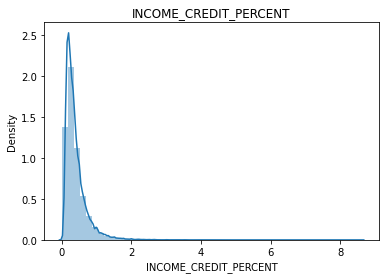

In [263]:
distribution_domain('INCOME_CREDIT_PERCENT')

Most of people have **enough income to pay for their credit.** Some people even have 8 times more than the amount of the loan

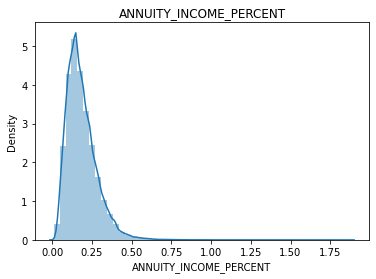

In [264]:
distribution_domain('ANNUITY_INCOME_PERCENT')

The most frequent percentage of annuity per income is below 25%. **That is, most of client have to spend at about 1/4 of their income to pay for the debt.**

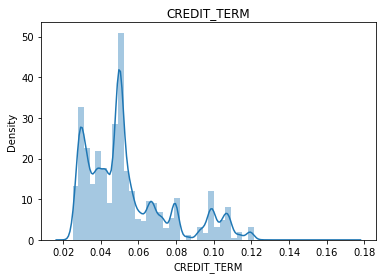

In [265]:
distribution_domain("CREDIT_TERM")

The credit term is from 0.02 - 0.12, **mostly fall at 0.05.**

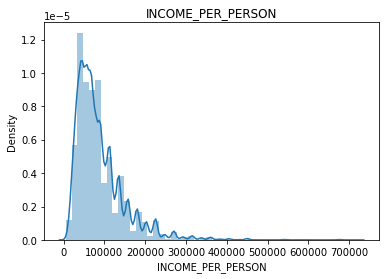

In [266]:
distribution_domain("INCOME_PER_PERSON")

Income of the person is the income of the client divide for the members of his/her family. **The most frequent income per person is below 100000.**

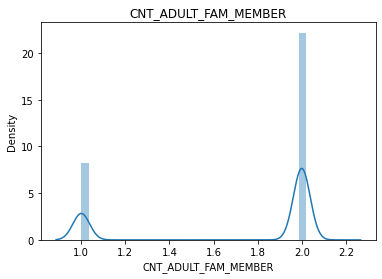

In [267]:
distribution_domain("CNT_ADULT_FAM_MEMBER")

The adult members in the family is the ones who can make money to pay for the loan. Most of the family have 1 - 2 adults.

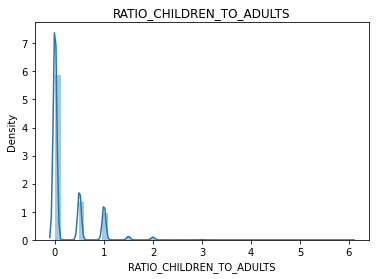

In [268]:
distribution_domain("RATIO_CHILDREN_TO_ADULTS")

Children are the dependents of the adults. **The higher this ratio is, the higher burden the adults have.**

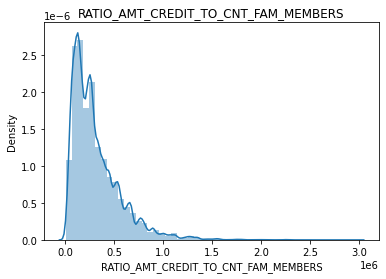

In [269]:
distribution_domain('RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS')

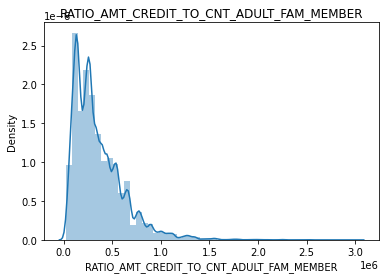

In [270]:
distribution_domain('RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER')

The credit amount per person in the family **mostly fall on 250000.**

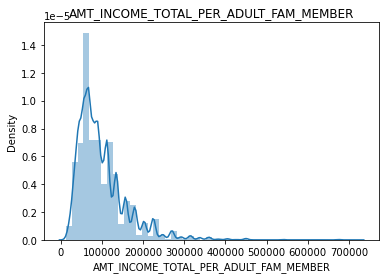

In [271]:
distribution_domain('AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER')

## DATA ANALYSIS

In [272]:
def pie_chart(x):
    temp = train[x].value_counts(normalize= True)
    df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
    plt.pie(temp,labels=df['labels'], autopct='%.f%%', startangle=90)
    #plt.legend()
    plt.title("{}".format(x))
    plt.show()

In [273]:
def pie_chart_n(x):
    temp = train[x].value_counts(normalize= True)
    df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
    fig = px.pie(df, values=temp.values, names=temp.index, title=x)
    fig.show()

In [274]:
def pie_chart_circle(x):
    temp = train[x].value_counts(normalize= True)
    df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})
    
    fig1, ax1 = plt.subplots()
    ax1.pie(temp, labels=df['labels'], autopct='%1.1f%%', startangle=90)

    #draw circle
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.title("{}".format(x))
    #plt.legend()
    plt.tight_layout()
    plt.show()

In [275]:
def bar_chart(x):
    sns.set(style="whitegrid")
    ax = sns.countplot(x=x, data=train)
    plt.xticks(rotation=90)
    plt.show()

In [276]:
def bar_chart_pct(x):
    sns.set(style="whitegrid")
    ax = sns.histplot(train, x=x, stat="percent", multiple="dodge", shrink=.8)
    plt.xticks(rotation=90)
    plt.show()

In [277]:
def distribution(x):
    plot = sns.distplot(train[x])
    plt.title(x)
    plt.show()

#### Loan repayment

In [278]:
pie_chart_n("TARGET")

As we can see data is **highly imbalanced.** Most of the client is able to repay for the debt.

#### Gender of the client

In [279]:
pie_chart_n("CODE_GENDER")

About **more than 66.8%** of the client is woman.

#### Age of the client

In [280]:
train["AGE"] = np.abs(train["DAYS_BIRTH"] / 365)
train["AGE"]

0         25.920548
2         52.180822
4         54.608219
5         46.413699
6         37.747945
            ...    
307501    35.509589
307502    44.008219
307505    66.805479
307507    56.917808
307509    32.769863
Name: AGE, Length: 218646, dtype: float64

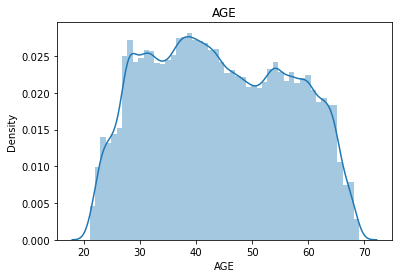

In [281]:
distribution("AGE")

The age of the client from 20 to 70. **People at the age of 35 - 45** is mostly the client for the debt.

#### Types of loan
- Rovolving loans : Arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires. Credit card loans and overdrafts are revolving loans. Also called evergreen loan
- Cash loans: A cash loan is a loan which is received by the borrower in cash. This sets it apart from overdraft loans, installment loans and leases. Cash loans may be given to a private individual as a personal loan or to a business as a business loan.

In [282]:
pie_chart_n("NAME_CONTRACT_TYPE")

Most of the loans are Cash loans which were taken by applicants. **90% loans are Cash loans.**

#### See if the client have the collateral

In [283]:
pie_chart_n("FLAG_OWN_CAR")

Only 32% of client have (at least) a car, which can be a collateral!

In [284]:
pie_chart_n("FLAG_OWN_REALTY")

Fortunately, nearly **70% of clients have a collateral like a house or an apartment**

#### In the assessment of loan, we may consider the dependents of the client, that is their children and other family members

In [285]:
pie_chart_n("CNT_CHILDREN")

There are up to **70% of the client have no kids**, 20% of them have only one child.

In [286]:
pie_chart_n("CNT_FAM_MEMBERS")

More than a half of client is in **two-member-family**

#### Basic information regarding to job, income source, occupation

In [287]:
pie_chart_n("NAME_INCOME_TYPE")

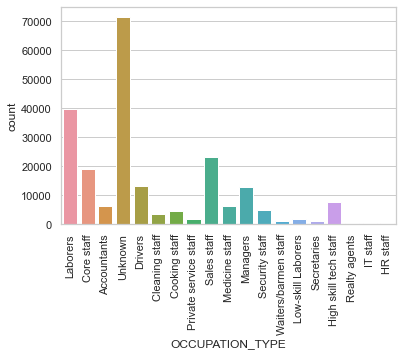

In [288]:
bar_chart("OCCUPATION_TYPE")

Most of the client is the labourers, sales staff or core staff, which are working at the time of application. But many of the client is "Unknown".



#### Background information of the client

In [289]:
pie_chart_n("NAME_EDUCATION_TYPE")

Nearly **75% of the client have the education level: Secondary/secondary special.**

In [290]:
pie_chart_n("NAME_HOUSING_TYPE")

The most of client have a house or an apartment.

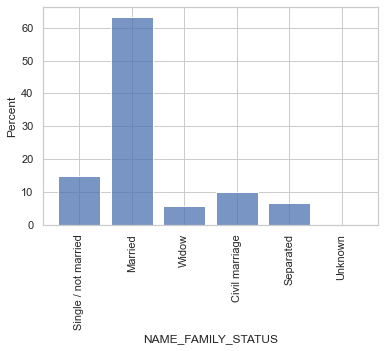

In [291]:
bar_chart_pct("NAME_FAMILY_STATUS")

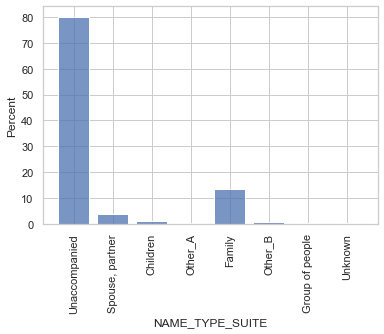

In [292]:
bar_chart_pct("NAME_TYPE_SUITE")

Most of client are in a marriage, but when apply for the loan, they are unaccompanied.

#### Amount of income, credit and annuity

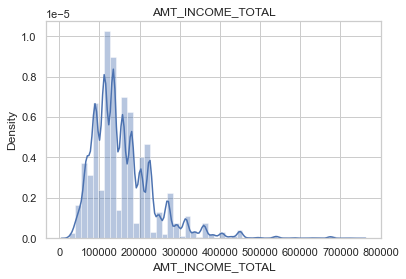

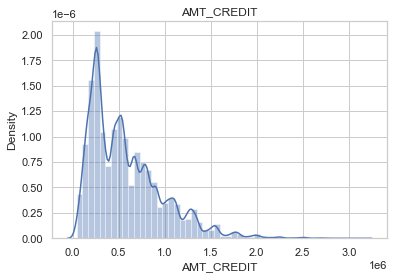

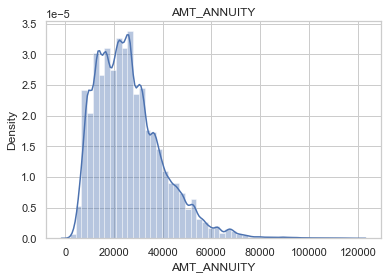

In [293]:
for each in ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]:
    distribution(each)

The amount of credit, annuity and income are nearly on the same level.


#### Region rating where the client lives

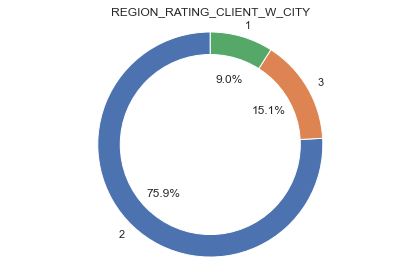

In [294]:
pie_chart_circle("REGION_RATING_CLIENT_W_CITY")

Most of the client are from the 2nd rating region.

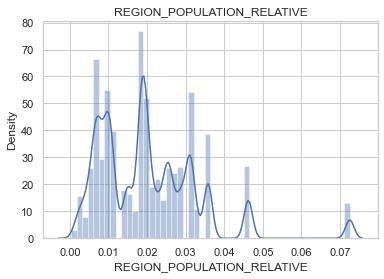

In [306]:
distribution("REGION_POPULATION_RELATIVE")

Most of the client live in the area **which are not densly populated.**

#### On what day, what time the client start the process

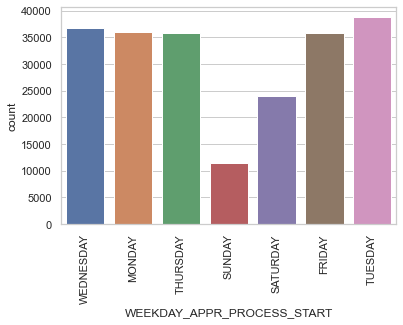

In [296]:
bar_chart("WEEKDAY_APPR_PROCESS_START")

On weekend, people are less likely to start the process.

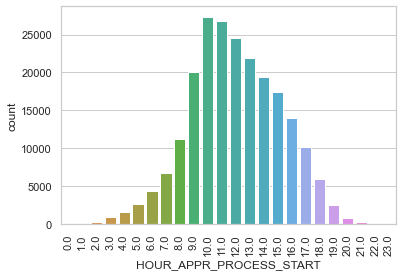

In [297]:
bar_chart("HOUR_APPR_PROCESS_START")

Clients start the process mostly at 10 AM, then, the later the less processing start.

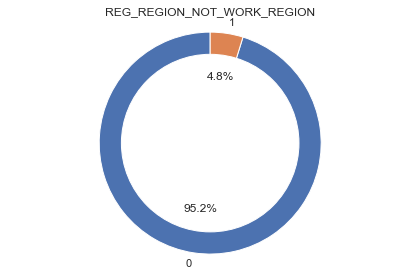

In [298]:
pie_chart_circle("REG_REGION_NOT_WORK_REGION")

Flag if client's permanent address does not match work address (1=different, 0=same, at region level). Most of the client have the same work address as the permanent address.

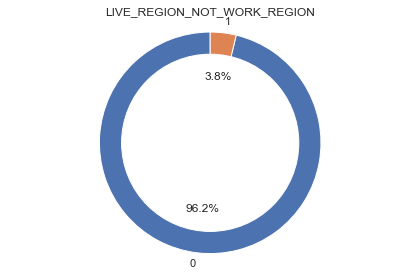

In [299]:
pie_chart_circle("LIVE_REGION_NOT_WORK_REGION")

Most of the client have the same work address as the living address.

## Find important features that affect the TARGET

In [300]:
numeric_columns = train.select_dtypes(exclude="object").drop(["TARGET", "SK_ID_CURR"], axis = 1).columns[:17]
numeric_columns = list(numeric_columns)
numeric_columns.append('AGE')
numeric_columns

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'AGE']

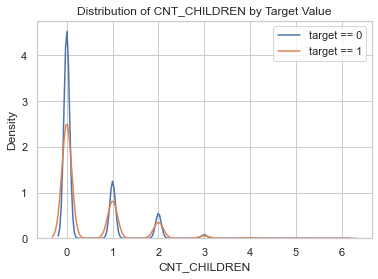

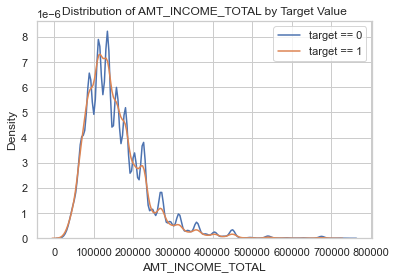

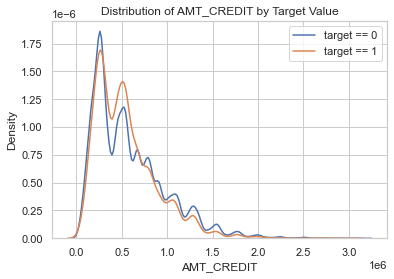

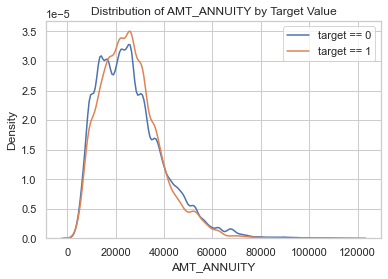

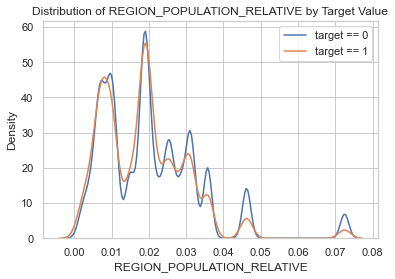

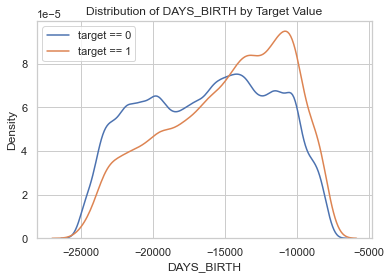

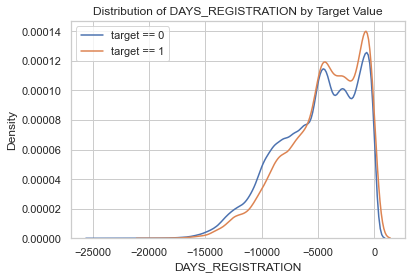

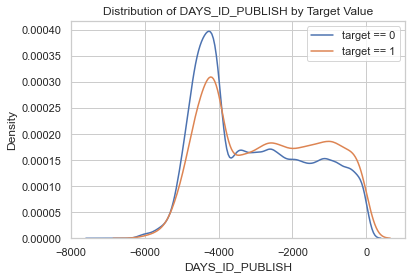

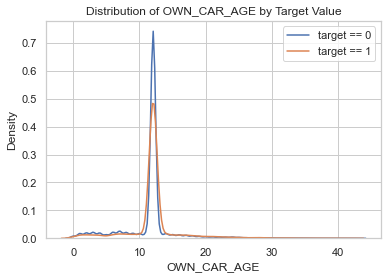

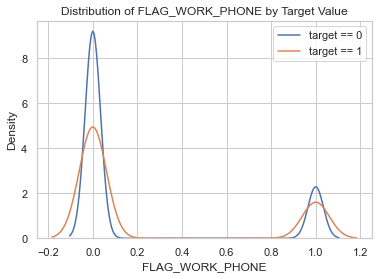

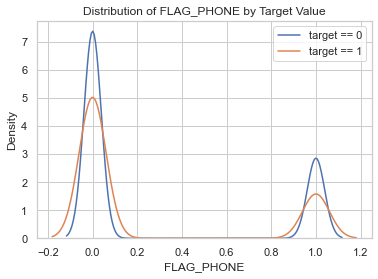

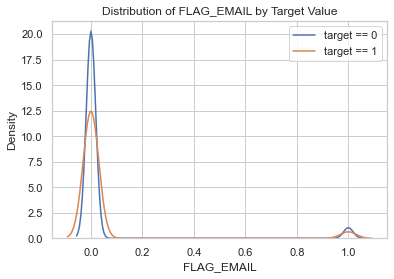

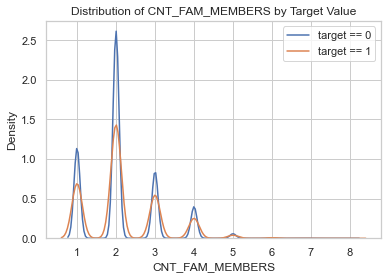

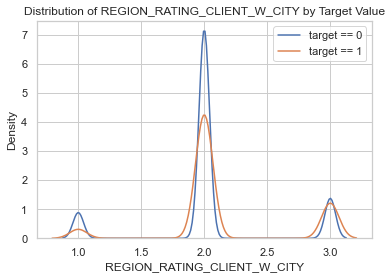

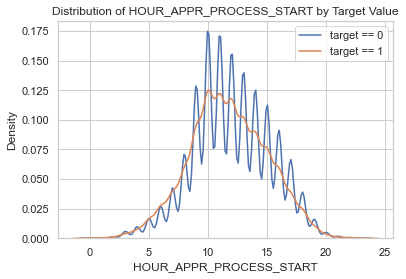

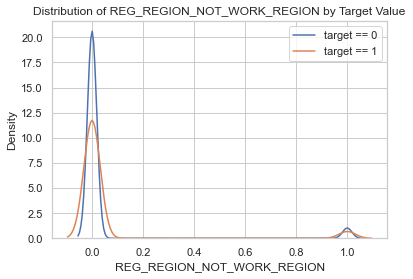

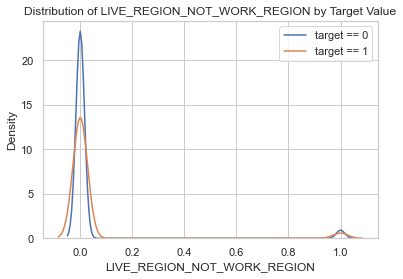

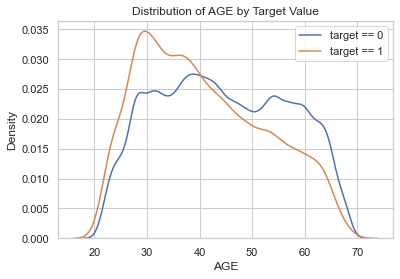

<Figure size 432x288 with 0 Axes>

In [301]:

# iterate through the sources
for i, source in enumerate(numeric_columns):

    
    # plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    plt.show()
    
plt.tight_layout(h_pad = 2.5)

    

Almost all of the features have no effect on the target. Only "AGE" (or "DAYS_BIRTH") have a little effect on the TARGET. 

**When at the age of 30 - 40,  most people have difficulty in paying the debt. Then, the older the better client could pay for the debt.**

In [302]:
cat_columns = train.select_dtypes("object").columns[:10]
cat_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')

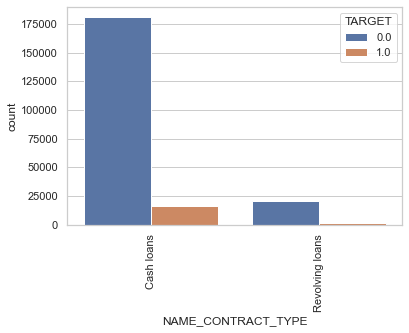

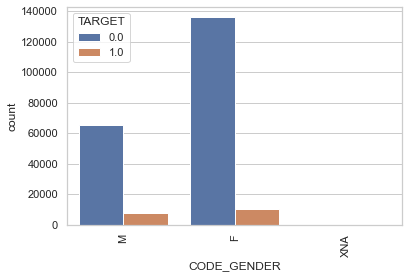

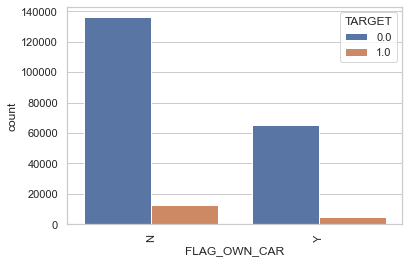

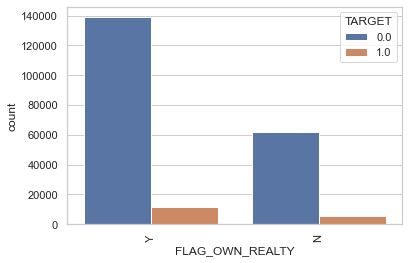

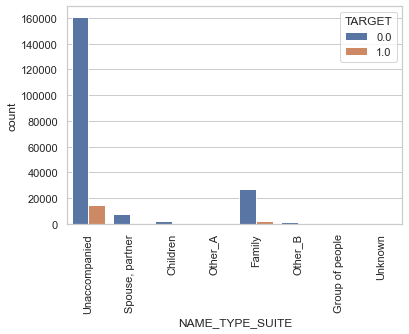

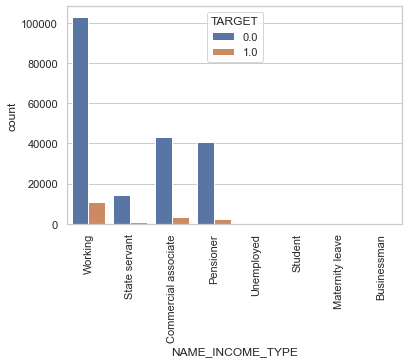

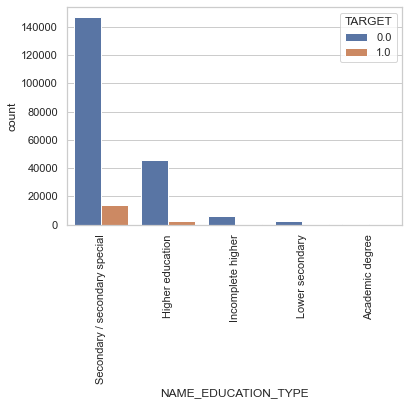

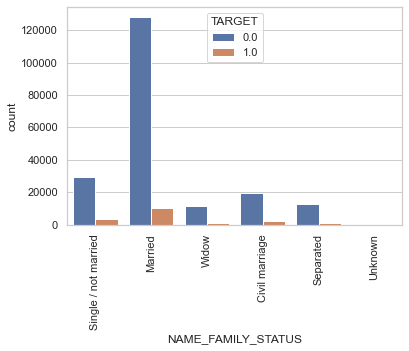

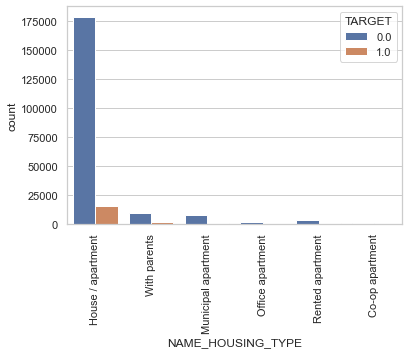

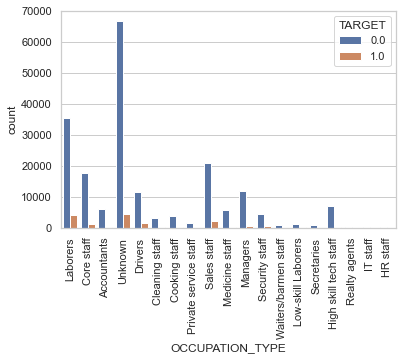

In [303]:
for feature in cat_columns:
    sns.set(style="whitegrid")
    ax = sns.countplot(x=feature, hue="TARGET", data=train)
    plt.xticks(rotation=90)
    plt.show()

With the categorical features, we can jump to conclusion one point: Either with any kind of any feature, **people mostly are able to pay for the debt.**


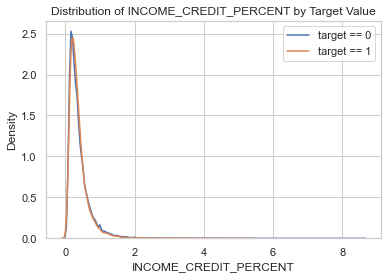

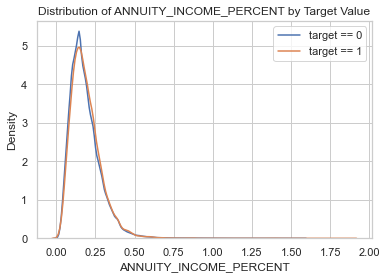

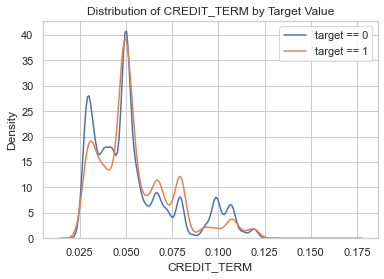

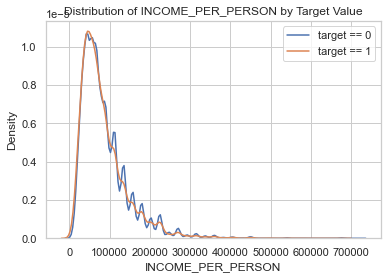

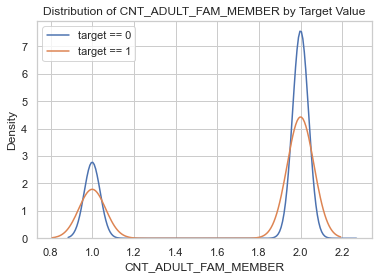

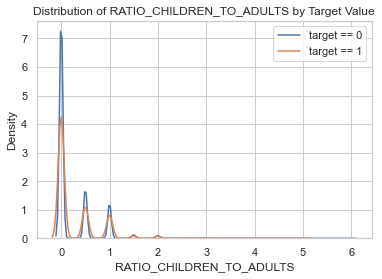

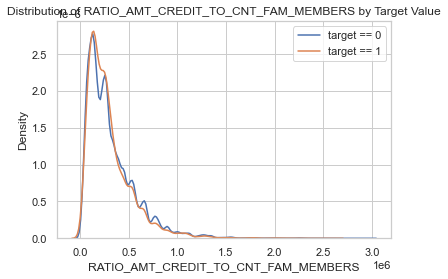

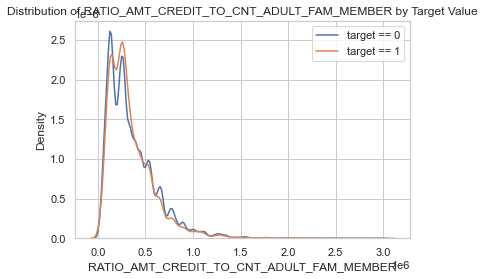

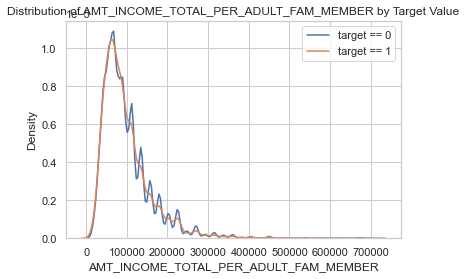

<Figure size 432x288 with 0 Axes>

In [304]:
# iterate through the sources
for i, source in enumerate(domain_features):
    
    # plot repaid loans
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    plt.show()
plt.tight_layout(h_pad = 4.0)   

Actually, there are no effect of any features on the TARGER variables.